**Data Architecture project** \
    Giovanni Bishara
    Probjot Singh
    

# Preliminary Analysis & Combo Experiments

## Import aggregated csv

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
# Import the aggregated metrics
df = pd.read_csv('../experiments_pipeline/aggregated_metrics.csv')

df.head()

experiment_name     model_name  accuracy  accuracy_interval_lower  \
0   experiment #1            SVM  0.740321                 0.743926   
1   experiment #1  Decision Tree  0.787535                 0.788408   
2   experiment #2            SVM  0.979226                 0.975209   
3   experiment #2  Decision Tree  0.978281                 0.974336   
4   experiment #3            SVM  0.740321                 0.743926   

   accuracy_interval_upper  precision  precision_interval_lower  \
0                 0.745027   0.740321                  0.371963   
1                 0.808945   0.865359                  0.723522   
2                 0.984755   0.978643                  0.971815   
3                 0.982607   0.984713                  0.964085   
4                 0.745027   0.740321                  0.371963   

   precision_interval_upper    recall  recall_interval_lower  \
0                  0.372513  1.000000                    NaN   
1                  0.749238  0.844388               0.726241   
2                  0.985081  0.993622               0.961223   
3                  0.976725  0.985969               0.967372   
4                  0.372513  1.000000                    NaN   

   recall_interval_upper  f1_score  f1_score_interval_lower  \
0                    NaN  0.850787                 0.426581   
1               0.749991  0.854745                 0.724852   
2               0.976450  0.986076                 0.967081   
3               0.979471  0.985341                 0.966386   
4                    NaN  0.850787                 0.426581   

   f1_score_interval_upper  
0                 0.426943  
1                 0.748685  
2                 0.979755  
3                 0.977234  
4                 0.426943

In [3]:
# Add a new column experiment_id in the first position and drop experiment_name
df.insert(loc=0, column='experiment_id', value=df['experiment_name'].str.extract(r'#(\d+)').astype(int))
df.drop(columns=['experiment_name'], inplace=True)

# Make sure each metric is between 0 and 1 (for the 95% confidence intervals)
for col in df.columns[2:]:
    df[col] = df[col].clip(0, 1)

df.head()

experiment_id     model_name  accuracy  accuracy_interval_lower  \
0              1            SVM  0.740321                 0.743926   
1              1  Decision Tree  0.787535                 0.788408   
2              2            SVM  0.979226                 0.975209   
3              2  Decision Tree  0.978281                 0.974336   
4              3            SVM  0.740321                 0.743926   

   accuracy_interval_upper  precision  precision_interval_lower  \
0                 0.745027   0.740321                  0.371963   
1                 0.808945   0.865359                  0.723522   
2                 0.984755   0.978643                  0.971815   
3                 0.982607   0.984713                  0.964085   
4                 0.745027   0.740321                  0.371963   

   precision_interval_upper    recall  recall_interval_lower  \
0                  0.372513  1.000000                    NaN   
1                  0.749238  0.844388               0.726241   
2                  0.985081  0.993622               0.961223   
3                  0.976725  0.985969               0.967372   
4                  0.372513  1.000000                    NaN   

   recall_interval_upper  f1_score  f1_score_interval_lower  \
0                    NaN  0.850787                 0.426581   
1               0.749991  0.854745                 0.724852   
2               0.976450  0.986076                 0.967081   
3               0.979471  0.985341                 0.966386   
4                    NaN  0.850787                 0.426581   

   f1_score_interval_upper  
0                 0.426943  
1                 0.748685  
2                 0.979755  
3                 0.977234  
4                 0.426943

## Import ML pipeline csv and concat

In [8]:
# Import the ML pipeline metrics
df_ml = pd.read_csv('../ml_pipeline/performance/metrics.csv')
# Add the experiment_id as 0 ("fake experiment" used in df)
df_ml.insert(0, 'experiment_id', 0)

df_ml.head()

experiment_id     model_name  accuracy  accuracy_interval_lower  \
0              0            SVM  0.985836                 0.983597   
1              0  Decision Tree  0.978281                 0.975099   

   accuracy_interval_upper  precision  precision_interval_lower  \
0                 0.986564   0.988564                  0.977246   
1                 0.982601   0.981037                  0.967651   

   precision_interval_upper    recall  recall_interval_lower  \
0                  0.983993  0.992347               0.977659   
1                  0.975621  0.989796               0.965958   

   recall_interval_upper  f1_score  f1_score_interval_lower  \
0               0.982869  0.990452                 0.978455   
1               0.979891  0.985397                 0.967159   

   f1_score_interval_upper  
0                 0.982324  
1                 0.977260

In [9]:
# Keep the original DataFrame in another variable
df_original = df.copy()

# Concatenate the two DataFrames, to have one containing both metrics from experiment 0 and "real" experiments
df = pd.concat([df_ml, df], ignore_index=True)

df.head()

experiment_id     model_name  accuracy  accuracy_interval_lower  \
0              0            SVM  0.985836                 0.983597   
1              0  Decision Tree  0.978281                 0.975099   
2              1            SVM  0.740321                 0.743926   
3              1  Decision Tree  0.787535                 0.788408   
4              2            SVM  0.979226                 0.975209   

   accuracy_interval_upper  precision  precision_interval_lower  \
0                 0.986564   0.988564                  0.977246   
1                 0.982601   0.981037                  0.967651   
2                 0.745027   0.740321                  0.371963   
3                 0.808945   0.865359                  0.723522   
4                 0.984755   0.978643                  0.971815   

   precision_interval_upper    recall  recall_interval_lower  \
0                  0.983993  0.992347               0.977659   
1                  0.975621  0.989796               0.965958   
2                  0.372513  1.000000                    NaN   
3                  0.749238  0.844388               0.726241   
4                  0.985081  0.993622               0.961223   

   recall_interval_upper  f1_score  f1_score_interval_lower  \
0               0.982869  0.990452                 0.978455   
1               0.979891  0.985397                 0.967159   
2                    NaN  0.850787                 0.426581   
3               0.749991  0.854745                 0.724852   
4               0.976450  0.986076                 0.967081   

   f1_score_interval_upper  
0                 0.982324  
1                 0.977260  
2                 0.426943  
3                 0.748685  
4                 0.979755

## Sub-DataFrames by model name

In [10]:
# Create different DataFrames, one for each model

model_names = df_original['model_name'].unique()

sub_df_dict = {
    model_name: df_original[df_original['model_name'] == model_name]
    for model_name in model_names
}

In [11]:
# Create a DataFrame with the three types of SVM instance
all_svm_df = pd.concat([sub_df_dict['SVM'], sub_df_dict['SVM (mean)'], sub_df_dict['SVM (EM)']], ignore_index=True)

# Sort it by experiment ID and model name
all_svm_df = all_svm_df.sort_values(by=['experiment_id', 'model_name'])

In [12]:
# DataFrame for Decision Tree
all_dtc_df = sub_df_dict['Decision Tree']

## Describe

In [13]:
df_original.describe()

experiment_id     accuracy  accuracy_interval_lower  \
count    1430.000000  1430.000000              1430.000000   
mean      310.483217     0.853985                 0.865481   
std       197.228614     0.220300                 0.149467   
min         1.000000     0.016997                 0.088087   
25%       125.250000     0.740321                 0.743926   
50%       304.000000     0.975449                 0.966151   
75%       482.750000     0.980170                 0.977038   
max       659.000000     0.985836                 0.994074   

       accuracy_interval_upper    precision  precision_interval_lower  \
count              1430.000000  1430.000000               1430.000000   
mean                  0.876800     0.870141                  0.799212   
std                   0.146666     0.226924                  0.234950   
min                   0.105386     0.000000                  0.086288   
25%                   0.754237     0.769535                  0.656621   
50%                   0.976133     0.978643                  0.955846   
75%                   0.985640     0.983565                  0.972764   
max                   0.997992     1.000000                  0.992302   

       precision_interval_upper       recall  recall_interval_lower  \
count               1430.000000  1430.000000            1223.000000   
mean                   0.815236     0.896411               0.860010   
std                    0.235368     0.255186               0.166904   
min                    0.103404     0.000000               0.089667   
25%                    0.685065     0.980867               0.784468   
50%                    0.971432     0.991071               0.961082   
75%                    0.985363     0.994898               0.967822   
max                    0.998299     1.000000               0.991699   

       recall_interval_upper     f1_score  f1_score_interval_lower  \
count            1223.000000  1430.000000              1430.000000   
mean                0.878000     0.875787                 0.797210   
std                 0.161452     0.239406                 0.221722   
min                 0.107212     0.000000                 0.087454   
25%                 0.811418     0.850787                 0.600971   
50%                 0.976298     0.983397                 0.955446   
75%                 0.980132     0.986616                 0.969510   
max                 0.997135     0.990440                 0.992203   

       f1_score_interval_upper  
count              1430.000000  
mean                  0.812065  
std                   0.221693  
min                   0.104587  
25%                   0.630814  
50%                   0.968452  
75%                   0.980896  
max                   0.997355

In [14]:
# SVM DataFrame
sub_df_dict['SVM'].describe()

experiment_id    accuracy  accuracy_interval_lower  \
count     547.000000  547.000000               547.000000   
mean      381.021938    0.799511                 0.833819   
std       160.083047    0.241978                 0.132511   
min         1.000000    0.016997                 0.501505   
25%       245.500000    0.740321                 0.743926   
50%       382.000000    0.810198                 0.799174   
75%       518.500000    0.979226                 0.975655   
max       658.000000    0.983003                 0.982697   

       accuracy_interval_upper   precision  precision_interval_lower  \
count               547.000000  547.000000                547.000000   
mean                  0.841496    0.784334                  0.692303   
std                   0.133955    0.282365                  0.279695   
min                   0.509234    0.000000                  0.212752   
25%                   0.745027    0.740321                  0.371963   
50%                   0.811088    0.858506                  0.777206   
75%                   0.985109    0.979221                  0.972340   
max                   0.987721    0.996769                  0.980613   

       precision_interval_upper      recall  recall_interval_lower  \
count                547.000000  547.000000             342.000000   
mean                   0.704457    0.892647               0.862482   
std                    0.283610    0.300819               0.152529   
min                    0.254617    0.000000               0.490113   
25%                    0.372513    0.993622               0.737199   
50%                    0.804001    0.993622               0.961052   
75%                    0.985215    1.000000               0.963280   
max                    0.987216    1.000000               0.979591   

       recall_interval_upper    f1_score  f1_score_interval_lower  \
count             342.000000  547.000000               547.000000   
mean                0.879881    0.830496                 0.696829   
std                 0.149625    0.285025                 0.251429   
min                 0.499903    0.000000                 0.337015   
25%                 0.761408    0.850787                 0.426581   
50%                 0.976541    0.886376                 0.687591   
75%                 0.977997    0.986076                 0.967544   
max                 0.986017    0.988564                 0.980238   

       f1_score_interval_upper  
count               547.000000  
mean                  0.707601  
std                   0.255823  
min                   0.337412  
25%                   0.426943  
50%                   0.716292  
75%                   0.980118  
max                   0.985835

In [15]:
# SVM (mean) DataFrame
sub_df_dict['SVM (mean)'].describe()

experiment_id    accuracy  accuracy_interval_lower  \
count     112.000000  112.000000               112.000000   
mean       80.812500    0.946749                 0.927342   
std       115.413517    0.091712                 0.081282   
min         6.000000    0.259679                 0.475551   
25%        33.750000    0.962937                 0.895289   
50%        61.500000    0.980170                 0.974796   
75%        89.250000    0.982059                 0.978368   
max       659.000000    0.983947                 0.980756   

       accuracy_interval_upper   precision  precision_interval_lower  \
count               112.000000  112.000000                112.000000   
mean                  0.937511    0.941514                  0.936465   
std                   0.079014    0.111381                  0.092699   
min                   0.504833    0.000000                  0.327454   
25%                   0.907107    0.953687                  0.923067   
50%                   0.983794    0.978670                  0.972592   
75%                   0.985953    0.983565                  0.974440   
max                   0.987090    0.984810                  0.976885   

       precision_interval_upper      recall  recall_interval_lower  \
count                112.000000  112.000000             111.000000   
mean                   0.951311    0.986220               0.875581   
std                    0.084006    0.094075               0.129681   
min                    0.327873    0.000000               0.475388   
25%                    0.940725    0.992347               0.801909   
50%                    0.984647    0.994898               0.961346   
75%                    0.985741    0.997449               0.966926   
max                    0.987522    1.000000               0.970502   

       recall_interval_upper    f1_score  f1_score_interval_lower  \
count             111.000000  112.000000               112.000000   
mean                0.893497    0.962008                 0.884488   
std                 0.124632    0.098833                 0.137161   
min                 0.504509    0.000000                 0.395510   
25%                 0.826072    0.975526                 0.839043   
50%                 0.975954    0.986675                 0.966292   
75%                 0.979268    0.987937                 0.971404   
max                 0.981284    0.989220                 0.974541   

       f1_score_interval_upper  
count               112.000000  
mean                  0.901622  
std                   0.129364  
min                   0.396042  
25%                   0.862433  
50%                   0.978458  
75%                   0.981416  
max                   0.982923

In [16]:
# SVM (EM) DataFrame
sub_df_dict['SVM (EM)'].describe()

experiment_id    accuracy  accuracy_interval_lower  \
count     112.000000  112.000000               112.000000   
mean       80.812500    0.969319                 0.972579   
std       115.413517    0.075049                 0.060153   
min         6.000000    0.259679                 0.484978   
25%        33.750000    0.979226                 0.979792   
50%        61.500000    0.982059                 0.981173   
75%        89.250000    0.983003                 0.984653   
max       659.000000    0.985836                 0.994074   

       accuracy_interval_upper   precision  precision_interval_lower  \
count               112.000000  112.000000                112.000000   
mean                  0.980198    0.970043                  0.966192   
std                   0.058741    0.098128                  0.079985   
min                   0.502484    0.000000                  0.327454   
25%                   0.987366    0.979899                  0.975815   
50%                   0.989030    0.983575                  0.977518   
75%                   0.991850    0.984829                  0.980580   
max                   0.997992    0.995885                  0.992302   

       precision_interval_upper      recall  recall_interval_lower  \
count                112.000000  112.000000             111.000000   
mean                   0.976966    0.981380               0.965801   
std                    0.079137    0.093978               0.058643   
min                    0.327873    0.000000               0.484859   
25%                    0.986980    0.990753               0.970020   
50%                    0.988505    0.992347               0.971822   
75%                    0.991006    0.993622               0.977892   
max                    0.998299    1.000000               0.991699   

       recall_interval_upper    f1_score  f1_score_interval_lower  \
count             111.000000  112.000000               112.000000   
mean                0.976943    0.975317                 0.962713   
std                 0.054888    0.094821                 0.084145   
min                 0.502325    0.000000                 0.395737   
25%                 0.980999    0.986067                 0.973286   
50%                 0.983902    0.987921                 0.975120   
75%                 0.988363    0.988564                 0.979723   
max                 0.997135    0.990440                 0.992203   

       f1_score_interval_upper  
count               112.000000  
mean                  0.973308  
std                   0.079771  
min                   0.396042  
25%                   0.983261  
50%                   0.985477  
75%                   0.989238  
max                   0.997355

In [17]:
# Decision Tree DataFrame
sub_df_dict['Decision Tree'].describe()

experiment_id    accuracy  accuracy_interval_lower  \
count     659.000000  659.000000               659.000000   
mean      330.000000    0.863835                 0.863047   
std       190.381197    0.219432                 0.169643   
min         1.000000    0.020774                 0.088087   
25%       165.500000    0.887630                 0.808662   
50%       330.000000    0.974504                 0.966595   
75%       494.500000    0.979226                 0.974244   
max       659.000000    0.984891                 0.992259   

       accuracy_interval_upper   precision  precision_interval_lower  \
count               659.000000  659.000000                659.000000   
mean                  0.878212    0.912255                  0.836246   
std                   0.163419    0.177464                  0.183340   
min                   0.105386    0.000000                  0.086288   
25%                   0.827589    0.949442                  0.752958   
50%                   0.976388    0.982188                  0.954287   
75%                   0.984996    0.985934                  0.964116   
max                   0.996830    1.000000                  0.990346   

       precision_interval_upper      recall  recall_interval_lower  \
count                659.000000  659.000000             659.000000   
mean                   0.856573    0.869830               0.838285   
std                    0.178332    0.245010               0.184084   
min                    0.103404    0.000000               0.089667   
25%                    0.777315    0.898597               0.754369   
50%                    0.970398    0.984694               0.955211   
75%                    0.981401    0.988520               0.967391   
max                    0.996346    1.000000               0.988952   

       recall_interval_upper    f1_score  f1_score_interval_lower  \
count             659.000000  659.000000               659.000000   
mean                0.857748    0.881811                 0.837570   
std                 0.177771    0.221822                 0.184316   
min                 0.107212    0.000000                 0.087454   
25%                 0.778733    0.920110                 0.753767   
50%                 0.969219    0.982813                 0.956228   
75%                 0.981328    0.985942                 0.966262   
max                 0.996426    0.989848                 0.989807   

       f1_score_interval_upper  
count               659.000000  
mean                  0.856150  
std                   0.178115  
min                   0.104587  
25%                   0.777545  
50%                   0.968930  
75%                   0.980372  
max                   0.995827

## Combo Experiments

In [18]:
# Associate combo IDs to their description
combos = {
    '654': 'Drop PC3, PC4, PC5 & Missing Values 15% PC1, PC2 & Outliers 5% PC1 & Out Of Domain 5% PC2 & Flip Labels 3% 3% & Rows Same Label 10% & Rows Opposite Label 5% & Add Rows Random 1.5% & Add Rows Domain 3%',
    '655': 'Drop PC1, PC2 & Missing Values 50% PC3, PC4, PC5 & Flip Labels 10% 45% & Add Rows Random 35%',
    '656': 'Drop PC1, PC2, PC3, PC4 & Outliers 2% PC5',
    '657': 'Missing Values 30% PC1, PC2, PC3, PC4, PC5 & Flip Labels 10% 15%',
    '658': 'Drop PC1 & Flip Labels 100% 100% & Add Rows Random 20%',
    '659': 'Missing Values 35% PC2, PC3 & Out Of Domain 50% PC1, PC4, PC5 & Add Rows Domain 70%'
}

In [19]:
# Combo 654
combo_id = '654'

# Description
print(f'Combo {combo_id}:')
for sub_experiment in combos[combo_id].split(' & '):
    print(f'\t{sub_experiment}')

# Metrics
df_original[df_original['experiment_id'] == int(combo_id)]


Combo 654:
	Drop PC3, PC4, PC5
	Missing Values 15% PC1, PC2
	Outliers 5% PC1
	Out Of Domain 5% PC2
	Flip Labels 3% 3%
	Rows Same Label 10%
	Rows Opposite Label 5%
	Add Rows Random 1.5%
	Add Rows Domain 3%


experiment_id     model_name  accuracy  accuracy_interval_lower  \
1414            654     SVM (mean)  0.740321                 0.702248   
1415            654       SVM (EM)  0.740321                 0.757502   
1416            654  Decision Tree  0.898961                 0.787567   

      accuracy_interval_upper  precision  precision_interval_lower  \
1414                 0.711461   0.740321                  0.490234   
1415                 0.794582   0.740321                  0.766223   
1416                 0.803424   0.955585                  0.744968   

      precision_interval_upper    recall  recall_interval_lower  \
1414                  0.682603  1.000000               0.498499   
1415                  0.805012  1.000000               0.609511   
1416                  0.764558  0.905612               0.750440   

      recall_interval_upper  f1_score  f1_score_interval_lower  \
1414               0.522528  0.850787                 0.413512   
1415               0.677253  0.850787                 0.611341   
1416               0.769465  0.929928                 0.747846   

      f1_score_interval_upper  
1414                 0.466814  
1415                 0.697291  
1416                 0.766146

In [20]:
# Combo 655
combo_id = '655'

# Description
print(f'Combo {combo_id}:')
for sub_experiment in combos[combo_id].split(' & '):
    print(f'\t{sub_experiment}')

# Metrics
df_original[df_original['experiment_id'] == int(combo_id)]

Combo 655:
	Drop PC1, PC2
	Missing Values 50% PC3, PC4, PC5
	Flip Labels 10% 45%
	Add Rows Random 35%


experiment_id     model_name  accuracy  accuracy_interval_lower  \
1417            655     SVM (mean)  0.259679                 0.475551   
1418            655       SVM (EM)  0.259679                 0.484978   
1419            655  Decision Tree  0.463645                 0.509475   

      accuracy_interval_upper  precision  precision_interval_lower  \
1417                 0.504833   0.000000                  0.455131   
1418                 0.502484   0.000000                  0.476993   
1419                 0.529915   0.772727                  0.509602   

      precision_interval_upper    recall  recall_interval_lower  \
1417                  0.509717  0.000000               0.475388   
1418                  0.504806  0.000000               0.484859   
1419                  0.530169  0.390306               0.509506   

      recall_interval_upper  f1_score  f1_score_interval_lower  \
1417               0.504509  0.000000                 0.395510   
1418               0.502325  0.000000                 0.405205   
1419               0.529934  0.518644                 0.508482   

      f1_score_interval_upper  
1417                 0.441416  
1418                 0.452693  
1419                 0.528955

In [21]:
# Combo 656
combo_id = '656'

# Description
print(f'Combo {combo_id}:')
for sub_experiment in combos[combo_id].split(' & '):
    print(f'\t{sub_experiment}')

# Metrics
df_original[df_original['experiment_id'] == int(combo_id)]

Combo 656:
	Drop PC1, PC2, PC3, PC4
	Outliers 2% PC5


experiment_id     model_name  accuracy  accuracy_interval_lower  \
1420            656            SVM  0.740321                 0.743926   
1421            656  Decision Tree  0.615675                 0.622165   

      accuracy_interval_upper  precision  precision_interval_lower  \
1420                 0.745027   0.740321                  0.371963   
1421                 0.637512   0.731857                  0.497204   

      precision_interval_upper    recall  recall_interval_lower  \
1420                  0.372513  1.000000                    NaN   
1421                  0.524168  0.758929               0.498082   

      recall_interval_upper  f1_score  f1_score_interval_lower  \
1420                    NaN  0.850787                 0.426581   
1421               0.524164  0.745147                 0.497270   

      f1_score_interval_upper  
1420                 0.426943  
1421                 0.524111

In [22]:
# Combo 657
combo_id = '657'

# Description
print(f'Combo {combo_id}:')
for sub_experiment in combos[combo_id].split(' & '):
    print(f'\t{sub_experiment}')

# Metrics
df_original[df_original['experiment_id'] == int(combo_id)]

Combo 657:
	Missing Values 30% PC1, PC2, PC3, PC4, PC5
	Flip Labels 10% 15%


experiment_id     model_name  accuracy  accuracy_interval_lower  \
1422            657     SVM (mean)  0.969783                 0.816429   
1423            657       SVM (EM)  0.975449                 0.906211   
1424            657  Decision Tree  0.833805                 0.742770   

      accuracy_interval_upper  precision  precision_interval_lower  \
1422                 0.839461   0.964198                  0.845653   
1423                 0.917780   0.992208                  0.909301   
1424                 0.757516   0.940580                  0.706793   

      precision_interval_upper    recall  recall_interval_lower  \
1422                  0.874725  0.996173               0.732051   
1423                  0.918234  0.974490               0.873301   
1424                  0.724409  0.827806               0.704343   

      recall_interval_upper  f1_score  f1_score_interval_lower  \
1422               0.764594  0.979925                 0.755989   
1423               0.893418  0.983269                 0.888432   
1424               0.729352  0.880597                 0.705434   

      f1_score_interval_upper  
1422                 0.790697  
1423                 0.903465  
1424                 0.726140

In [23]:
# Combo 658
combo_id = '658'

# Description
print(f'Combo {combo_id}:')
for sub_experiment in combos[combo_id].split(' & '):
    print(f'\t{sub_experiment}')

# Metrics
df_original[df_original['experiment_id'] == int(combo_id)]

Combo 658:
	Drop PC1
	Flip Labels 100% 100%
	Add Rows Random 20%


experiment_id     model_name  accuracy  accuracy_interval_lower  \
1425            658            SVM  0.259679                 0.628565   
1426            658  Decision Tree  0.216242                 0.584569   

      accuracy_interval_upper  precision  precision_interval_lower  \
1425                 0.629331   0.000000                  0.314283   
1426                 0.607884   0.424837                  0.553516   

      precision_interval_upper    recall  recall_interval_lower  \
1425                  0.314665  0.000000                    NaN   
1426                  0.578213  0.165816               0.552981   

      recall_interval_upper  f1_score  f1_score_interval_lower  \
1425                    NaN  0.000000                 0.385963   
1426               0.577446  0.238532                 0.553173   

      f1_score_interval_upper  
1425                 0.386251  
1426                 0.577719

In [24]:
# Combo 659
combo_id = '659'

# Description
print(f'Combo {combo_id}:')
for sub_experiment in combos[combo_id].split(' & '):
    print(f'\t{sub_experiment}')

# Metrics
df_original[df_original['experiment_id'] == int(combo_id)]

Combo 659:
	Missing Values 35% PC2, PC3
	Out Of Domain 50% PC1, PC4, PC5
	Add Rows Domain 70%


experiment_id     model_name  accuracy  accuracy_interval_lower  \
1427            659     SVM (mean)  0.740321                 0.654909   
1428            659       SVM (EM)  0.740321                 0.654909   
1429            659  Decision Tree  0.701605                 0.698828   

      accuracy_interval_upper  precision  precision_interval_lower  \
1427                 0.655745   0.740321                  0.327454   
1428                 0.655745   0.740321                  0.327454   
1429                 0.721027   0.872611                  0.667077   

      precision_interval_upper   recall  recall_interval_lower  \
1427                  0.327873  1.00000                    NaN   
1428                  0.327873  1.00000                    NaN   
1429                  0.691446  0.69898               0.667012   

      recall_interval_upper  f1_score  f1_score_interval_lower  \
1427                    NaN  0.850787                 0.395737   
1428                    NaN  0.850787                 0.395737   
1429               0.692556  0.776204                 0.666931   

      f1_score_interval_upper  
1427                 0.396042  
1428                 0.396042  
1429                 0.691873

# Plots

In [25]:
# Define color map based on experiment_id ranges
def get_color(experiment_id):
    if 1 <= experiment_id <= 5:
        return 'blue'
    elif 6 <= experiment_id <= 113:
        return 'green'
    elif 114 <= experiment_id <= 353:
        return 'red'
    elif 354 <= experiment_id <= 473:
        return 'cyan'
    elif 474 <= experiment_id <= 573:
        return 'magenta'
    elif 574 <= experiment_id <= 603:
        return 'yellow'
    elif 604 <= experiment_id <= 633:
        return 'black'
    elif 634 <= experiment_id <= 643:
        return 'purple'
    elif 644 <= experiment_id <= 653:
        return 'orange'
    elif 654 <= experiment_id <= 659:
        return 'brown'
    
# Create custom legend
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='1-5 Drop Features'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='6-113 Missing Values'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='114-353 Outliers'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='cyan', markersize=10, label='354-473 Out Of Domain'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='magenta', markersize=10, label='474-573 Flip Labels'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=10, label='574-603 Duplicate Rows Same Label'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=10, label='604-633 Duplicate Rows Opposite Label'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=10, label='634-643 Add Rows Random'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='644-653 Add Rows Domain'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='brown', markersize=10, label='654-659 Combo Experiments'),
]

# Apply color map
colors_svm = all_svm_df['experiment_id'].apply(get_color)
colors_dtc = all_dtc_df['experiment_id'].apply(get_color)

## Violin Plot for each Sub-DataFrame

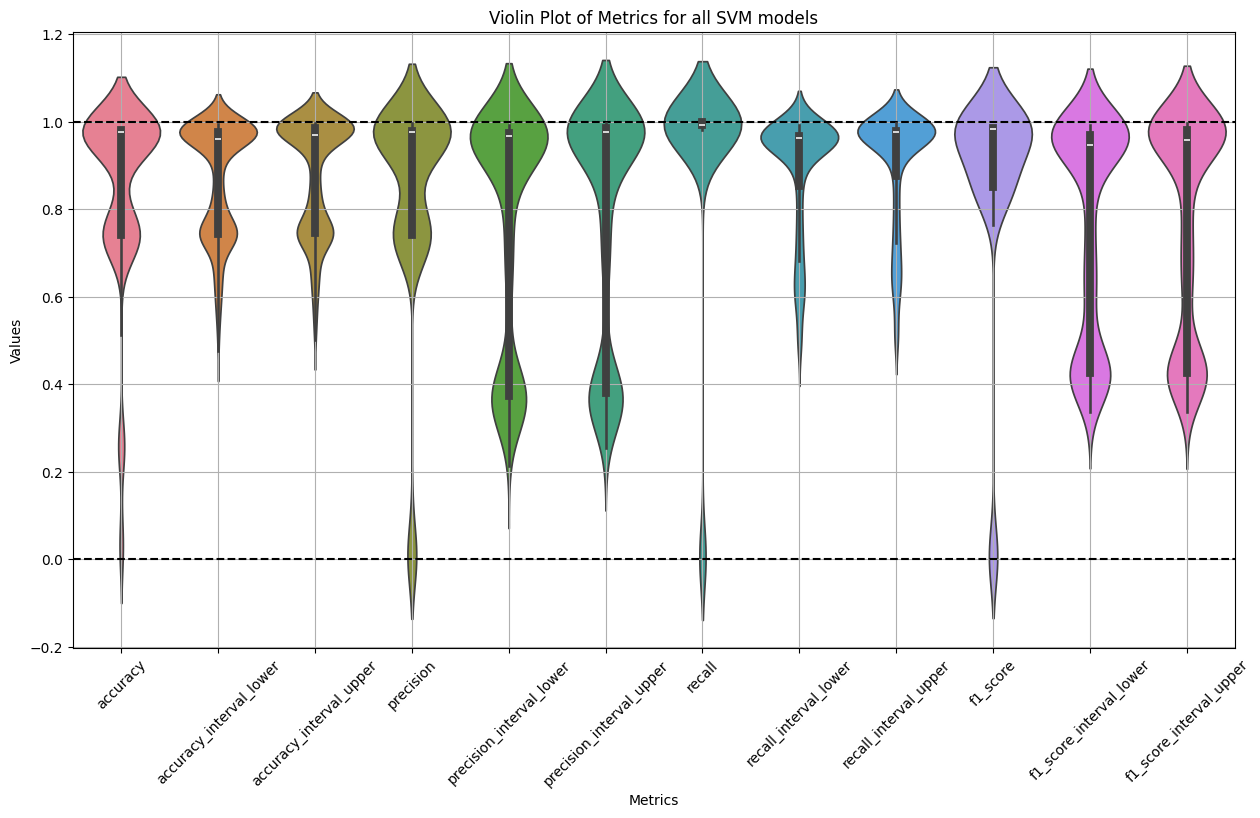

In [26]:
# Adding horizontal lines at 0.0 and 1.0
plt.figure(figsize=(15, 8))
plt.axhline(y=0.0, color='black', linestyle='--')
plt.axhline(y=1.0, color='black', linestyle='--')

# Plotting the violin plot for all SVM models
sns.violinplot(data=all_svm_df[all_svm_df.columns[2:]])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Violin Plot of Metrics for all SVM models')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

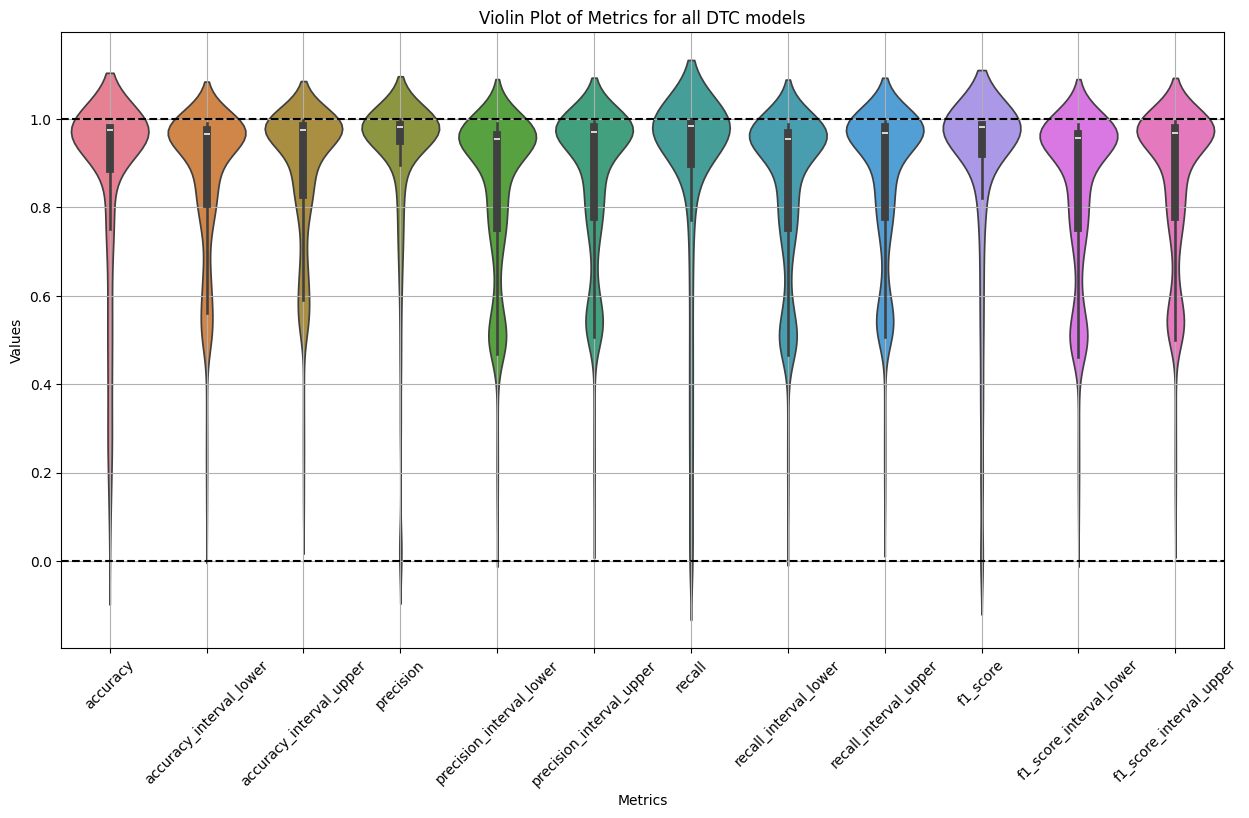

In [27]:
# Adding horizontal lines at 0.0 and 1.0
plt.figure(figsize=(15, 8))
plt.axhline(y=0.0, color='black', linestyle='--')
plt.axhline(y=1.0, color='black', linestyle='--')

# Plotting the violin plot for all DTC models
sns.violinplot(data=all_dtc_df[all_dtc_df.columns[2:]])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Violin Plot of Metrics for all DTC models')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Accuracy for each Sub-DataFrame

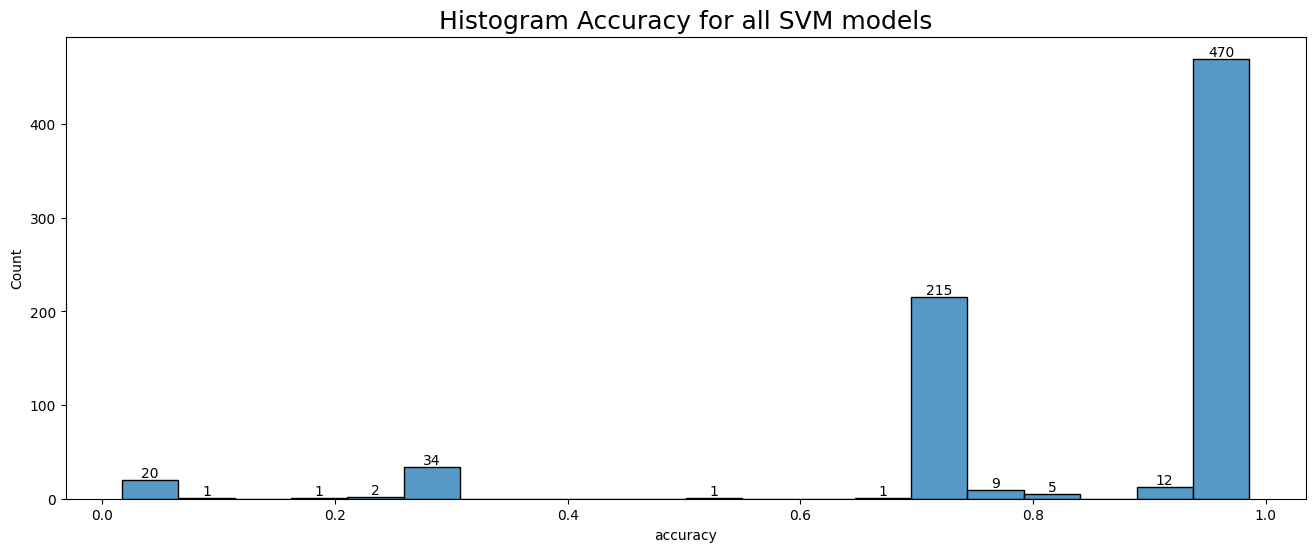

In [28]:
# Histogram Accuracy all SVM models
plt.figure(figsize=(16, 6))
plt.title("Histogram Accuracy for all SVM models", size=18)
ax = sns.histplot(x=all_svm_df['accuracy'], data=all_svm_df, bins=20)

for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2., height + 3, height, ha="center")

plt.show()

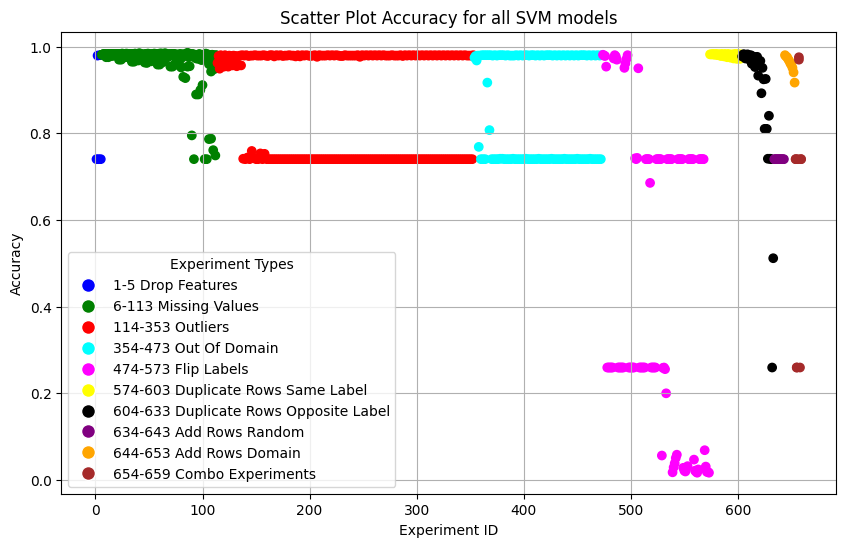

In [29]:
# Scatter plot accuracy for all SVM 
plt.figure(figsize=(10, 6))
plt.scatter(all_svm_df['experiment_id'], all_svm_df['accuracy'], c=colors_svm)

plt.xlabel('Experiment ID')
plt.ylabel('Accuracy')
plt.title('Scatter Plot Accuracy for all SVM models')
plt.grid(True)
plt.legend(handles=handles, title='Experiment Types')
plt.show()

In [30]:
# Find out which experiments lead to the minimum
all_svm_df[all_svm_df['accuracy'] == all_svm_df['accuracy'].min()]

experiment_id model_name  accuracy  accuracy_interval_lower  \
453            562        SVM  0.016997                 0.698946   
464            573        SVM  0.016997                 0.781131   

     accuracy_interval_upper  precision  precision_interval_lower  \
453                 0.723524   0.018727                  0.693511   
464                 0.796580   0.018727                  0.774178   

     precision_interval_upper    recall  recall_interval_lower  \
453                  0.725689  0.006378               0.650597   
464                  0.799164  0.006378               0.727122   

     recall_interval_upper  f1_score  f1_score_interval_lower  \
453               0.677539  0.009515                 0.653037   
464               0.744212  0.009515                 0.740122   

     f1_score_interval_upper  
453                 0.682601  
464                 0.758160

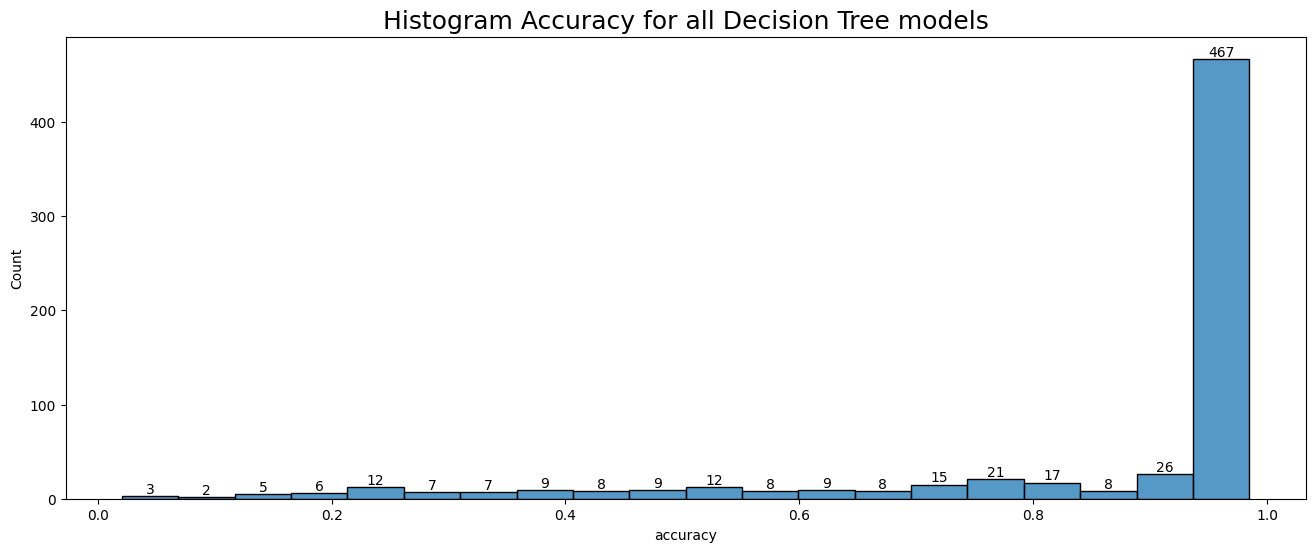

In [31]:
# Histogram Accuracy all DTC models
plt.figure(figsize=(16, 6))
plt.title("Histogram Accuracy for all Decision Tree models", size=18)
ax = sns.histplot(x=all_dtc_df['accuracy'], data=all_dtc_df, bins=20)

for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2., height + 3, height, ha="center")

plt.show()

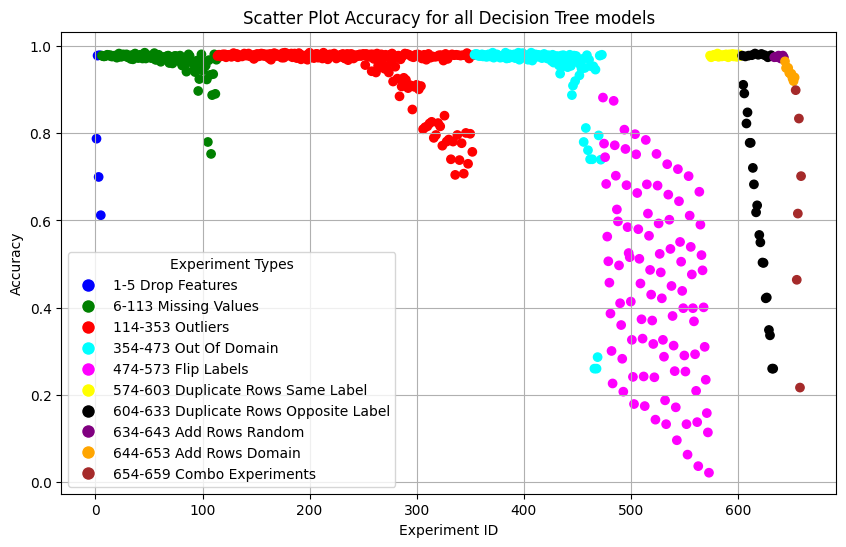

In [32]:
# Scatter plot accuracy for all DTC
plt.figure(figsize=(10, 6))
plt.scatter(all_dtc_df['experiment_id'], all_dtc_df['accuracy'], c=colors_dtc)

plt.xlabel('Experiment ID')
plt.ylabel('Accuracy')
plt.title('Scatter Plot Accuracy for all Decision Tree models')
plt.grid(True)
plt.legend(handles=handles, title='Experiment Types')
plt.show()

In [33]:
# Find out which experiments lead to the minimum
all_dtc_df[all_dtc_df['accuracy'] == all_dtc_df['accuracy'].min()]

experiment_id     model_name  accuracy  accuracy_interval_lower  \
1253            573  Decision Tree  0.020774                 0.658014   

      accuracy_interval_upper  precision  precision_interval_lower  \
1253                 0.680226   0.026217                  0.625651   

      precision_interval_upper    recall  recall_interval_lower  \
1253                  0.649945  0.008929               0.624733   

      recall_interval_upper  f1_score  f1_score_interval_lower  \
1253               0.651101  0.013321                 0.624713   

      f1_score_interval_upper  
1253                 0.650058

## Precision for each Sub-DataFrame

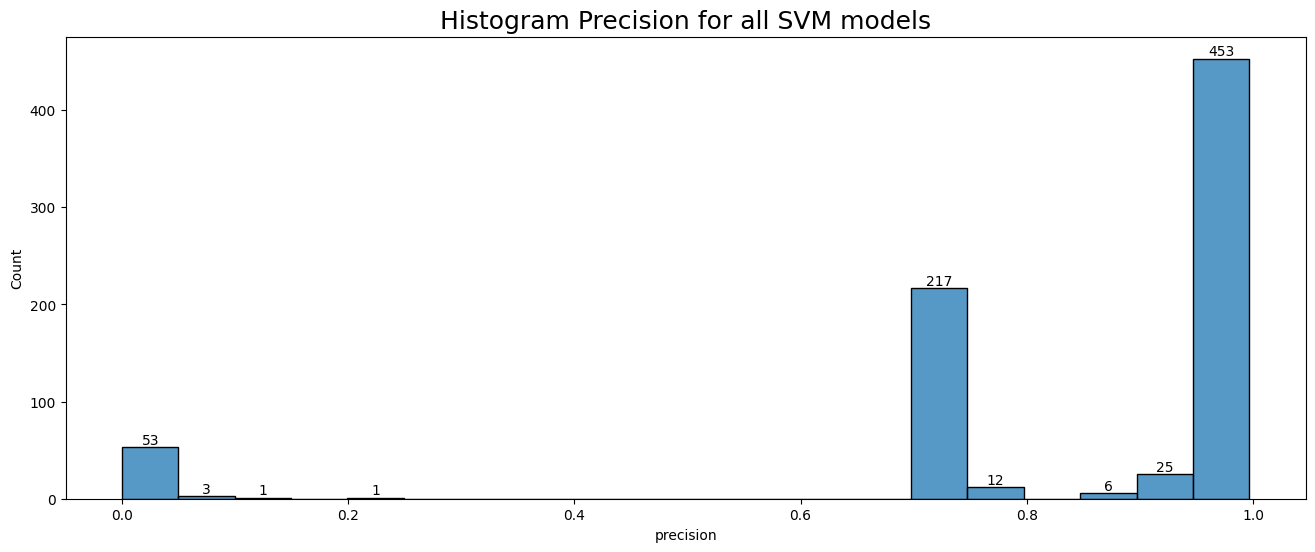

In [34]:
# Histogram Precision all SVM models
plt.figure(figsize=(16, 6))
plt.title("Histogram Precision for all SVM models", size=18)
ax = sns.histplot(x=all_svm_df['precision'], data=all_svm_df, bins=20)

for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2., height + 3, height, ha="center")

plt.show()

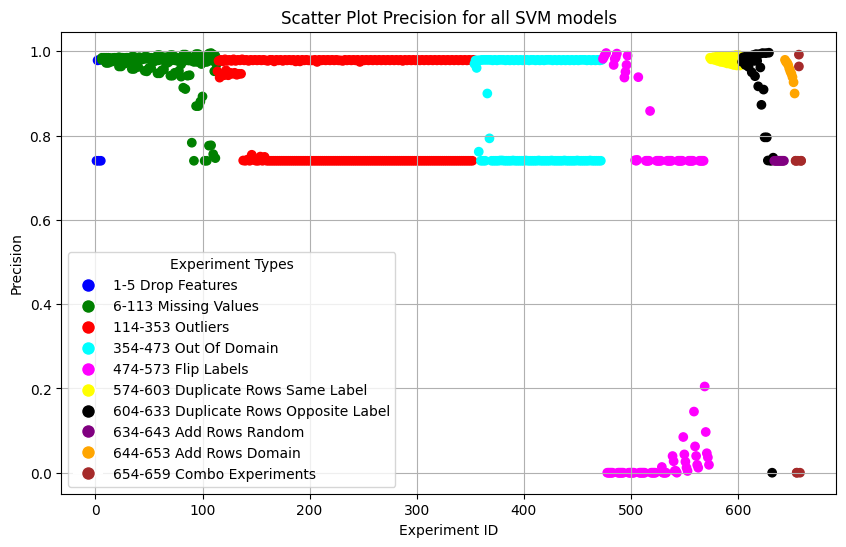

In [35]:
# Scatter plot precision for all SVM
plt.figure(figsize=(10, 6))
plt.scatter(all_svm_df['experiment_id'], all_svm_df['precision'], c=colors_svm)

plt.xlabel('Experiment ID')
plt.ylabel('Precision')
plt.title('Scatter Plot Precision for all SVM models')
plt.grid(True)
plt.legend(handles=handles, title='Experiment Types')
plt.show()

In [36]:
# Find out which experiments lead to the minimum
all_svm_df[all_svm_df['precision'] == all_svm_df['precision'].min()]

experiment_id  model_name  accuracy  accuracy_interval_lower  \
369            478         SVM  0.259679                 0.661625   
370            479         SVM  0.259679                 0.589785   
371            480         SVM  0.259679                 0.652274   
372            481         SVM  0.259679                 0.711830   
373            482         SVM  0.259679                 0.771489   
374            483         SVM  0.259679                 0.831325   
379            488         SVM  0.259679                 0.633851   
380            489         SVM  0.259679                 0.571790   
381            490         SVM  0.259679                 0.631774   
382            491         SVM  0.259679                 0.691564   
383            492         SVM  0.259679                 0.751118   
384            493         SVM  0.259679                 0.810928   
389            498         SVM  0.259679                 0.619079   
390            499         SVM  0.259679                 0.550918   
391            500         SVM  0.259679                 0.611463   
392            501         SVM  0.259679                 0.671163   
393            502         SVM  0.259679                 0.730710   
394            503         SVM  0.259679                 0.790368   
399            508         SVM  0.259679                 0.600926   
400            509         SVM  0.259679                 0.524839   
401            510         SVM  0.259679                 0.590990   
402            511         SVM  0.259679                 0.650655   
403            512         SVM  0.259679                 0.710452   
404            513         SVM  0.259679                 0.769990   
410            519         SVM  0.259679                 0.501505   
411            520         SVM  0.259679                 0.570670   
412            521         SVM  0.259679                 0.630335   
413            522         SVM  0.259679                 0.690052   
414            523         SVM  0.259679                 0.749590   
421            530         SVM  0.258735                 0.550402   
422            531         SVM  0.259679                 0.610083   
423            532         SVM  0.255902                 0.669731   
424            533         SVM  0.200189                 0.729741   
434            543         SVM  0.058546                 0.709037   
523            632         SVM  0.259679                 0.605539   
768            655    SVM (EM)  0.259679                 0.484978   
656            655  SVM (mean)  0.259679                 0.475551   
546            658         SVM  0.259679                 0.628565   

     accuracy_interval_upper  precision  precision_interval_lower  \
369                 0.678892        0.0                  0.711151   
370                 0.595105        0.0                  0.413913   
371                 0.653108        0.0                  0.326137   
372                 0.712911        0.0                  0.355915   
373                 0.772610        0.0                  0.385745   
374                 0.832131        0.0                  0.415663   
379                 0.660578        0.0                  0.671693   
380                 0.573064        0.0                  0.286005   
381                 0.632816        0.0                  0.315887   
382                 0.692383        0.0                  0.345782   
383                 0.752188        0.0                  0.375559   
384                 0.811735        0.0                  0.405464   
389                 0.650406        0.0                  0.650003   
390                 0.553142        0.0                  0.212752   
391                 0.612334        0.0                  0.305731   
392                 0.671990        0.0                  0.335582   
393                 0.731803        0.0                  0.365355   
394                 0.791502        0.0                  0.395184   
39

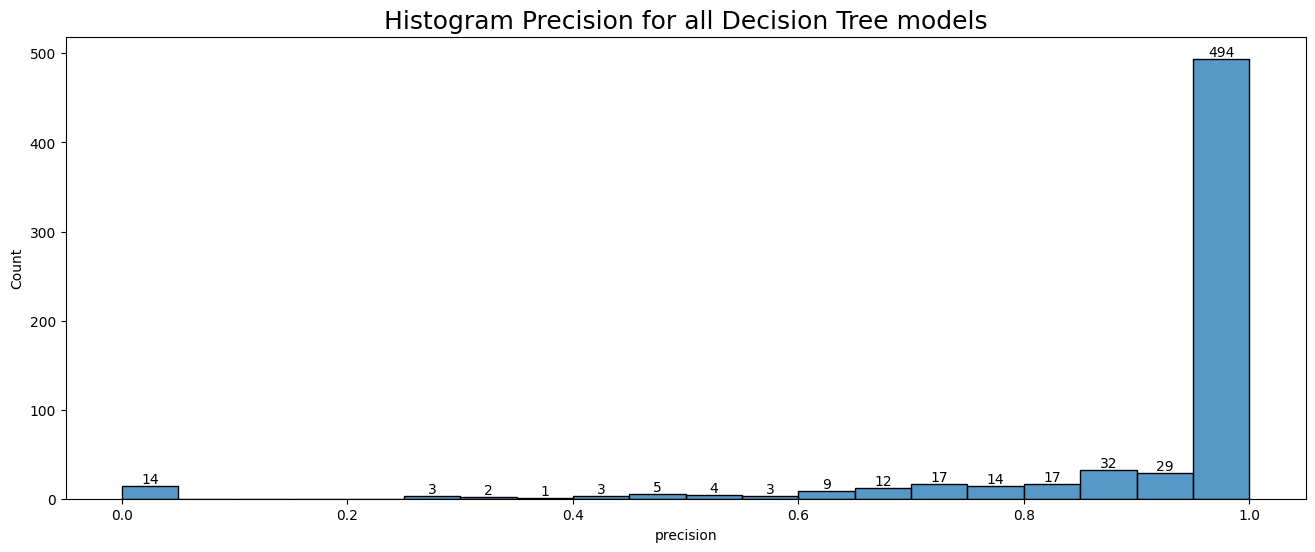

In [37]:
# Histogram Precision all DTC models
plt.figure(figsize=(16, 6))
plt.title("Histogram Precision for all Decision Tree models", size=18)
ax = sns.histplot(x=all_dtc_df['precision'], data=all_dtc_df, bins=20)

for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2., height + 3, height, ha="center")

plt.show()

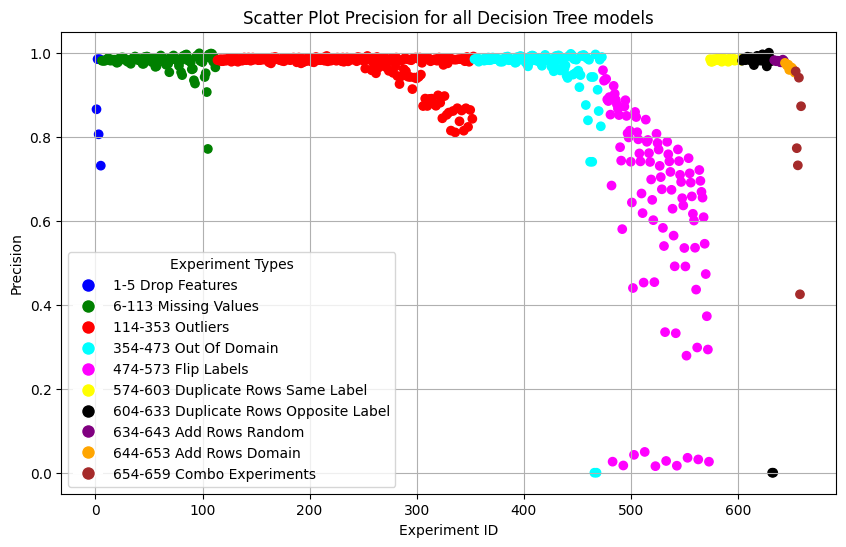

In [38]:
# Scatter plot precision for all DTC
plt.figure(figsize=(10, 6))
plt.scatter(all_dtc_df['experiment_id'], all_dtc_df['precision'], c=colors_dtc)

plt.xlabel('Experiment ID')
plt.ylabel('Precision')
plt.title('Scatter Plot Precision for all Decision Tree models')
plt.grid(True)
plt.legend(handles=handles, title='Experiment Types')
plt.show()

In [39]:
# Find out which experiments lead to the minimum
all_dtc_df[all_dtc_df['precision'] == all_dtc_df['precision'].min()]

experiment_id     model_name  accuracy  accuracy_interval_lower  \
1039            466  Decision Tree  0.259679                 0.985758   
1043            468  Decision Tree  0.259679                 0.985492   
1371            632  Decision Tree  0.259679                 0.206381   
1373            633  Decision Tree  0.259679                 0.088087   

      accuracy_interval_upper  precision  precision_interval_lower  \
1039                 0.992340        0.0                  0.979141   
1043                 0.991850        0.0                  0.978722   
1371                 0.229200        0.0                  0.183235   
1373                 0.105386        0.0                  0.086288   

      precision_interval_upper  recall  recall_interval_lower  \
1039                  0.990633     0.0               0.982513   
1043                  0.989577     0.0               0.982256   
1371                  0.202185     0.0               0.197613   
1373                  0.103404     0.0               0.089667   

      recall_interval_upper  f1_score  f1_score_interval_lower  \
1039               0.990641       0.0                 0.981413   
1043               0.990391       0.0                 0.981064   
1371               0.219479       0.0                 0.189473   
1373               0.107212       0.0                 0.087454   

      f1_score_interval_upper  
1039                 0.989903  
1043                 0.989268  
1371                 0.209204  
1373                 0.104587

## Recall for each Sub-DataFrame

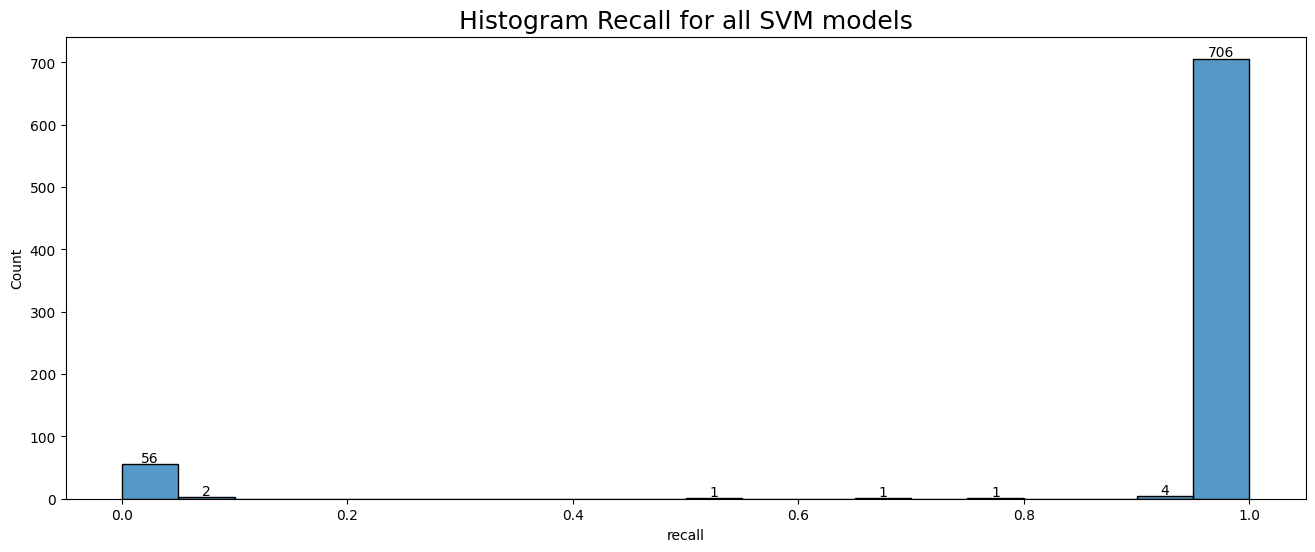

In [40]:
# Histogram recall all SVM models
plt.figure(figsize=(16, 6))
plt.title("Histogram Recall for all SVM models", size=18)
ax = sns.histplot(x=all_svm_df['recall'], data=all_svm_df, bins=20)

for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2., height + 3, height, ha="center")

plt.show()

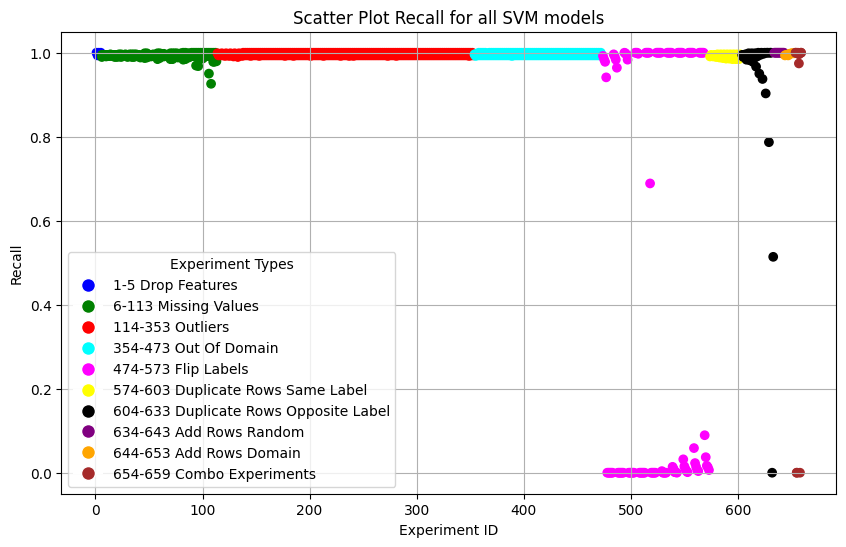

In [41]:
# Scatter plot recall for all SVM
plt.figure(figsize=(10, 6))
plt.scatter(all_svm_df['experiment_id'], all_svm_df['recall'], c=colors_svm)

plt.xlabel('Experiment ID')
plt.ylabel('Recall')
plt.title('Scatter Plot Recall for all SVM models')
plt.grid(True)
plt.legend(handles=handles, title='Experiment Types')
plt.show()

In [42]:
# Find out which experiments lead to the minimum
all_svm_df[all_svm_df['recall'] == all_svm_df['recall'].min()]

experiment_id  model_name  accuracy  accuracy_interval_lower  \
369            478         SVM  0.259679                 0.661625   
370            479         SVM  0.259679                 0.589785   
371            480         SVM  0.259679                 0.652274   
372            481         SVM  0.259679                 0.711830   
373            482         SVM  0.259679                 0.771489   
374            483         SVM  0.259679                 0.831325   
379            488         SVM  0.259679                 0.633851   
380            489         SVM  0.259679                 0.571790   
381            490         SVM  0.259679                 0.631774   
382            491         SVM  0.259679                 0.691564   
383            492         SVM  0.259679                 0.751118   
384            493         SVM  0.259679                 0.810928   
389            498         SVM  0.259679                 0.619079   
390            499         SVM  0.259679                 0.550918   
391            500         SVM  0.259679                 0.611463   
392            501         SVM  0.259679                 0.671163   
393            502         SVM  0.259679                 0.730710   
394            503         SVM  0.259679                 0.790368   
399            508         SVM  0.259679                 0.600926   
400            509         SVM  0.259679                 0.524839   
401            510         SVM  0.259679                 0.590990   
402            511         SVM  0.259679                 0.650655   
403            512         SVM  0.259679                 0.710452   
404            513         SVM  0.259679                 0.769990   
410            519         SVM  0.259679                 0.501505   
411            520         SVM  0.259679                 0.570670   
412            521         SVM  0.259679                 0.630335   
413            522         SVM  0.259679                 0.690052   
414            523         SVM  0.259679                 0.749590   
421            530         SVM  0.258735                 0.550402   
422            531         SVM  0.259679                 0.610083   
423            532         SVM  0.255902                 0.669731   
424            533         SVM  0.200189                 0.729741   
434            543         SVM  0.058546                 0.709037   
523            632         SVM  0.259679                 0.605539   
768            655    SVM (EM)  0.259679                 0.484978   
656            655  SVM (mean)  0.259679                 0.475551   
546            658         SVM  0.259679                 0.628565   

     accuracy_interval_upper  precision  precision_interval_lower  \
369                 0.678892        0.0                  0.711151   
370                 0.595105        0.0                  0.413913   
371                 0.653108        0.0                  0.326137   
372                 0.712911        0.0                  0.355915   
373                 0.772610        0.0                  0.385745   
374                 0.832131        0.0                  0.415663   
379                 0.660578        0.0                  0.671693   
380                 0.573064        0.0                  0.286005   
381                 0.632816        0.0                  0.315887   
382                 0.692383        0.0                  0.345782   
383                 0.752188        0.0                  0.375559   
384                 0.811735        0.0                  0.405464   
389                 0.650406        0.0                  0.650003   
390                 0.553142        0.0                  0.212752   
391                 0.612334        0.0                  0.305731   
392                 0.671990        0.0                  0.335582   
393                 0.731803        0.0                  0.365355   
394                 0.791502        0.0                  0.395184   
39

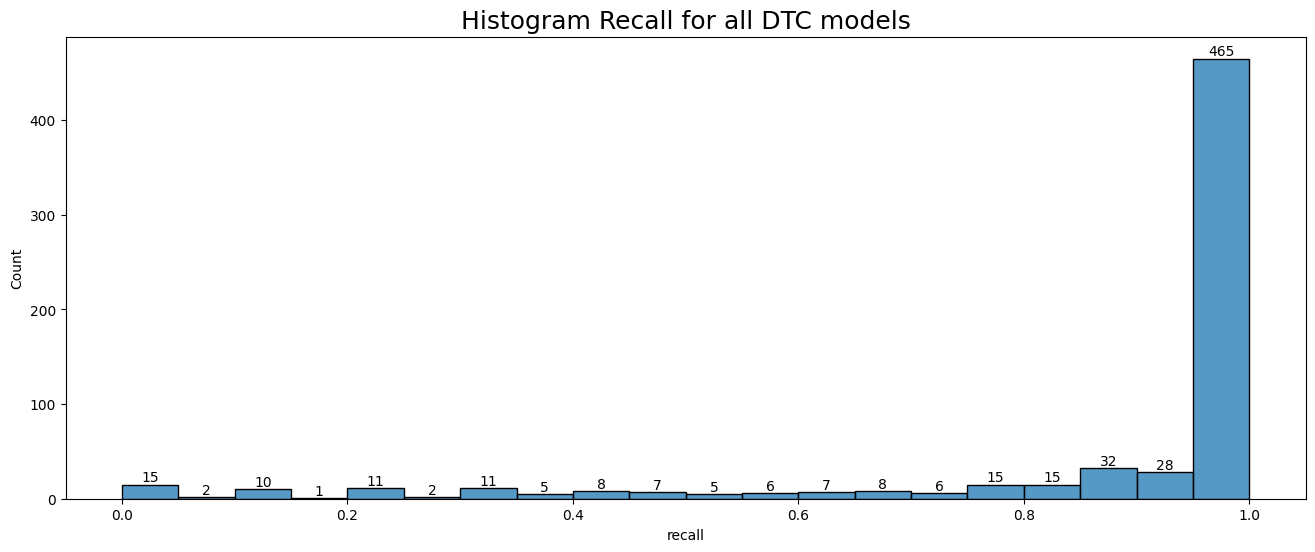

In [43]:
# Histogram recall all DTC models
plt.figure(figsize=(16, 6))
plt.title("Histogram Recall for all DTC models", size=18)
ax = sns.histplot(x=all_dtc_df['recall'], data=all_dtc_df, bins=20)

for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2., height + 3, height, ha="center")

plt.show()

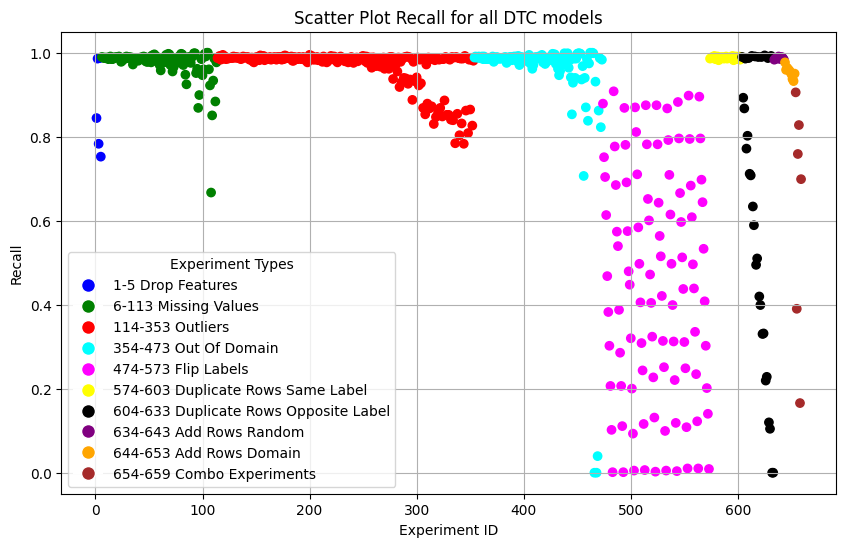

In [44]:
# Scatter plot recall for all DTC
plt.figure(figsize=(10, 6))
plt.scatter(all_dtc_df['experiment_id'], all_dtc_df['recall'], c=colors_dtc)

plt.xlabel('Experiment ID')
plt.ylabel('Recall')
plt.title('Scatter Plot Recall for all DTC models')
plt.grid(True)
plt.legend(handles=handles, title='Experiment Types')
plt.show()

In [45]:
# Find out which experiments lead to the minimum
all_dtc_df[all_dtc_df['recall'] == all_dtc_df['recall'].min()]

experiment_id     model_name  accuracy  accuracy_interval_lower  \
1039            466  Decision Tree  0.259679                 0.985758   
1043            468  Decision Tree  0.259679                 0.985492   
1371            632  Decision Tree  0.259679                 0.206381   
1373            633  Decision Tree  0.259679                 0.088087   

      accuracy_interval_upper  precision  precision_interval_lower  \
1039                 0.992340        0.0                  0.979141   
1043                 0.991850        0.0                  0.978722   
1371                 0.229200        0.0                  0.183235   
1373                 0.105386        0.0                  0.086288   

      precision_interval_upper  recall  recall_interval_lower  \
1039                  0.990633     0.0               0.982513   
1043                  0.989577     0.0               0.982256   
1371                  0.202185     0.0               0.197613   
1373                  0.103404     0.0               0.089667   

      recall_interval_upper  f1_score  f1_score_interval_lower  \
1039               0.990641       0.0                 0.981413   
1043               0.990391       0.0                 0.981064   
1371               0.219479       0.0                 0.189473   
1373               0.107212       0.0                 0.087454   

      f1_score_interval_upper  
1039                 0.989903  
1043                 0.989268  
1371                 0.209204  
1373                 0.104587

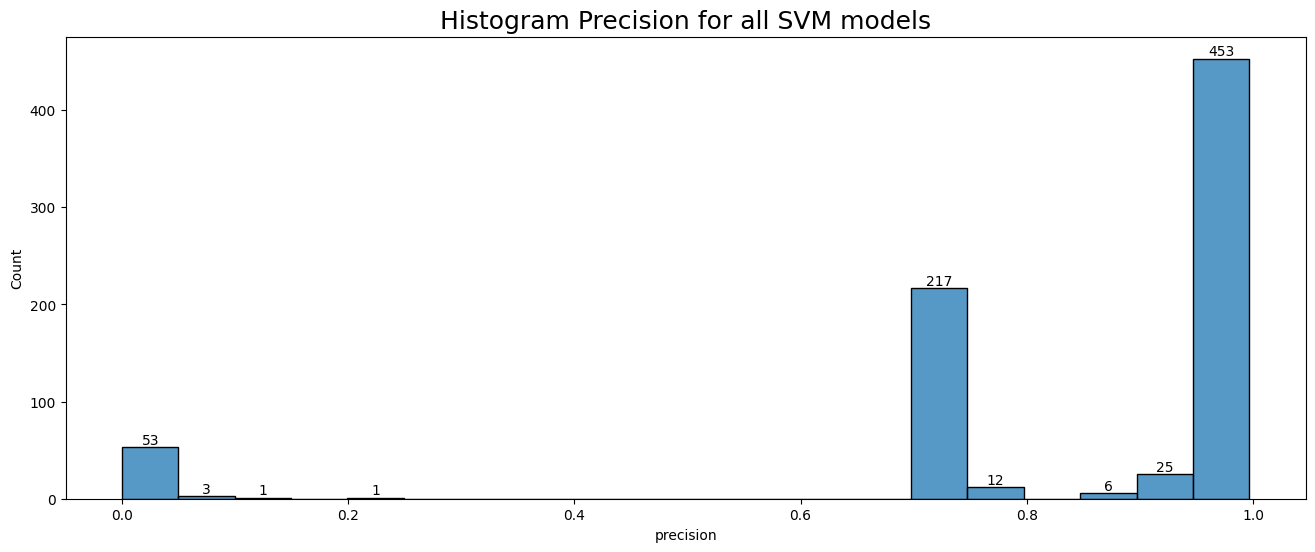

In [46]:
# Histogram Precision all SVM models
plt.figure(figsize=(16, 6))
plt.title("Histogram Precision for all SVM models", size=18)
ax = sns.histplot(x=all_svm_df['precision'], data=all_svm_df, bins=20)

for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2., height + 3, height, ha="center")

plt.show()

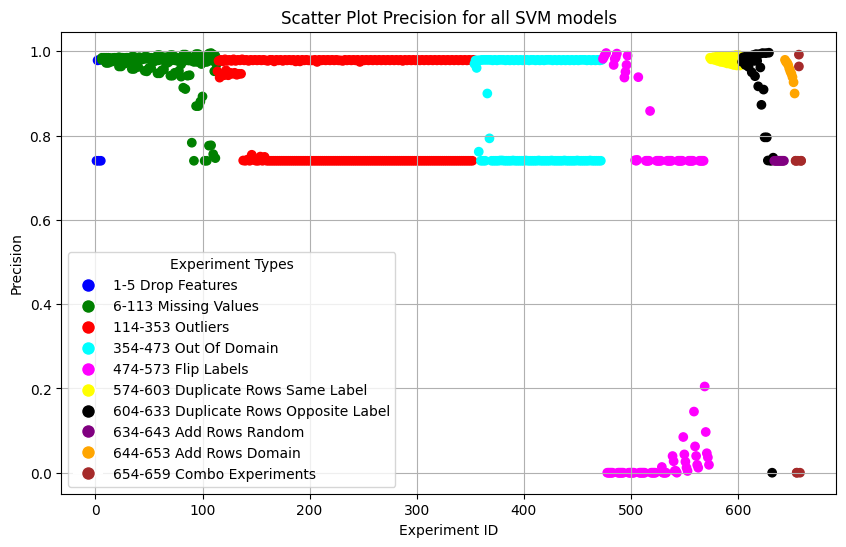

In [47]:
# Scatter plot precision for all SVM
plt.figure(figsize=(10, 6))
plt.scatter(all_svm_df['experiment_id'], all_svm_df['precision'], c=colors_svm)

plt.xlabel('Experiment ID')
plt.ylabel('Precision')
plt.title('Scatter Plot Precision for all SVM models')
plt.grid(True)
plt.legend(handles=handles, title='Experiment Types')
plt.show()

In [48]:
# Find out which experiments lead to the minimum
all_svm_df[all_svm_df['precision'] == all_svm_df['precision'].min()]

experiment_id  model_name  accuracy  accuracy_interval_lower  \
369            478         SVM  0.259679                 0.661625   
370            479         SVM  0.259679                 0.589785   
371            480         SVM  0.259679                 0.652274   
372            481         SVM  0.259679                 0.711830   
373            482         SVM  0.259679                 0.771489   
374            483         SVM  0.259679                 0.831325   
379            488         SVM  0.259679                 0.633851   
380            489         SVM  0.259679                 0.571790   
381            490         SVM  0.259679                 0.631774   
382            491         SVM  0.259679                 0.691564   
383            492         SVM  0.259679                 0.751118   
384            493         SVM  0.259679                 0.810928   
389            498         SVM  0.259679                 0.619079   
390            499         SVM  0.259679                 0.550918   
391            500         SVM  0.259679                 0.611463   
392            501         SVM  0.259679                 0.671163   
393            502         SVM  0.259679                 0.730710   
394            503         SVM  0.259679                 0.790368   
399            508         SVM  0.259679                 0.600926   
400            509         SVM  0.259679                 0.524839   
401            510         SVM  0.259679                 0.590990   
402            511         SVM  0.259679                 0.650655   
403            512         SVM  0.259679                 0.710452   
404            513         SVM  0.259679                 0.769990   
410            519         SVM  0.259679                 0.501505   
411            520         SVM  0.259679                 0.570670   
412            521         SVM  0.259679                 0.630335   
413            522         SVM  0.259679                 0.690052   
414            523         SVM  0.259679                 0.749590   
421            530         SVM  0.258735                 0.550402   
422            531         SVM  0.259679                 0.610083   
423            532         SVM  0.255902                 0.669731   
424            533         SVM  0.200189                 0.729741   
434            543         SVM  0.058546                 0.709037   
523            632         SVM  0.259679                 0.605539   
768            655    SVM (EM)  0.259679                 0.484978   
656            655  SVM (mean)  0.259679                 0.475551   
546            658         SVM  0.259679                 0.628565   

     accuracy_interval_upper  precision  precision_interval_lower  \
369                 0.678892        0.0                  0.711151   
370                 0.595105        0.0                  0.413913   
371                 0.653108        0.0                  0.326137   
372                 0.712911        0.0                  0.355915   
373                 0.772610        0.0                  0.385745   
374                 0.832131        0.0                  0.415663   
379                 0.660578        0.0                  0.671693   
380                 0.573064        0.0                  0.286005   
381                 0.632816        0.0                  0.315887   
382                 0.692383        0.0                  0.345782   
383                 0.752188        0.0                  0.375559   
384                 0.811735        0.0                  0.405464   
389                 0.650406        0.0                  0.650003   
390                 0.553142        0.0                  0.212752   
391                 0.612334        0.0                  0.305731   
392                 0.671990        0.0                  0.335582   
393                 0.731803        0.0                  0.365355   
394                 0.791502        0.0                  0.395184   
39

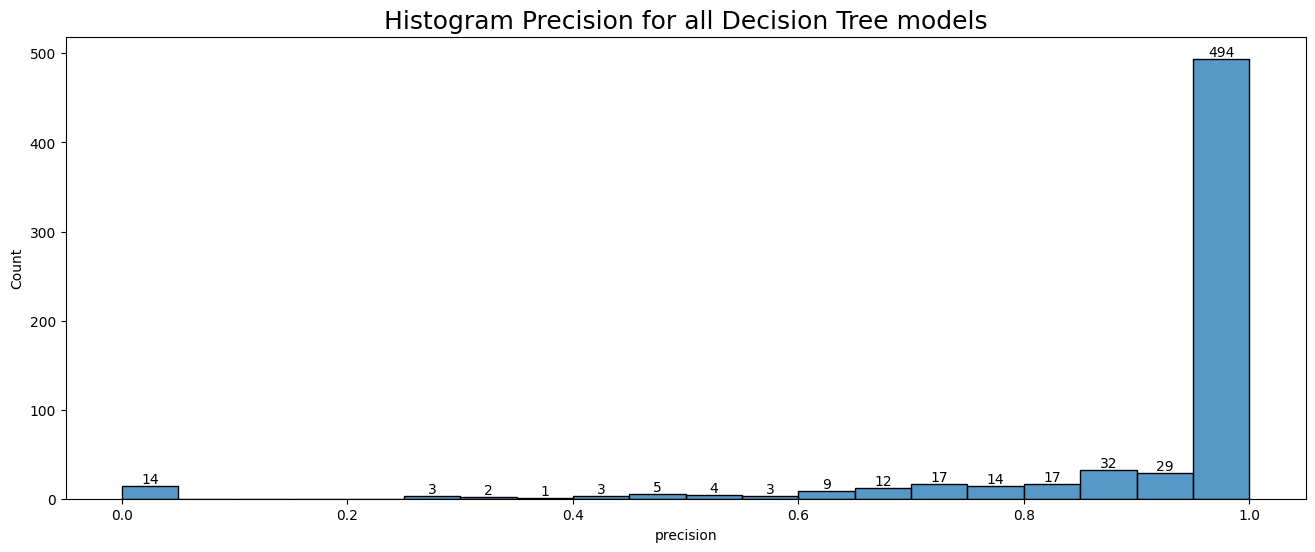

In [49]:
# Histogram Precision all DTC models
plt.figure(figsize=(16, 6))
plt.title("Histogram Precision for all Decision Tree models", size=18)
ax = sns.histplot(x=all_dtc_df['precision'], data=all_dtc_df, bins=20)

for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2., height + 3, height, ha="center")

plt.show()

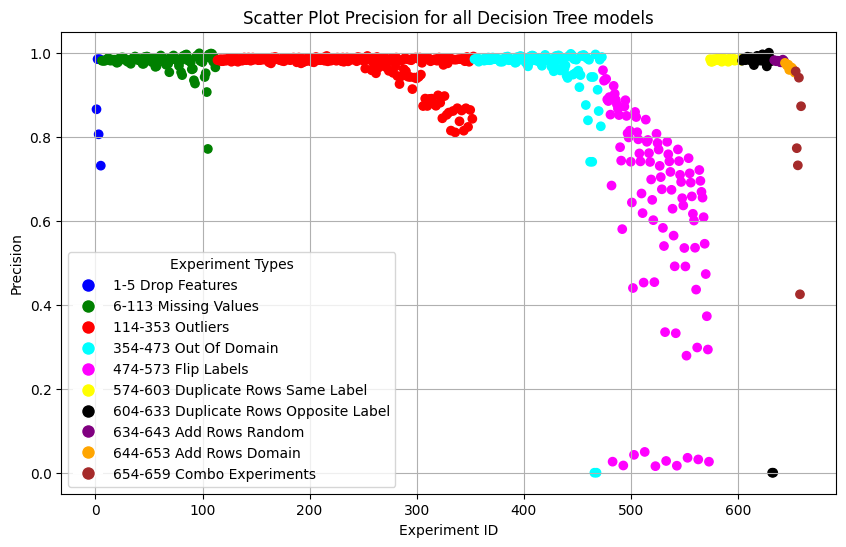

In [50]:
# Scatter plot precision for all DTC
plt.figure(figsize=(10, 6))
plt.scatter(all_dtc_df['experiment_id'], all_dtc_df['precision'], c=colors_dtc)

plt.xlabel('Experiment ID')
plt.ylabel('Precision')
plt.title('Scatter Plot Precision for all Decision Tree models')
plt.grid(True)
plt.legend(handles=handles, title='Experiment Types')
plt.show()

In [51]:
# Find out which experiments lead to the minimum
all_dtc_df[all_dtc_df['precision'] == all_dtc_df['precision'].min()]

experiment_id     model_name  accuracy  accuracy_interval_lower  \
1039            466  Decision Tree  0.259679                 0.985758   
1043            468  Decision Tree  0.259679                 0.985492   
1371            632  Decision Tree  0.259679                 0.206381   
1373            633  Decision Tree  0.259679                 0.088087   

      accuracy_interval_upper  precision  precision_interval_lower  \
1039                 0.992340        0.0                  0.979141   
1043                 0.991850        0.0                  0.978722   
1371                 0.229200        0.0                  0.183235   
1373                 0.105386        0.0                  0.086288   

      precision_interval_upper  recall  recall_interval_lower  \
1039                  0.990633     0.0               0.982513   
1043                  0.989577     0.0               0.982256   
1371                  0.202185     0.0               0.197613   
1373                  0.103404     0.0               0.089667   

      recall_interval_upper  f1_score  f1_score_interval_lower  \
1039               0.990641       0.0                 0.981413   
1043               0.990391       0.0                 0.981064   
1371               0.219479       0.0                 0.189473   
1373               0.107212       0.0                 0.087454   

      f1_score_interval_upper  
1039                 0.989903  
1043                 0.989268  
1371                 0.209204  
1373                 0.104587

## F1 score for each Sub-DataFrame

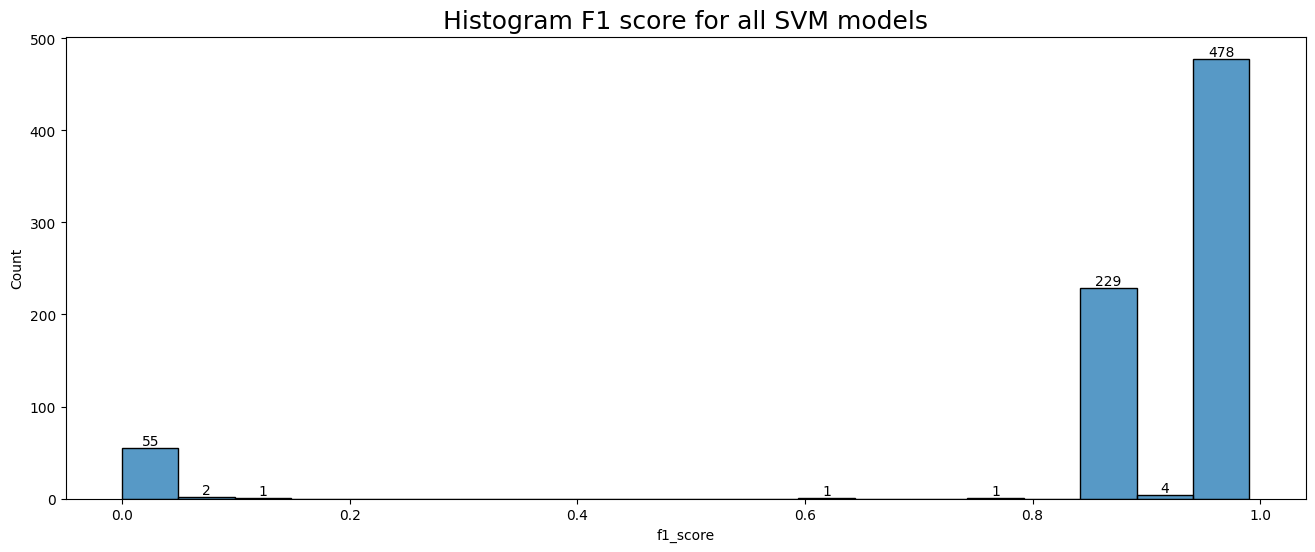

In [52]:
# Histogram F1 score all SVM models
plt.figure(figsize=(16, 6))
plt.title("Histogram F1 score for all SVM models", size=18)
ax = sns.histplot(x=all_svm_df['f1_score'], data=all_svm_df, bins=20)

for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2., height + 3, height, ha="center")

plt.show()

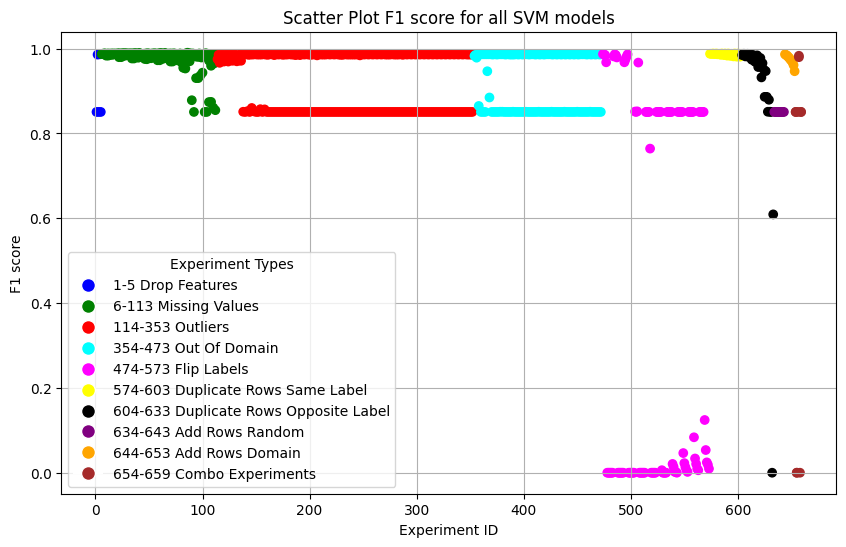

In [53]:
# Scatter plot F1 score for all SVM
plt.figure(figsize=(10, 6))
plt.scatter(all_svm_df['experiment_id'], all_svm_df['f1_score'], c=colors_svm)

plt.xlabel('Experiment ID')
plt.ylabel('F1 score')
plt.title('Scatter Plot F1 score for all SVM models')
plt.grid(True)
plt.legend(handles=handles, title='Experiment Types')
plt.show()

In [54]:
# Find out which experiments lead to the minimum
all_svm_df[all_svm_df['f1_score'] == all_svm_df['f1_score'].min()]

experiment_id  model_name  accuracy  accuracy_interval_lower  \
369            478         SVM  0.259679                 0.661625   
370            479         SVM  0.259679                 0.589785   
371            480         SVM  0.259679                 0.652274   
372            481         SVM  0.259679                 0.711830   
373            482         SVM  0.259679                 0.771489   
374            483         SVM  0.259679                 0.831325   
379            488         SVM  0.259679                 0.633851   
380            489         SVM  0.259679                 0.571790   
381            490         SVM  0.259679                 0.631774   
382            491         SVM  0.259679                 0.691564   
383            492         SVM  0.259679                 0.751118   
384            493         SVM  0.259679                 0.810928   
389            498         SVM  0.259679                 0.619079   
390            499         SVM  0.259679                 0.550918   
391            500         SVM  0.259679                 0.611463   
392            501         SVM  0.259679                 0.671163   
393            502         SVM  0.259679                 0.730710   
394            503         SVM  0.259679                 0.790368   
399            508         SVM  0.259679                 0.600926   
400            509         SVM  0.259679                 0.524839   
401            510         SVM  0.259679                 0.590990   
402            511         SVM  0.259679                 0.650655   
403            512         SVM  0.259679                 0.710452   
404            513         SVM  0.259679                 0.769990   
410            519         SVM  0.259679                 0.501505   
411            520         SVM  0.259679                 0.570670   
412            521         SVM  0.259679                 0.630335   
413            522         SVM  0.259679                 0.690052   
414            523         SVM  0.259679                 0.749590   
421            530         SVM  0.258735                 0.550402   
422            531         SVM  0.259679                 0.610083   
423            532         SVM  0.255902                 0.669731   
424            533         SVM  0.200189                 0.729741   
434            543         SVM  0.058546                 0.709037   
523            632         SVM  0.259679                 0.605539   
768            655    SVM (EM)  0.259679                 0.484978   
656            655  SVM (mean)  0.259679                 0.475551   
546            658         SVM  0.259679                 0.628565   

     accuracy_interval_upper  precision  precision_interval_lower  \
369                 0.678892        0.0                  0.711151   
370                 0.595105        0.0                  0.413913   
371                 0.653108        0.0                  0.326137   
372                 0.712911        0.0                  0.355915   
373                 0.772610        0.0                  0.385745   
374                 0.832131        0.0                  0.415663   
379                 0.660578        0.0                  0.671693   
380                 0.573064        0.0                  0.286005   
381                 0.632816        0.0                  0.315887   
382                 0.692383        0.0                  0.345782   
383                 0.752188        0.0                  0.375559   
384                 0.811735        0.0                  0.405464   
389                 0.650406        0.0                  0.650003   
390                 0.553142        0.0                  0.212752   
391                 0.612334        0.0                  0.305731   
392                 0.671990        0.0                  0.335582   
393                 0.731803        0.0                  0.365355   
394                 0.791502        0.0                  0.395184   
39

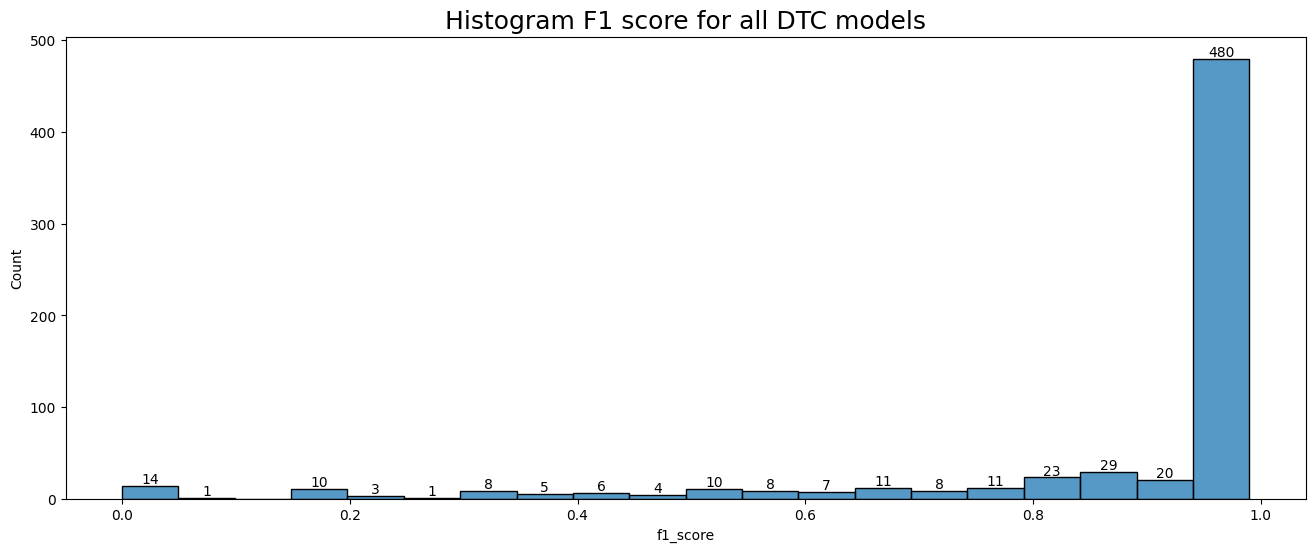

In [55]:
# Histogram F1 score all DTC models
plt.figure(figsize=(16, 6))
plt.title("Histogram F1 score for all DTC models", size=18)
ax = sns.histplot(x=all_dtc_df['f1_score'], data=all_dtc_df, bins=20)

for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2., height + 3, height, ha="center")

plt.show()

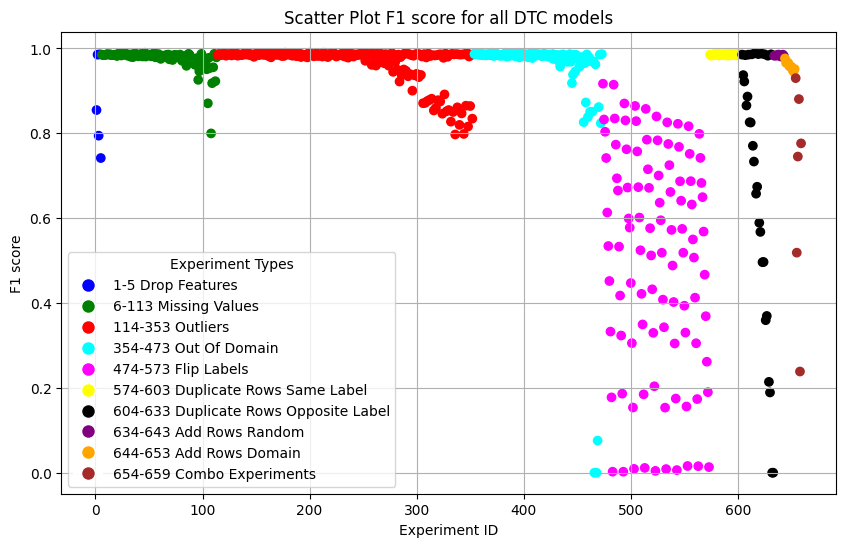

In [56]:
# Scatter plot F1 score for all DTC
plt.figure(figsize=(10, 6))
plt.scatter(all_dtc_df['experiment_id'], all_dtc_df['f1_score'], c=colors_dtc)

plt.xlabel('Experiment ID')
plt.ylabel('F1 score')
plt.title('Scatter Plot F1 score for all DTC models')
plt.grid(True)
plt.legend(handles=handles, title='Experiment Types')
plt.show()

In [57]:
# Find out which experiments lead to the minimum
all_dtc_df[all_dtc_df['f1_score'] == all_dtc_df['f1_score'].min()]

experiment_id     model_name  accuracy  accuracy_interval_lower  \
1039            466  Decision Tree  0.259679                 0.985758   
1043            468  Decision Tree  0.259679                 0.985492   
1371            632  Decision Tree  0.259679                 0.206381   
1373            633  Decision Tree  0.259679                 0.088087   

      accuracy_interval_upper  precision  precision_interval_lower  \
1039                 0.992340        0.0                  0.979141   
1043                 0.991850        0.0                  0.978722   
1371                 0.229200        0.0                  0.183235   
1373                 0.105386        0.0                  0.086288   

      precision_interval_upper  recall  recall_interval_lower  \
1039                  0.990633     0.0               0.982513   
1043                  0.989577     0.0               0.982256   
1371                  0.202185     0.0               0.197613   
1373                  0.103404     0.0               0.089667   

      recall_interval_upper  f1_score  f1_score_interval_lower  \
1039               0.990641       0.0                 0.981413   
1043               0.990391       0.0                 0.981064   
1371               0.219479       0.0                 0.189473   
1373               0.107212       0.0                 0.087454   

      f1_score_interval_upper  
1039                 0.989903  
1043                 0.989268  
1371                 0.209204  
1373                 0.104587

## Plots for each kind of Experiment

### Experiment Parameters from JSON

In [58]:
# Generic function for getting experiment parameters from json, given the experiment indexes
def get_experiment_parameters(file_path, start_index, end_index):
    try:
        # Read File
        with open(file_path, 'r') as file:
            experiment_data = json.load(file)      
    except FileNotFoundError as e:
        print(f"File not found: {e}")
        return None
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

    results = []
    for index in range(start_index - 1, end_index):
        if index < len(experiment_data):
            experiment = experiment_data[index]
            results.append(experiment)
        else:
            print(f"Index {index + 1} is out of range")
    
    return results

In [59]:
# Define metrics and colors
metrics = {
    'accuracy': 'purple',
    'precision': 'blue',
    'recall': 'green',
    'f1_score': 'red'
}

# Features to consider
features_to_consider_list = [["PC1"], ["PC2"], ["PC1", "PC2"], ["PC3", "PC4", "PC5"]]

# Ranges to consider
range_type_to_consider_list = ["std", "iqr"] 

# Types to consider
wine_types_to_consider_list = [["red"], ["white"], ["red", "white"]]

### Drop Features

In [60]:
# Range for Drop Features Experiments
start_index = 1
end_index = 5
drop_features = get_experiment_parameters('../experiments_pipeline/experiments_config.json', start_index, end_index)
# Print the data to verify if it's correct
print(json.dumps(drop_features, indent=4))

[
    {
        "experiment-name": "experiment #1",
        "features-to-drop": [
            "PC1"
        ]
    },
    {
        "experiment-name": "experiment #2",
        "features-to-drop": [
            "PC2"
        ]
    },
    {
        "experiment-name": "experiment #3",
        "features-to-drop": [
            "PC1",
            "PC2"
        ]
    },
    {
        "experiment-name": "experiment #4",
        "features-to-drop": [
            "PC3",
            "PC4",
            "PC5"
        ]
    },
    {
        "experiment-name": "experiment #5",
        "features-to-drop": [
            "PC1",
            "PC2",
            "PC3",
            "PC4"
        ]
    }
]


In [61]:
def get_results_drop_features():
    # Get the filtered data, needed for the plots
    results = [(int(experiment["experiment-name"][12:]), experiment["features-to-drop"]) 
    for experiment in drop_features]

    # Insert in the first position the "fake" experiment, used for the ML pipeline metrics
    results.insert(0, (0, []))

    return results

In [62]:
# Function to plot
def plot_drop_features_graph(model_name_to_consider):
    # Get the results object
    results = get_results_drop_features()

    # Make the graph
    plt.figure(figsize=(10, 6))

    for metric, color in metrics.items():
        # Initialize lists to collect x and y values
        x_values = []
        y_values = []

        for experiment_id, features_to_drop in results:
            # Select the correct experiment in the df of metrics
            data = df[(df['experiment_id'] == experiment_id) & (df['model_name'] == model_name_to_consider)]

            if data.empty:
                # Experiment 0
                assert experiment_id == 0, "Something went wrong, expected experiment 0"
                
                # Get the data properly
                data = df[(df['experiment_id'] == experiment_id) & (df['model_name'] == model_name_to_consider)]

                if data.empty:
                    if data.empty:
                        print("DEBUG - Nessun dato trovato per:")
                        print("  experiment_id:", experiment_id)
                        print("  model_name_to_consider:", model_name_to_consider)
                        print("Modelli disponibili:", df['model_name'].unique())
                        print("Esperimenti disponibili:", df['experiment_id'].unique())
                        continue  # oppure return

            # Get the metrics
            metric_value = data[metric].values[0]
            # Collect the data points
            x_values.append(f'{features_to_drop}')
            y_values.append(metric_value)
        
        # Plot all collected points and lines for the current metric
        plt.plot(x_values, y_values, marker='o', linestyle='-', color=color, label=f"{metric.upper()} ({model_name_to_consider})")
        
    plt.xlabel('Dropped Feature(s)')
    plt.ylabel('Metrics Values')
    plt.title(f'Drop Features - Performance Metrics {model_name_to_consider}')
    plt.legend(loc='best')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

#### SVM

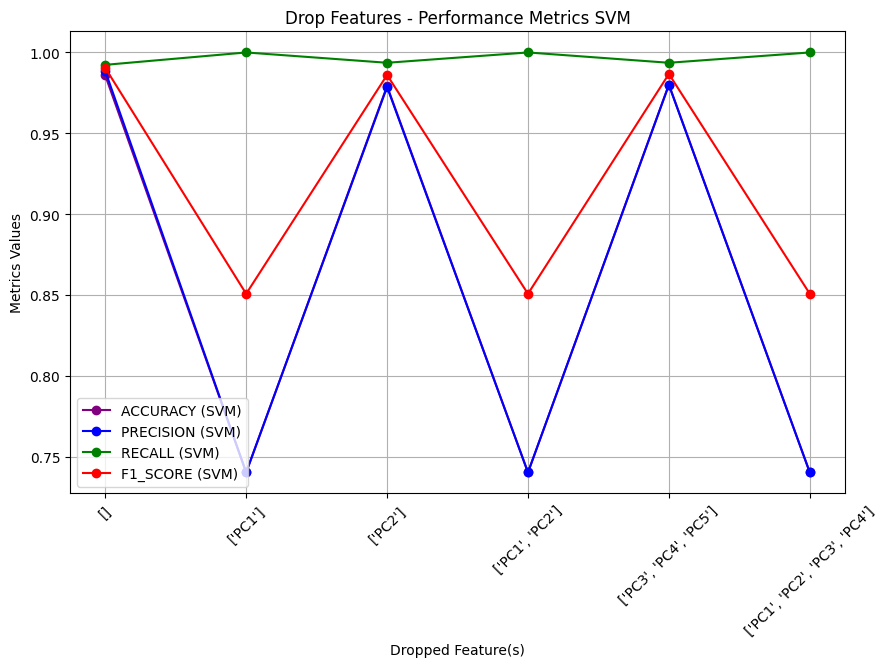

In [63]:
plot_drop_features_graph("SVM")

#### Decision Tree

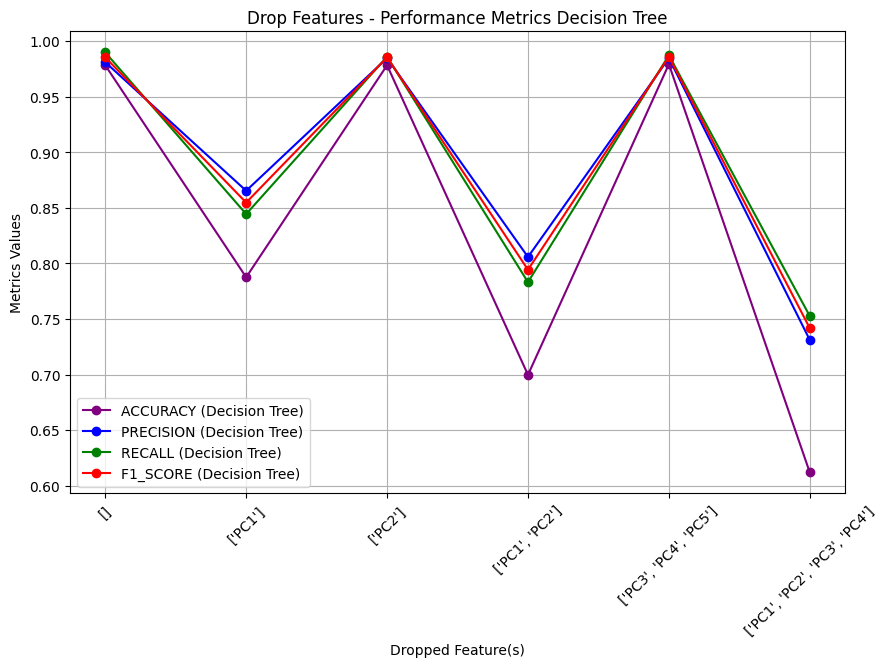

In [64]:
plot_drop_features_graph("Decision Tree")

### Missing Values

In [65]:
# Range for Missing Values Experiments
start_index = 6 
end_index = 113   
missing_values = get_experiment_parameters('../experiments_pipeline/experiments_config.json', start_index, end_index)
# Print the data to verify if it's correct
print(json.dumps(missing_values, indent=4))

Index 8 is out of range
Index 9 is out of range
Index 10 is out of range
Index 11 is out of range
Index 12 is out of range
Index 13 is out of range
Index 14 is out of range
Index 15 is out of range
Index 16 is out of range
Index 17 is out of range
Index 18 is out of range
Index 19 is out of range
Index 20 is out of range
Index 21 is out of range
Index 22 is out of range
Index 23 is out of range
Index 24 is out of range
Index 25 is out of range
Index 26 is out of range
Index 27 is out of range
Index 28 is out of range
Index 29 is out of range
Index 30 is out of range
Index 31 is out of range
Index 32 is out of range
Index 33 is out of range
Index 34 is out of range
Index 35 is out of range
Index 36 is out of range
Index 37 is out of range
Index 38 is out of range
Index 39 is out of range
Index 40 is out of range
Index 41 is out of range
Index 42 is out of range
Index 43 is out of range
Index 44 is out of range
Index 45 is out of range
Index 46 is out of range
Index 47 is out of range
In

In [87]:
def get_results_mv(features_to_consider, wine_types_to_consider_missing_values):
    print(f"DEBUG: feature={features_to_consider}, wine_types={wine_types_to_consider_missing_values}")
    
    results = []
    for experiment in missing_values:
        try:
            if (experiment["features-to-dirty-mv"] == features_to_consider and
                experiment["wine-types-to-consider-missing-values"] == wine_types_to_consider_missing_values):
                
                exp_id = int(experiment["experiment-name"][12:]) if "experiment-name" in experiment else -1
                results.append((
                    exp_id,
                    experiment.get("missing-values-percentage", 0.0),
                    experiment.get("wine-types-to-consider-missing-values", "unknown")
                ))
        except Exception as e:
            print("Errore durante il parsing di un experiment:", e)
            print("Contenuto:", experiment)

    if len(results) >= 2:
        results.insert(0, (0, 0.0, results[1][2]))
    elif len(results) == 1:
        results.insert(0, (0, 0.0, results[0][2]))
    else:
        print(f"⚠️ Nessun risultato trovato.")

    return results

In [88]:
# Function to plot
def plot_missing_values_graph(model_name_to_consider, features_to_consider, wine_types_to_consider_missing_values):
    # Get the results object
    results = get_results_mv(features_to_consider, wine_types_to_consider_missing_values)

    # Make the graph
    plt.figure(figsize=(10, 6))

    # Flag model_name ends with (mean) or (EM)
    flag = model_name_to_consider.endswith('(mean)') or model_name_to_consider.endswith('(EM)')

    for metric, color in metrics.items():
        # Initialize lists to collect x and y values
        x_values = []
        y_values = []

        for experiment_id, missing_values_percentage, _ in results:
            # Select the correct experiment in the df of metrics
            data = df[(df['experiment_id'] == experiment_id) & (df['model_name'] == model_name_to_consider)]

            if data.empty:
                # Experiment 0 and (mean) or (EM) in model_name
                assert experiment_id == 0 and flag, "Something went wrong, expected experiment 0 and model_name which ends with (mean) or (EM)"
                
                if model_name_to_consider.endswith('(mean)'):
                    # Remove (mean) from the parameter
                    model_name_to_consider_fixed = model_name_to_consider[:-7]
                else:
                    # Remove (EM) from the parameter
                    model_name_to_consider_fixed = model_name_to_consider[:-5]

                # Get the data properly
                data = df[(df['experiment_id'] == experiment_id) & (df['model_name'] == model_name_to_consider_fixed)]

                if data.empty:
                    assert False, "This was unexpected"

            # Get the metrics
            metric_value = data[metric].values[0]
            # Collect the data points
            x_values.append(missing_values_percentage * 100)
            y_values.append(metric_value)
        
        # Plot all collected points and lines for the current metric
        plt.plot(x_values, y_values, marker='o', linestyle='-', color=color, label=f"{metric.upper()} ({model_name_to_consider})")
        
    plt.xlabel('Missing Values (%)')
    plt.ylabel('Metrics Values')
    plt.title(f'Missing Values - Performance Metrics {model_name_to_consider} for Component(s) {features_to_consider} and Target(s) {wine_types_to_consider_missing_values}')
    plt.legend(loc='best')
    plt.grid(True)
    plt.xticks([10 * i for i in range(0, 10)])
    plt.show()

#### SVM

DEBUG: feature=['PC1'], wine_types=['red']


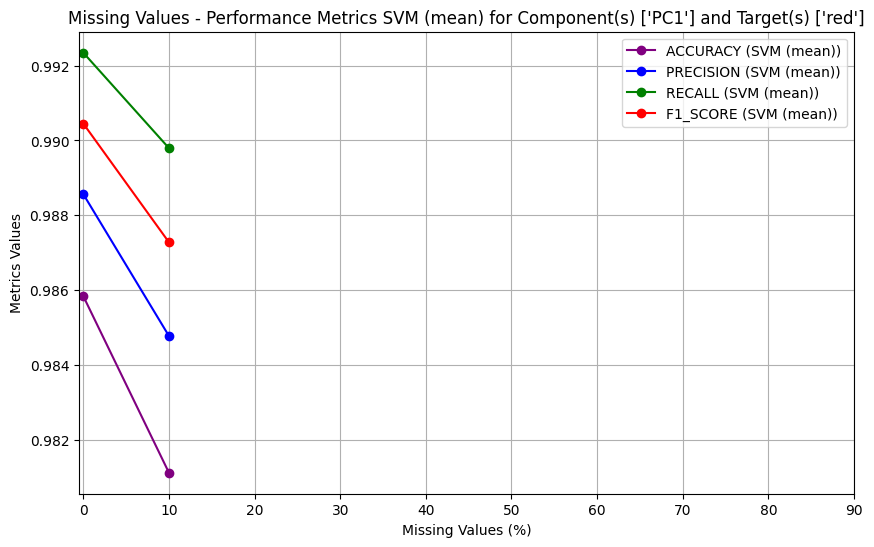

DEBUG: feature=['PC1'], wine_types=['red']


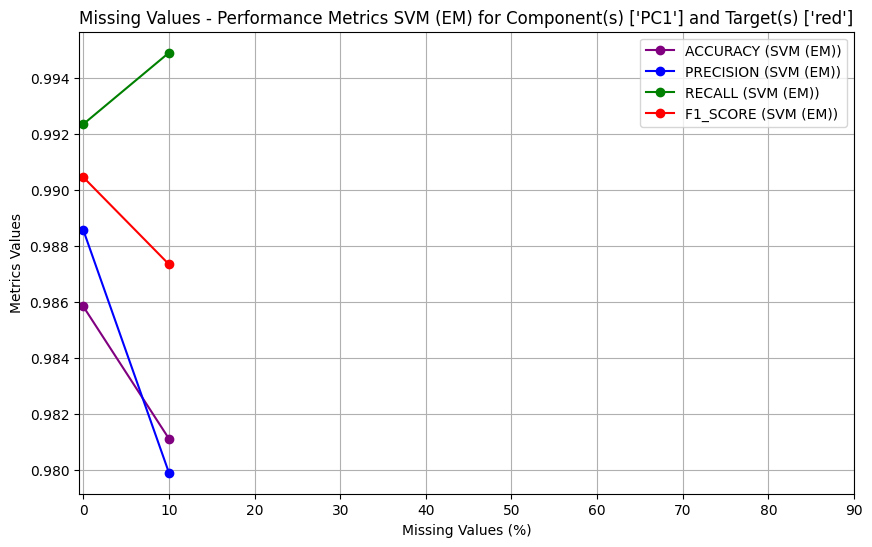

DEBUG: feature=['PC1'], wine_types=['white']
⚠️ Nessun risultato trovato.


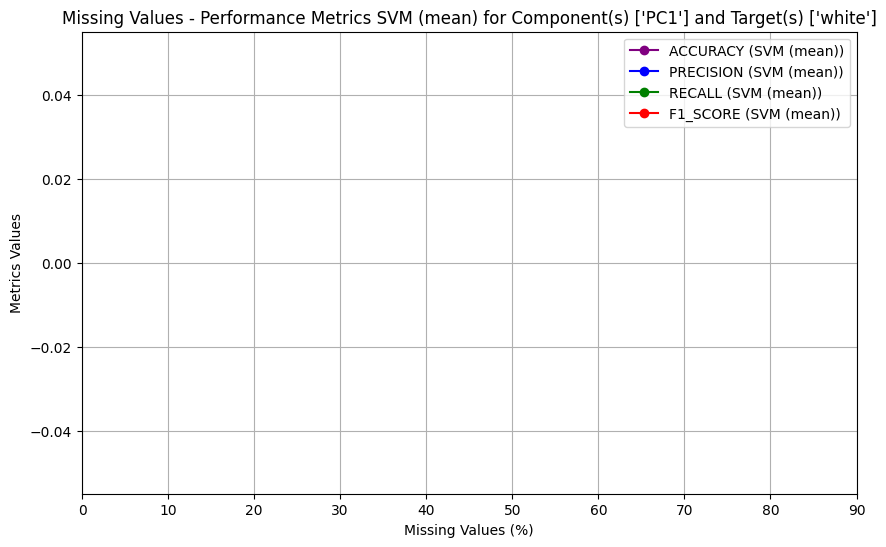

DEBUG: feature=['PC1'], wine_types=['white']
⚠️ Nessun risultato trovato.


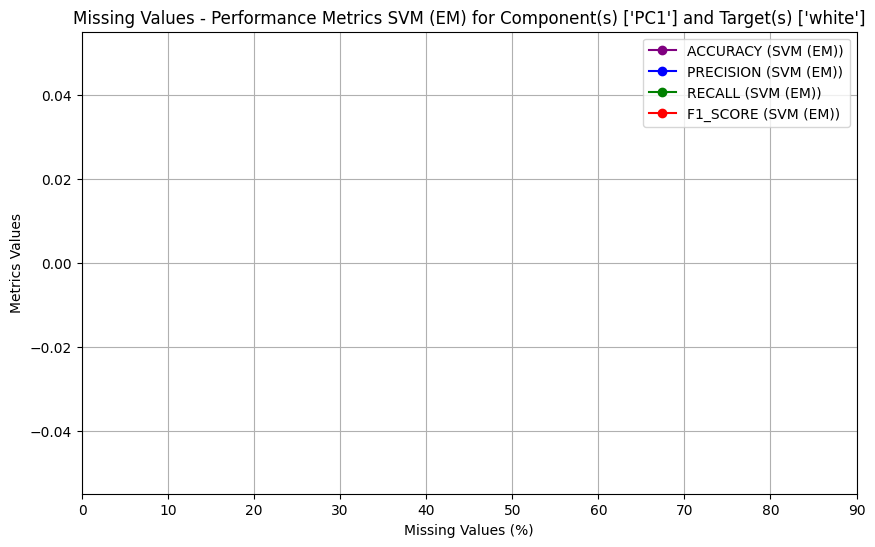

DEBUG: feature=['PC1'], wine_types=['red', 'white']
⚠️ Nessun risultato trovato.


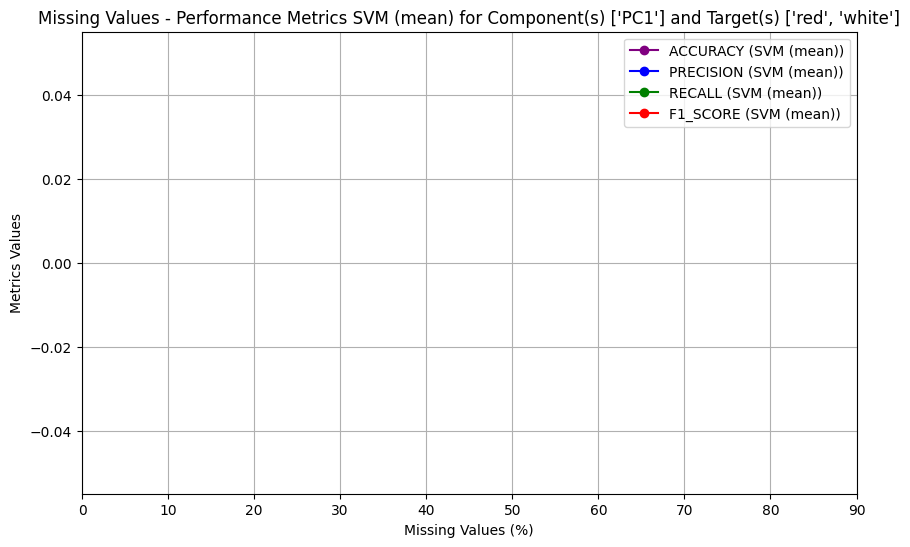

DEBUG: feature=['PC1'], wine_types=['red', 'white']
⚠️ Nessun risultato trovato.


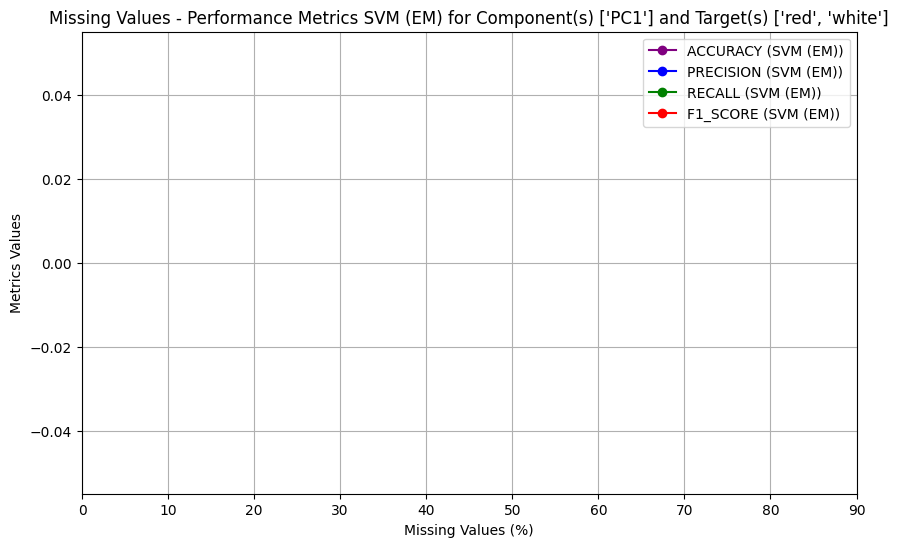

DEBUG: feature=['PC2'], wine_types=['red']


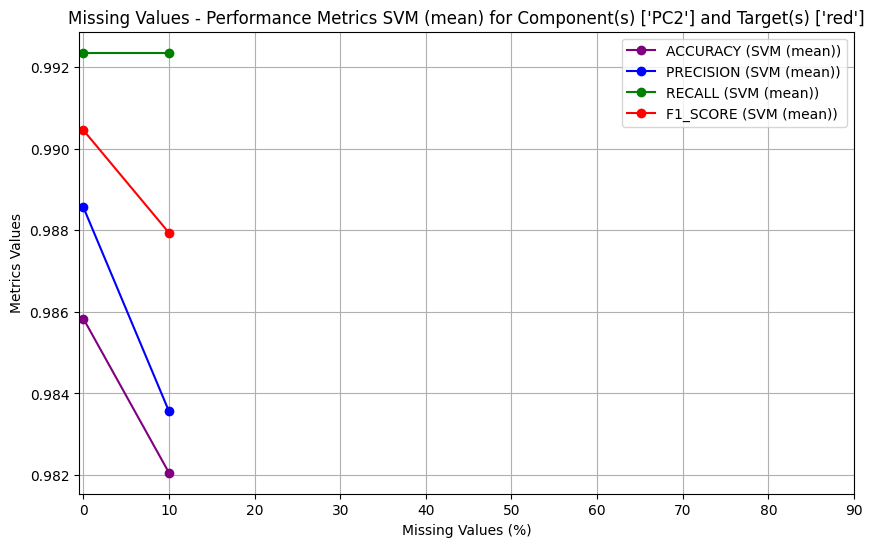

DEBUG: feature=['PC2'], wine_types=['red']


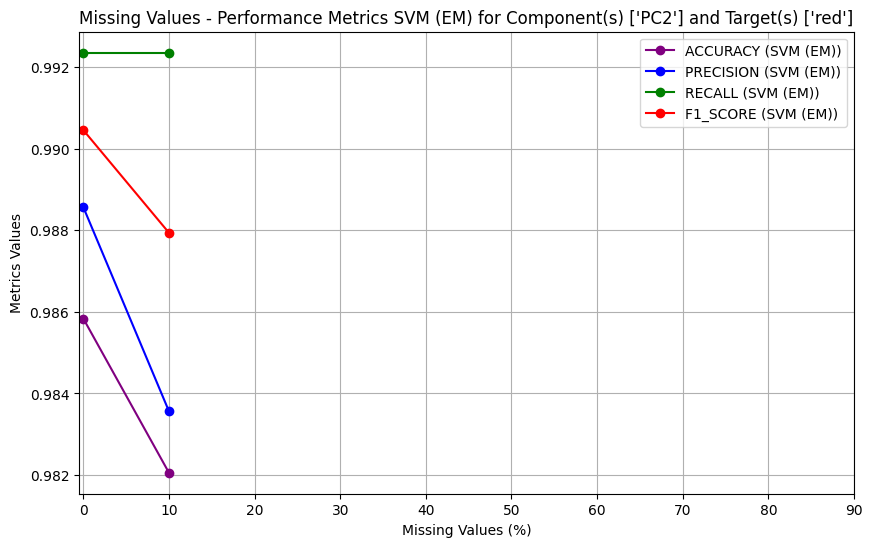

DEBUG: feature=['PC2'], wine_types=['white']
⚠️ Nessun risultato trovato.


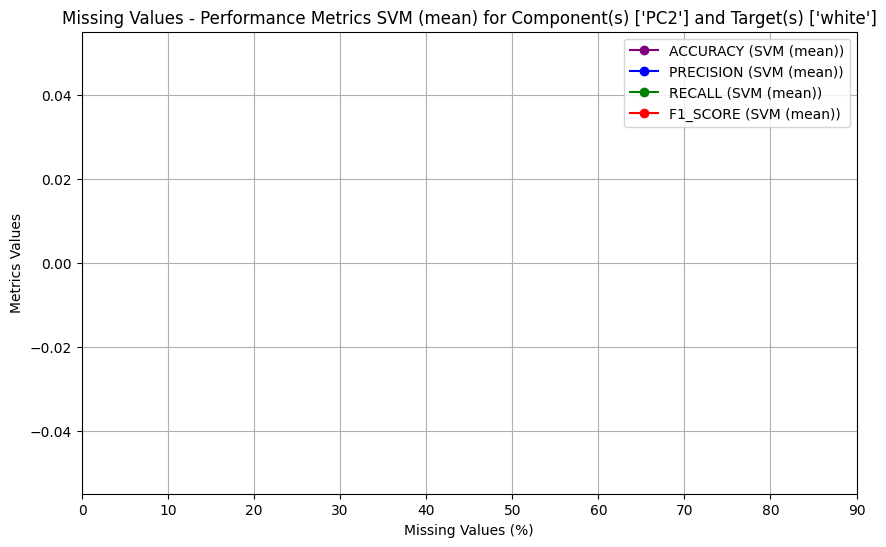

DEBUG: feature=['PC2'], wine_types=['white']
⚠️ Nessun risultato trovato.


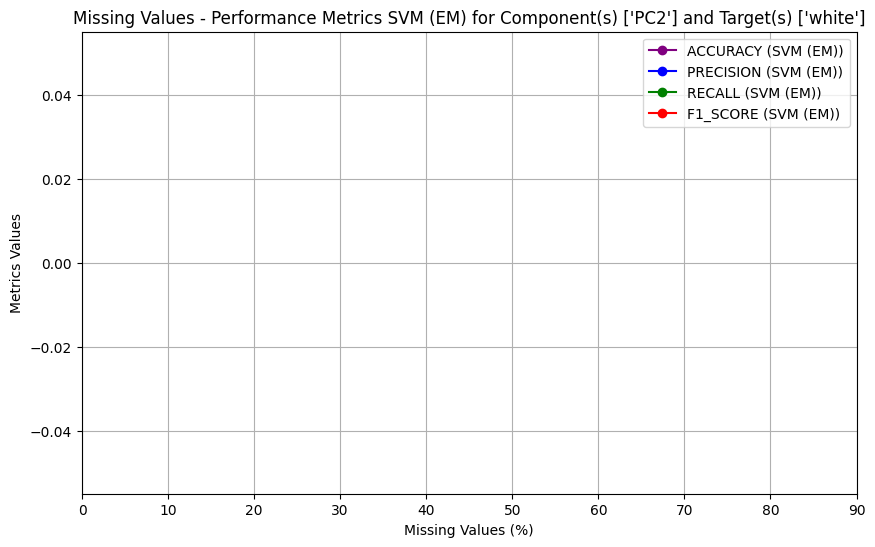

DEBUG: feature=['PC2'], wine_types=['red', 'white']
⚠️ Nessun risultato trovato.


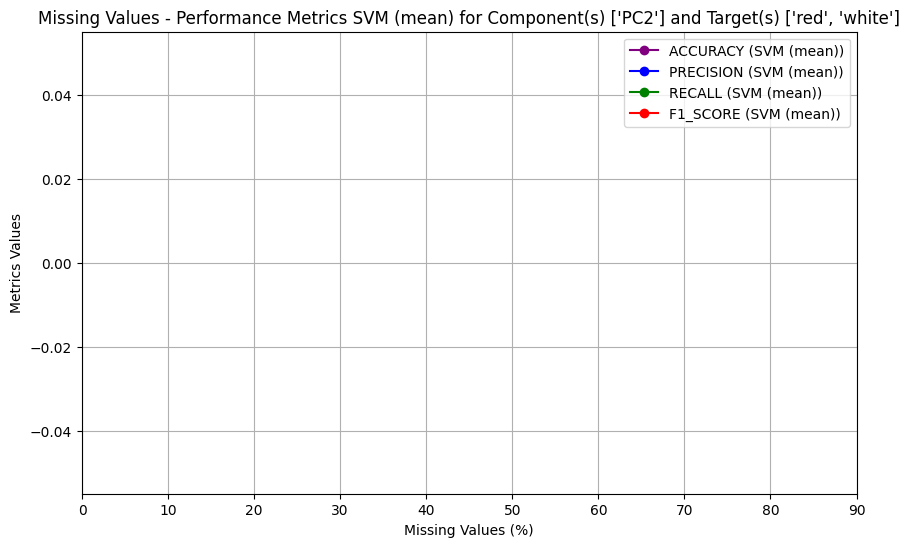

DEBUG: feature=['PC2'], wine_types=['red', 'white']
⚠️ Nessun risultato trovato.


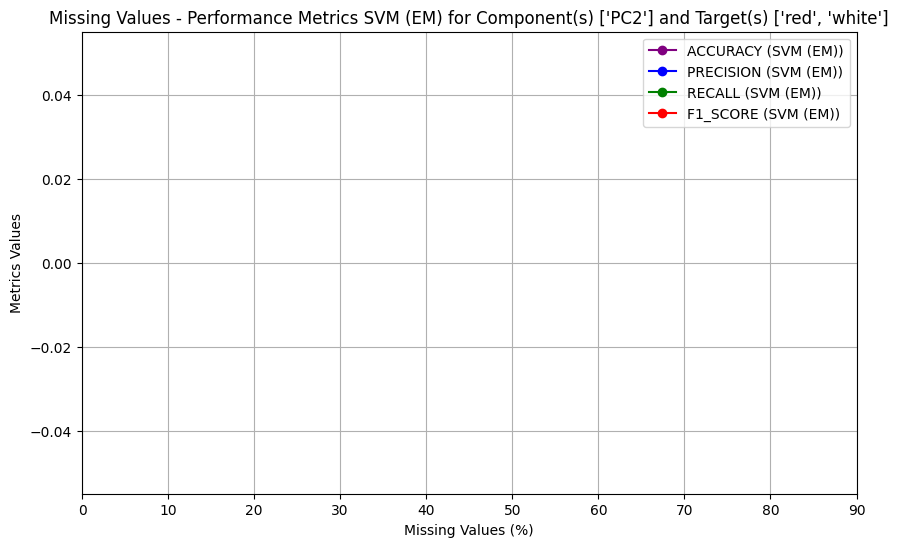

DEBUG: feature=['PC1', 'PC2'], wine_types=['red']
⚠️ Nessun risultato trovato.


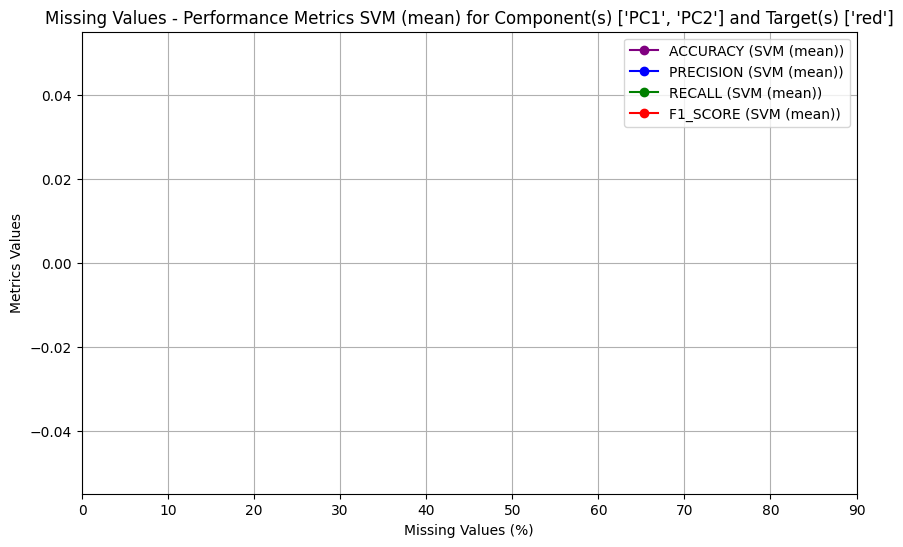

DEBUG: feature=['PC1', 'PC2'], wine_types=['red']
⚠️ Nessun risultato trovato.


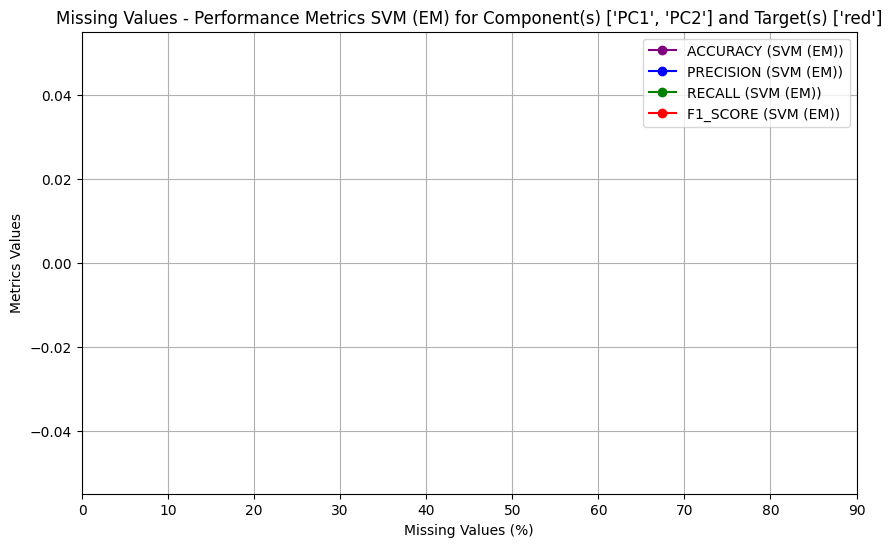

DEBUG: feature=['PC1', 'PC2'], wine_types=['white']
⚠️ Nessun risultato trovato.


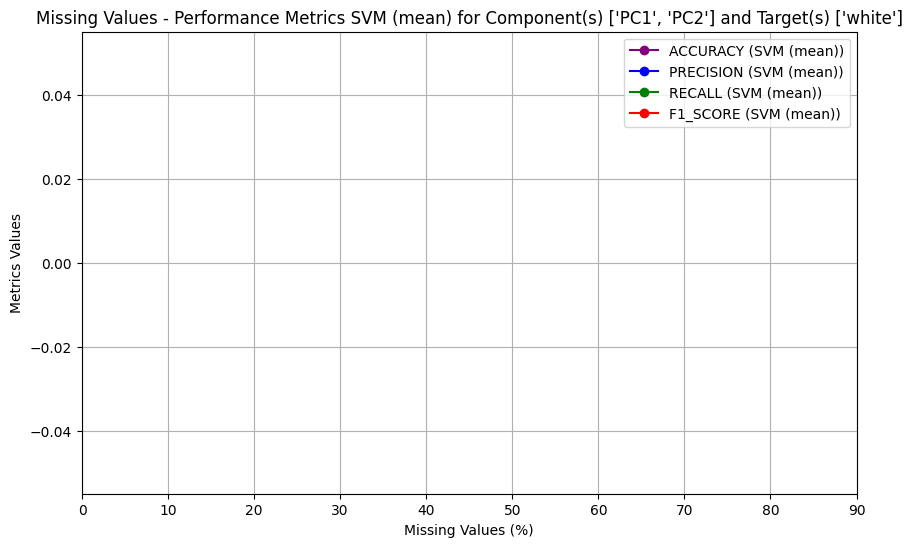

DEBUG: feature=['PC1', 'PC2'], wine_types=['white']
⚠️ Nessun risultato trovato.


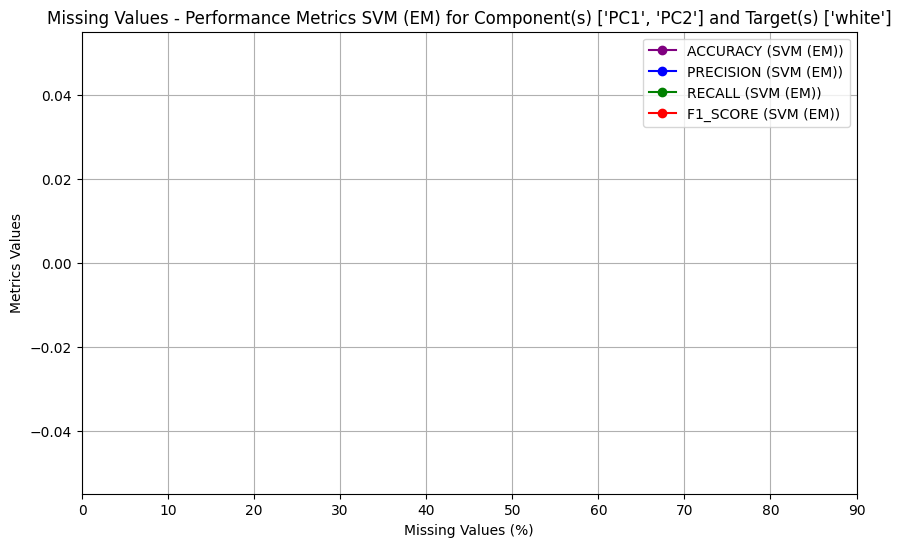

DEBUG: feature=['PC1', 'PC2'], wine_types=['red', 'white']
⚠️ Nessun risultato trovato.


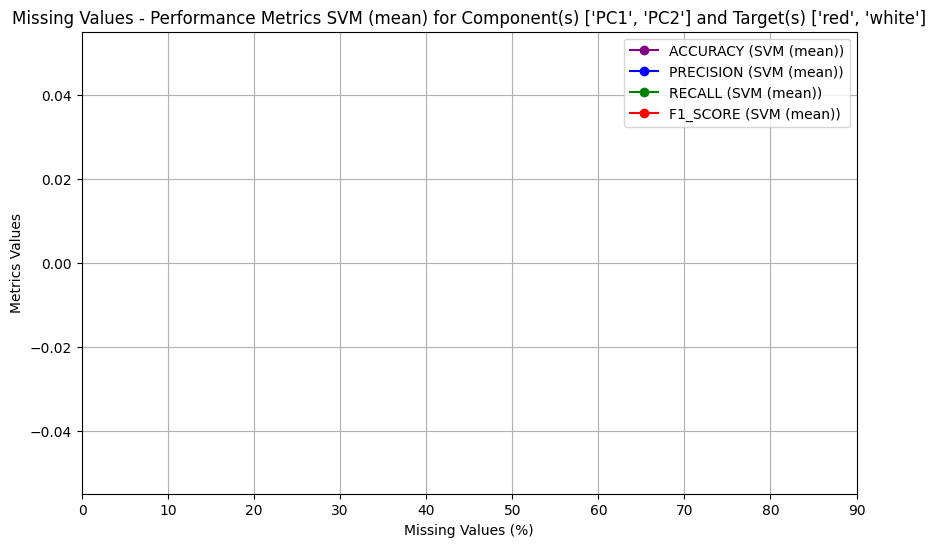

DEBUG: feature=['PC1', 'PC2'], wine_types=['red', 'white']
⚠️ Nessun risultato trovato.


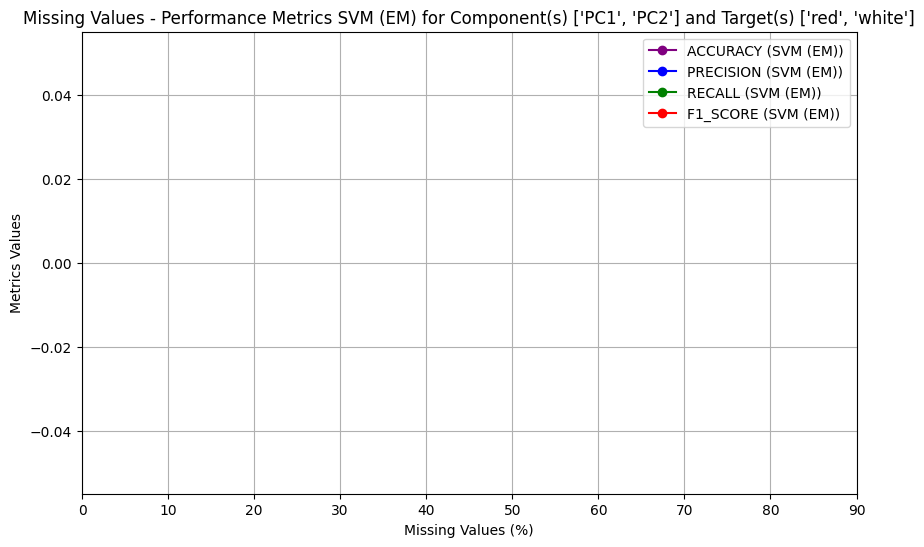

DEBUG: feature=['PC3', 'PC4', 'PC5'], wine_types=['red']
⚠️ Nessun risultato trovato.


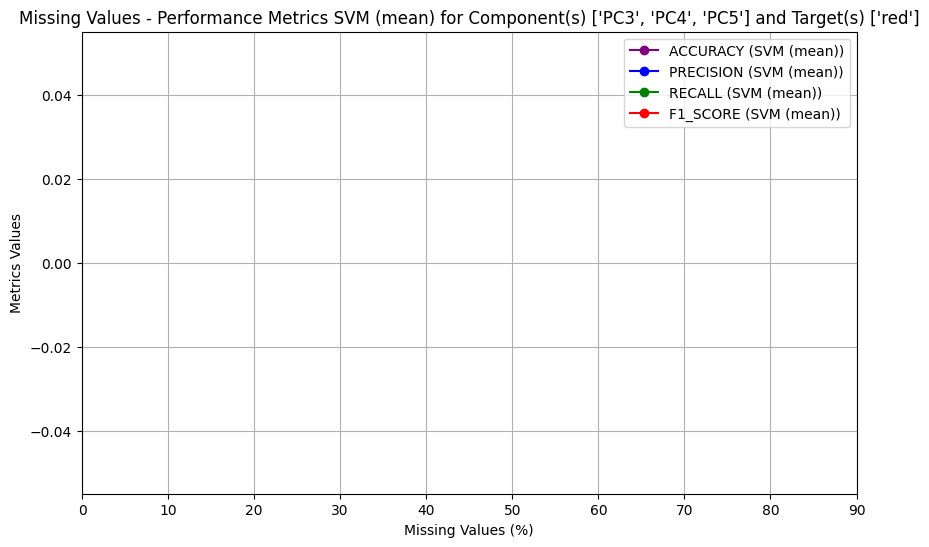

DEBUG: feature=['PC3', 'PC4', 'PC5'], wine_types=['red']
⚠️ Nessun risultato trovato.


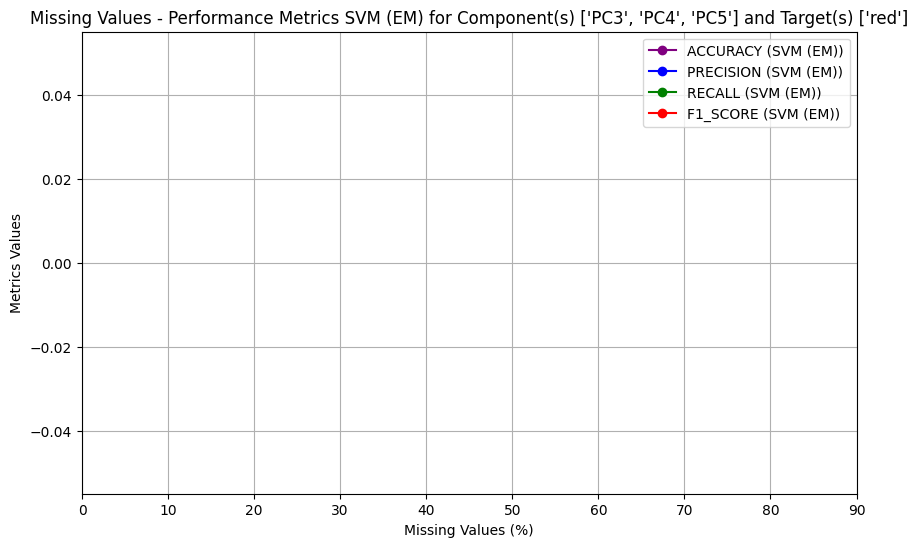

DEBUG: feature=['PC3', 'PC4', 'PC5'], wine_types=['white']
⚠️ Nessun risultato trovato.


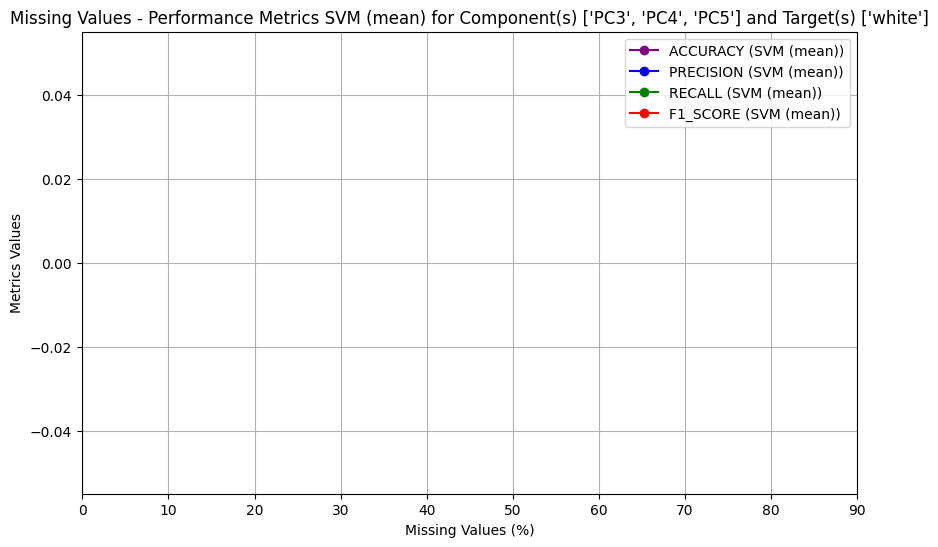

DEBUG: feature=['PC3', 'PC4', 'PC5'], wine_types=['white']
⚠️ Nessun risultato trovato.


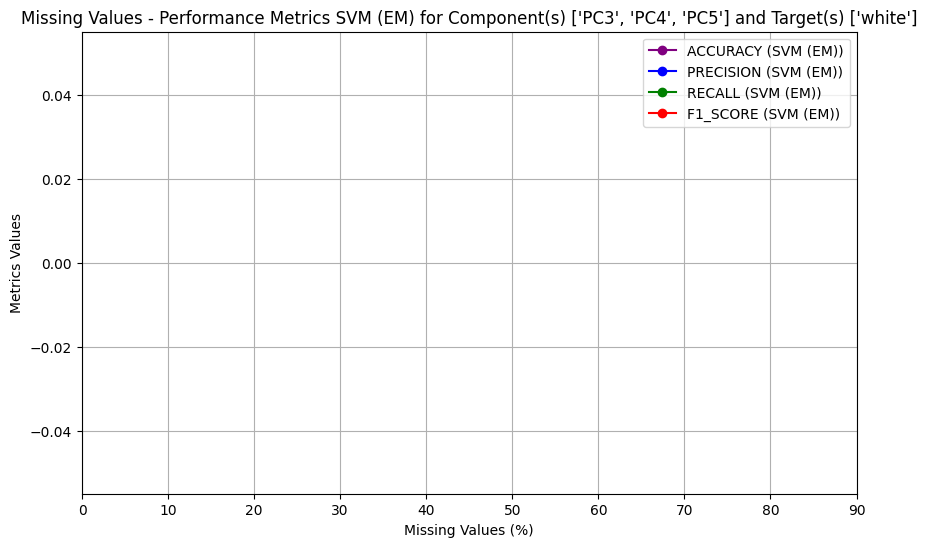

DEBUG: feature=['PC3', 'PC4', 'PC5'], wine_types=['red', 'white']
⚠️ Nessun risultato trovato.


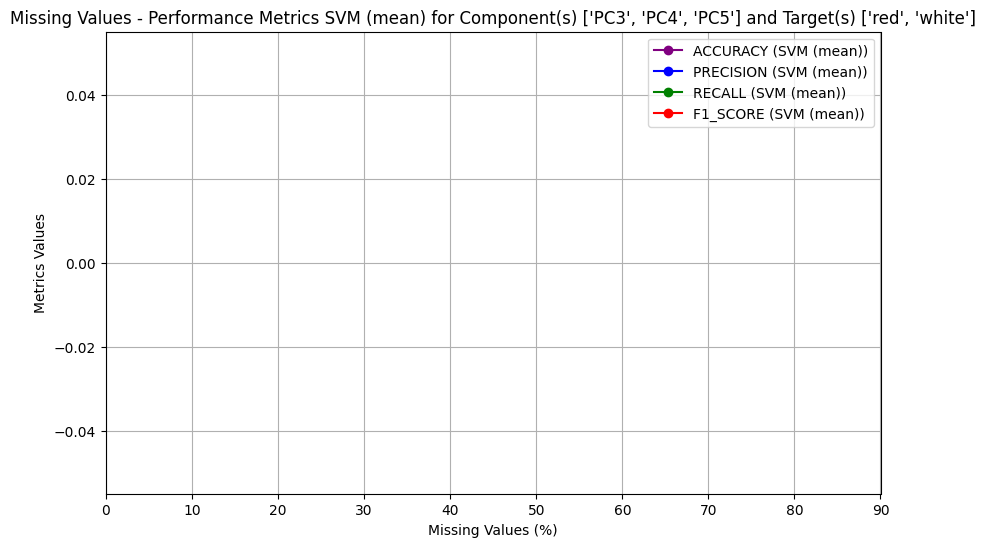

DEBUG: feature=['PC3', 'PC4', 'PC5'], wine_types=['red', 'white']
⚠️ Nessun risultato trovato.


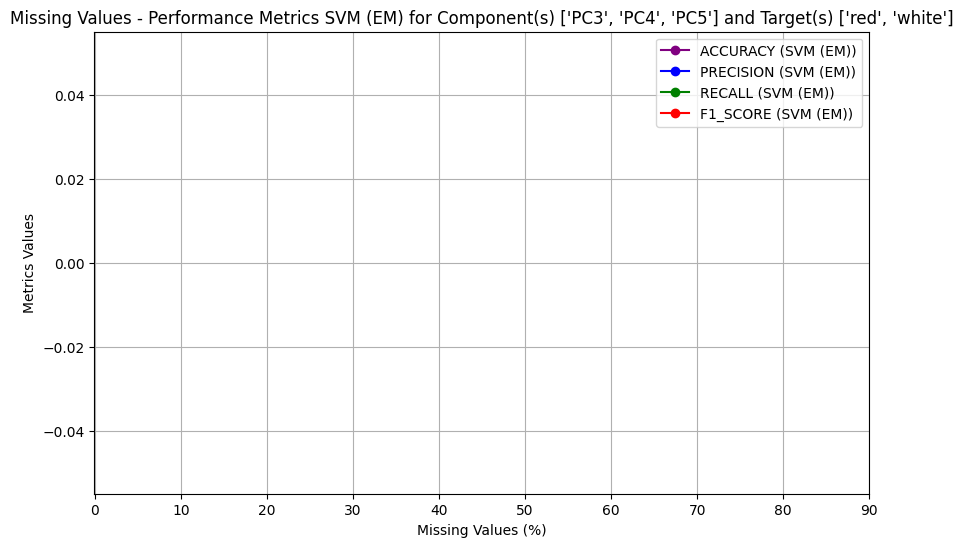

In [89]:
# Plot everything about SVM
for feature in features_to_consider_list:
    for wine_types in wine_types_to_consider_list:
        for svm_type in ["SVM (mean)", "SVM (EM)"]:
            plot_missing_values_graph(svm_type, feature, wine_types)

#### Decision Tree

DEBUG: feature=['PC1'], wine_types=['red']


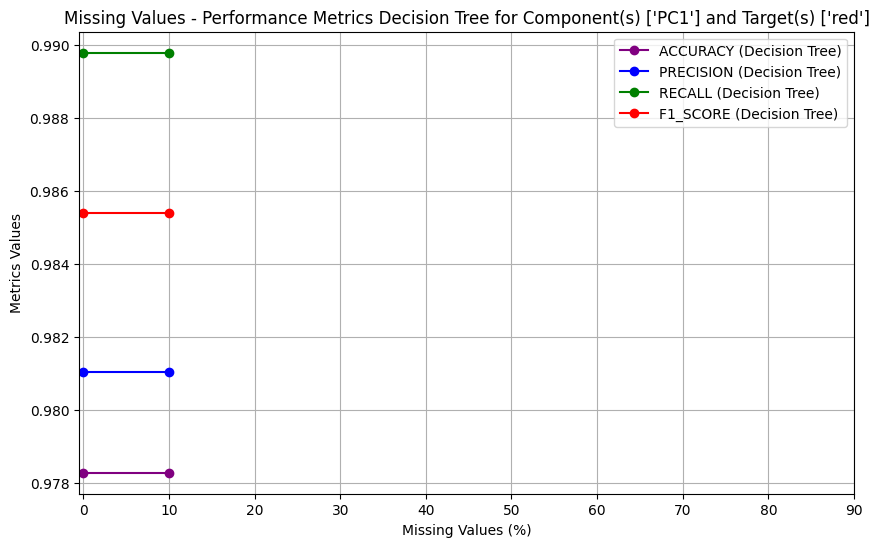

DEBUG: feature=['PC1'], wine_types=['white']
⚠️ Nessun risultato trovato.


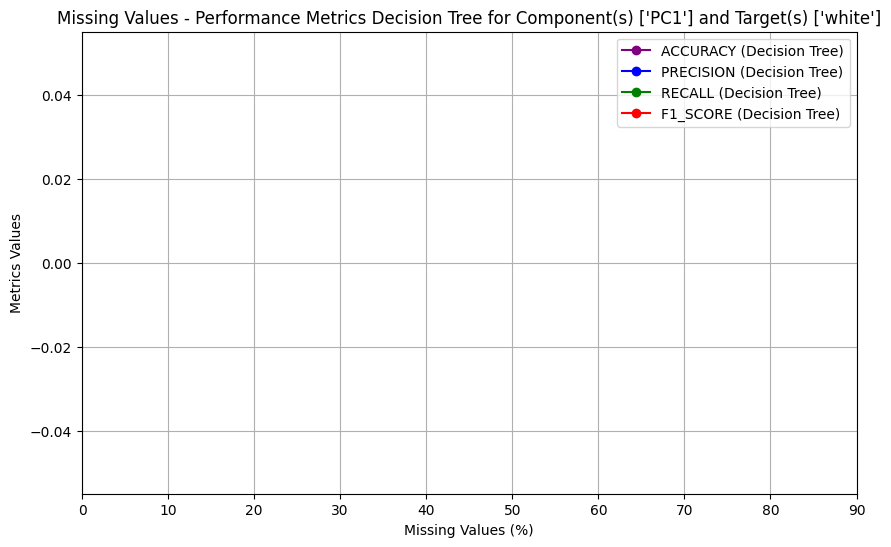

DEBUG: feature=['PC1'], wine_types=['red', 'white']
⚠️ Nessun risultato trovato.


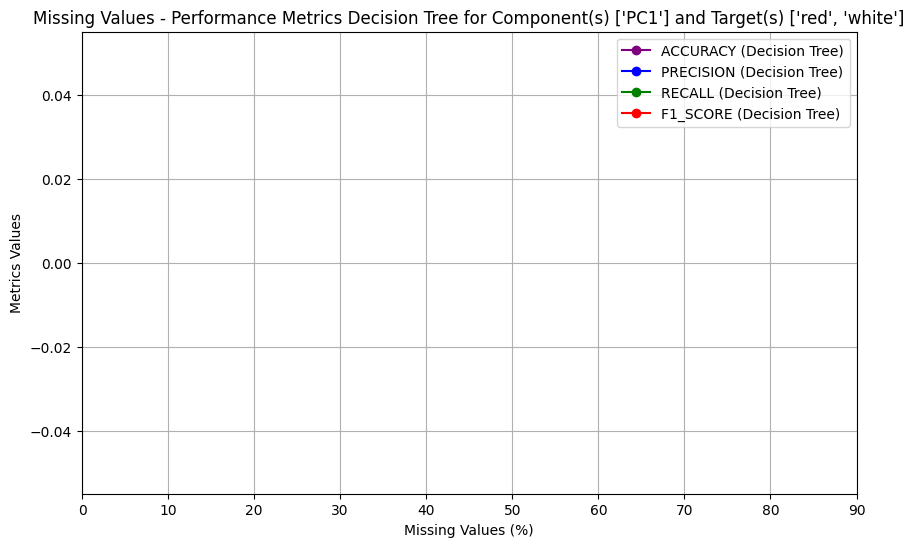

DEBUG: feature=['PC2'], wine_types=['red']


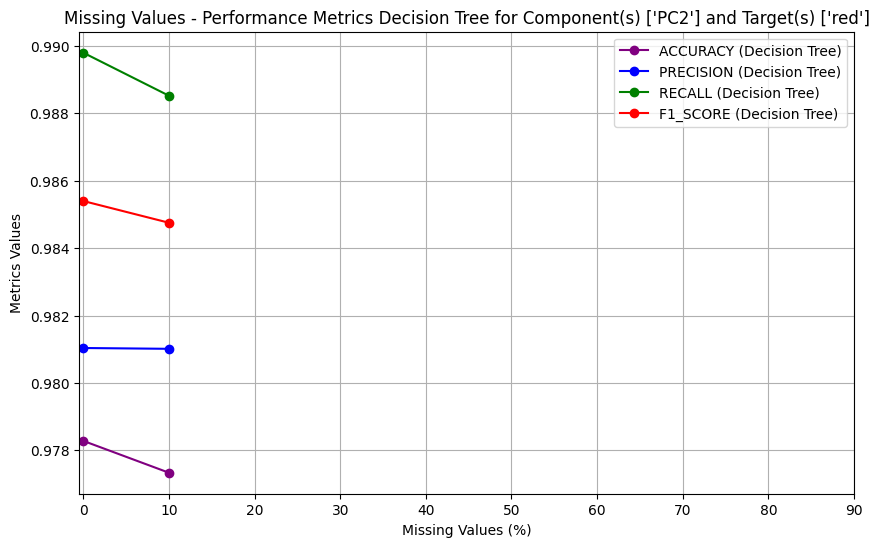

DEBUG: feature=['PC2'], wine_types=['white']
⚠️ Nessun risultato trovato.


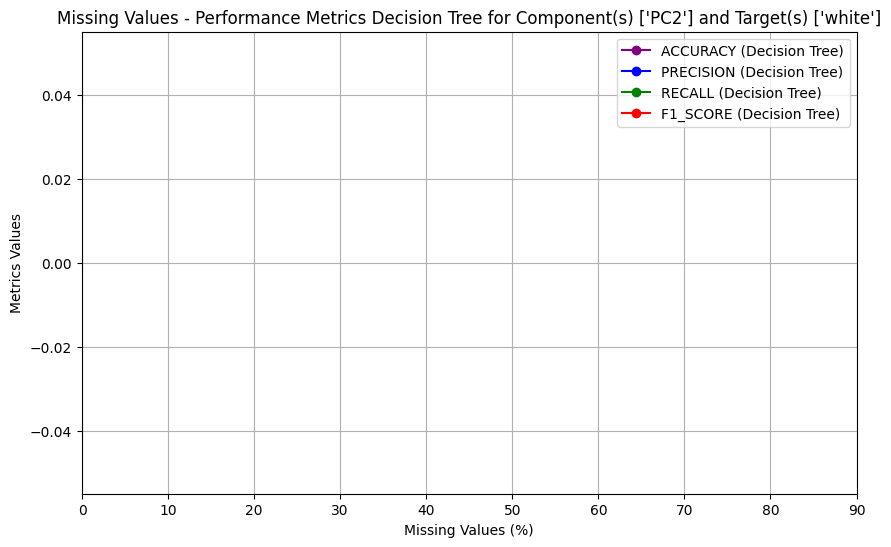

DEBUG: feature=['PC2'], wine_types=['red', 'white']
⚠️ Nessun risultato trovato.


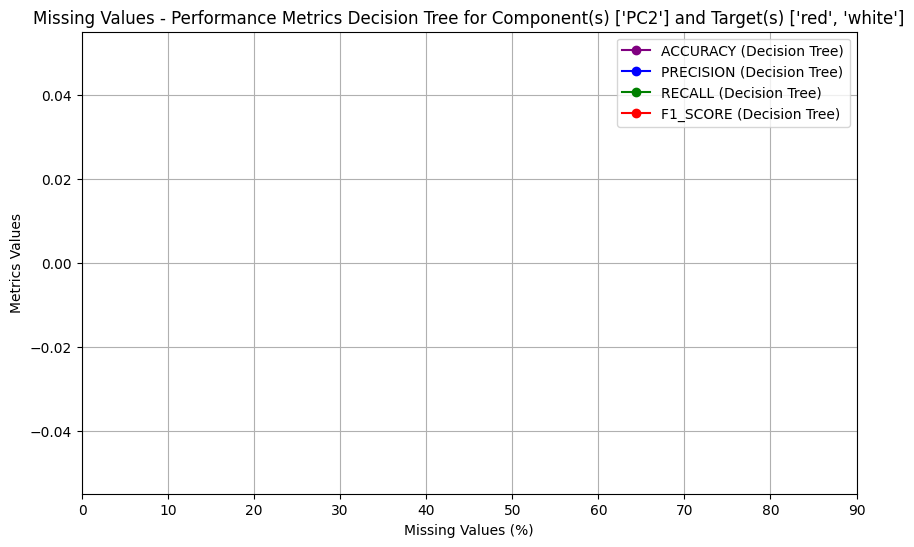

DEBUG: feature=['PC1', 'PC2'], wine_types=['red']
⚠️ Nessun risultato trovato.


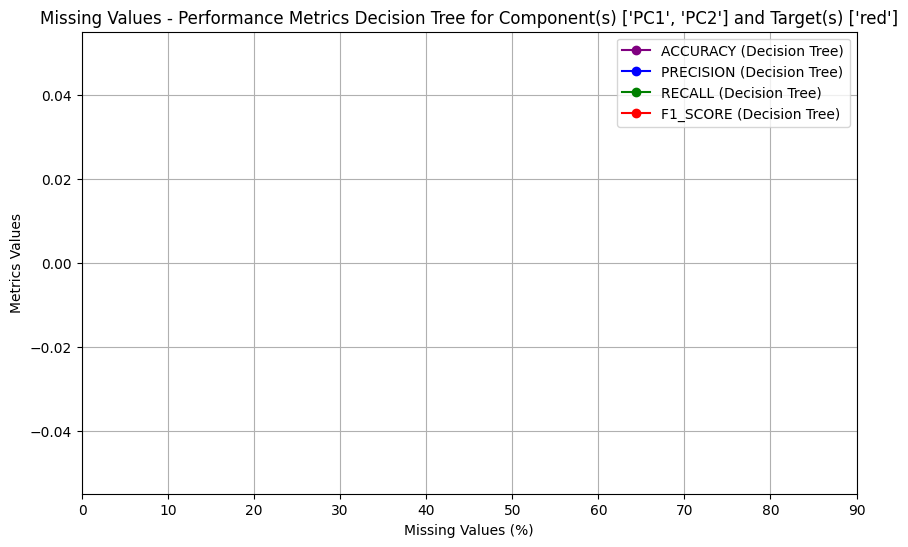

DEBUG: feature=['PC1', 'PC2'], wine_types=['white']
⚠️ Nessun risultato trovato.


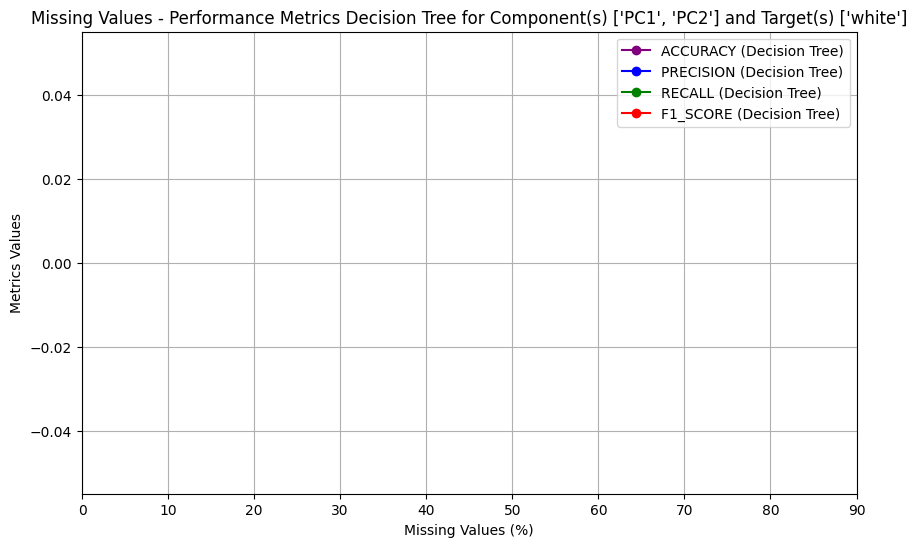

DEBUG: feature=['PC1', 'PC2'], wine_types=['red', 'white']
⚠️ Nessun risultato trovato.


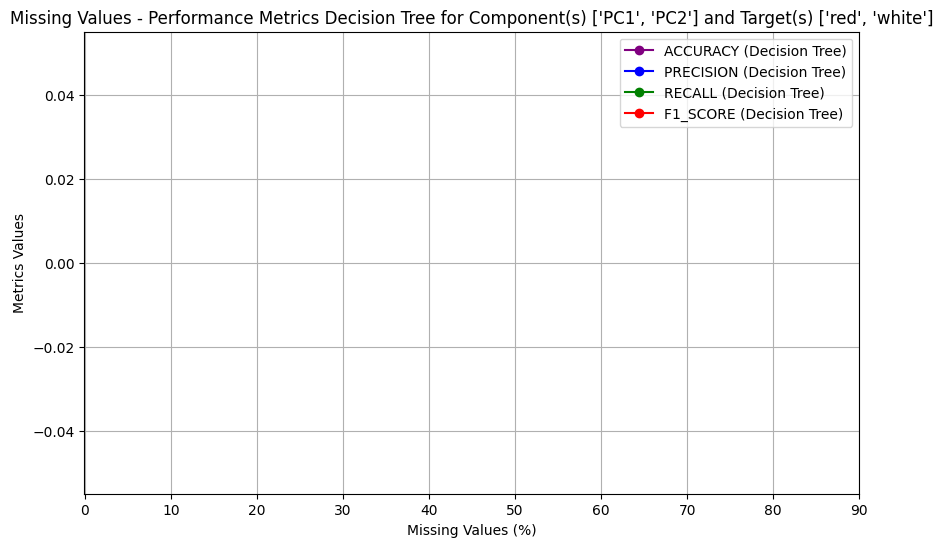

DEBUG: feature=['PC3', 'PC4', 'PC5'], wine_types=['red']
⚠️ Nessun risultato trovato.


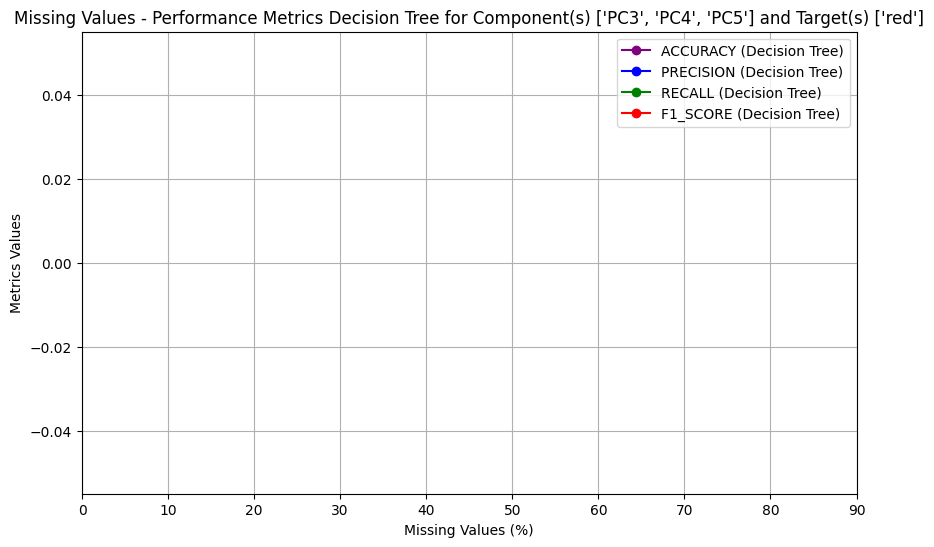

DEBUG: feature=['PC3', 'PC4', 'PC5'], wine_types=['white']
⚠️ Nessun risultato trovato.


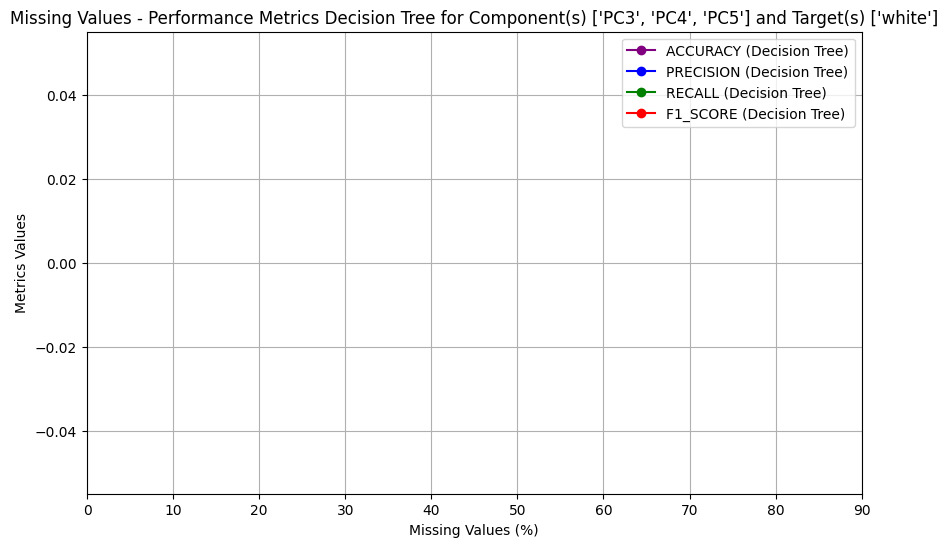

DEBUG: feature=['PC3', 'PC4', 'PC5'], wine_types=['red', 'white']
⚠️ Nessun risultato trovato.


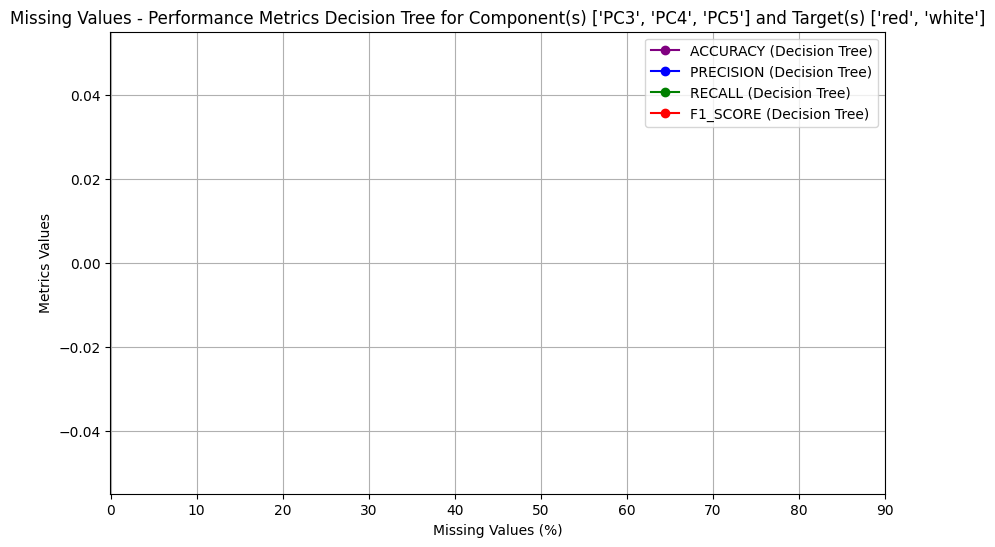

In [90]:
# Plot everything about Decision Tree
for feature in features_to_consider_list:
    for wine_types in wine_types_to_consider_list:
        plot_missing_values_graph("Decision Tree", feature, wine_types)

### Outliers 

In [91]:
# Range for Outliers Experiments
start_index = 114 
end_index = 353   
outliers = get_experiment_parameters('../experiments_pipeline/experiments_config.json', start_index, end_index)
# Print the data to verify if it's correct
print(json.dumps(outliers, indent=4))

Index 114 is out of range
Index 115 is out of range
Index 116 is out of range
Index 117 is out of range
Index 118 is out of range
Index 119 is out of range
Index 120 is out of range
Index 121 is out of range
Index 122 is out of range
Index 123 is out of range
Index 124 is out of range
Index 125 is out of range
Index 126 is out of range
Index 127 is out of range
Index 128 is out of range
Index 129 is out of range
Index 130 is out of range
Index 131 is out of range
Index 132 is out of range
Index 133 is out of range
Index 134 is out of range
Index 135 is out of range
Index 136 is out of range
Index 137 is out of range
Index 138 is out of range
Index 139 is out of range
Index 140 is out of range
Index 141 is out of range
Index 142 is out of range
Index 143 is out of range
Index 144 is out of range
Index 145 is out of range
Index 146 is out of range
Index 147 is out of range
Index 148 is out of range
Index 149 is out of range
Index 150 is out of range
Index 151 is out of range
Index 152 is

In [96]:
def get_results_outliers(features_to_consider, wine_types_to_consider_outliers, range_type):
    # Normalizza gli input se sono liste
    features = features_to_consider[0] if isinstance(features_to_consider, list) else features_to_consider
    wine_types = wine_types_to_consider_outliers[0] if isinstance(wine_types_to_consider_outliers, list) else wine_types_to_consider_outliers
    rtype = range_type[0] if isinstance(range_type, list) else range_type

    # Filtro
    results = [
        (
            int(experiment["experiment-name"][12:]),
            experiment["outliers-percentage"],
            experiment["wine-types-to-consider-outliers"],
            experiment["range-type"]
        )
        for experiment in outliers
        if experiment["features-to-dirty-outliers"] == features and
           experiment["wine-types-to-consider-outliers"] == wine_types and
           experiment["range-type"] == rtype
    ]

    # Inserisci il "fake experiment" solo se possibile
    if len(results) >= 2:
        results.insert(0, (0, 0.0, results[1][2], results[1][3]))
    elif len(results) == 1:
        results.insert(0, (0, 0.0, results[0][2], results[0][3]))
    else:
        print(f"⚠️ Nessun risultato trovato per: features={features}, wine_types={wine_types}, range_type={rtype}")
        return []

    return results

In [97]:
# Function to plot
def plot_outliers_graph(model_name_to_consider, features_to_consider, wine_types_to_consider_outliers, range_type):
    # Get the results object
    results = get_results_outliers(features_to_consider, wine_types_to_consider_outliers, range_type)

    # Make the graph
    plt.figure(figsize=(10, 6))

    for metric, color in metrics.items():
        # Initialize lists to collect x and y values
        x_values = []
        y_values = []

        for experiment_id, percentage, _, _ in results:
            # Select the correct experiment in the df of metrics
            data = df[(df['experiment_id'] == experiment_id) & (df['model_name'] == model_name_to_consider)]

            if data.empty:
                # Experiment 0
                assert experiment_id == 0, "Something went wrong, expected experiment 0"
            
                # Get the data properly
                data = df[(df['experiment_id'] == experiment_id) & (df['model_name'] == model_name_to_consider)]
                if data.empty:
                    assert False, "This was unexpected"

            # Get the metrics
            metric_value = data[metric].values[0]
            # Collect the data points
            x_values.append(percentage * 100)
            y_values.append(metric_value)
        # Plot all collected points and lines for the current metric
        plt.plot(x_values, y_values, marker='o', linestyle='-', color=color, label=f"{metric.upper()} ({model_name_to_consider})")
       
    plt.xlabel('Outliers (%)')
    plt.ylabel('Metrics Values')
    plt.title(f'Outliers - Performance Metrics {model_name_to_consider} for Component(s) {features_to_consider}, Target(s) {wine_types_to_consider_outliers} and Range Type(s) {range_type}')
    plt.legend(loc='best')
    plt.grid(True)
    plt.xticks([10 * i for i in range(0, 11)])
    plt.show()

#### SVM

⚠️ Nessun risultato trovato per: features=PC1, wine_types=red, range_type=std


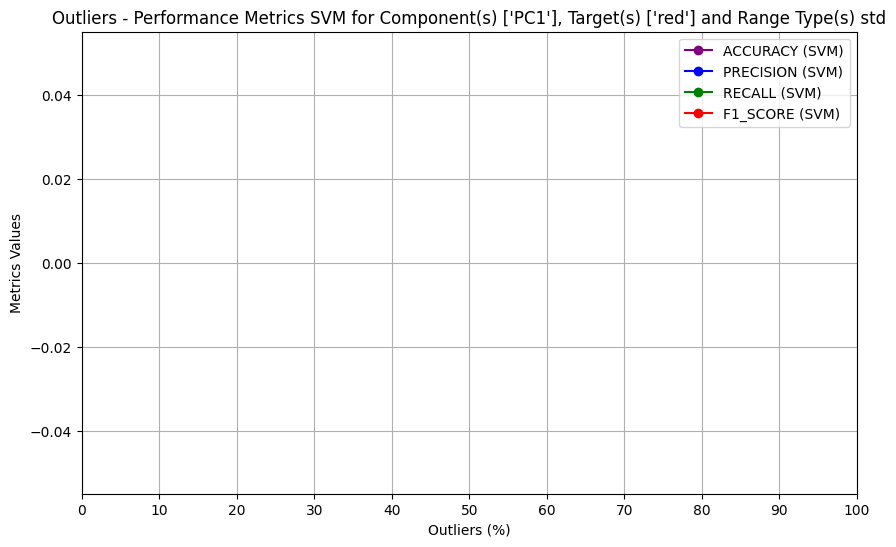

⚠️ Nessun risultato trovato per: features=PC1, wine_types=red, range_type=iqr


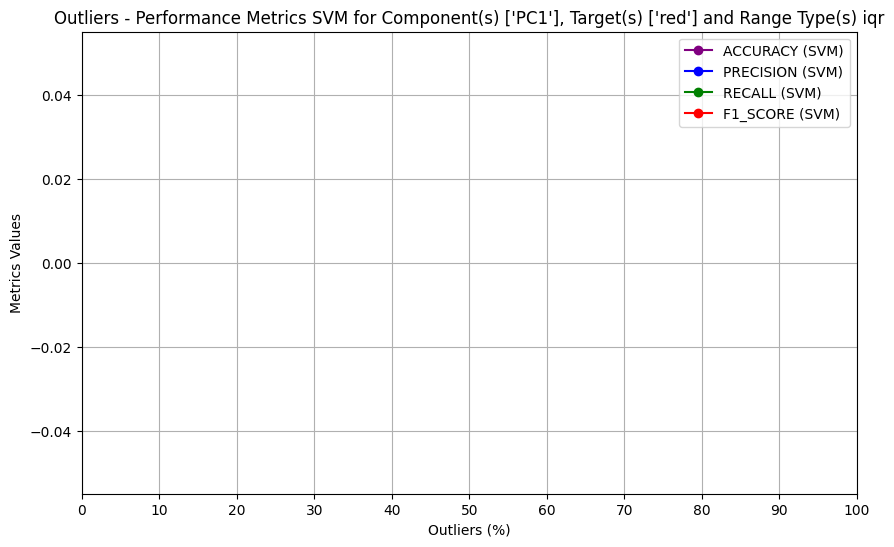

⚠️ Nessun risultato trovato per: features=PC1, wine_types=white, range_type=std


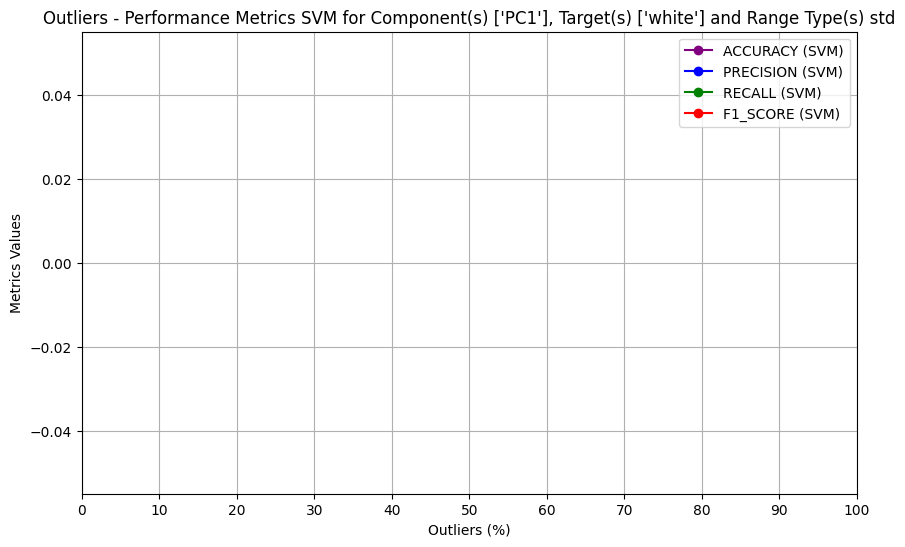

⚠️ Nessun risultato trovato per: features=PC1, wine_types=white, range_type=iqr


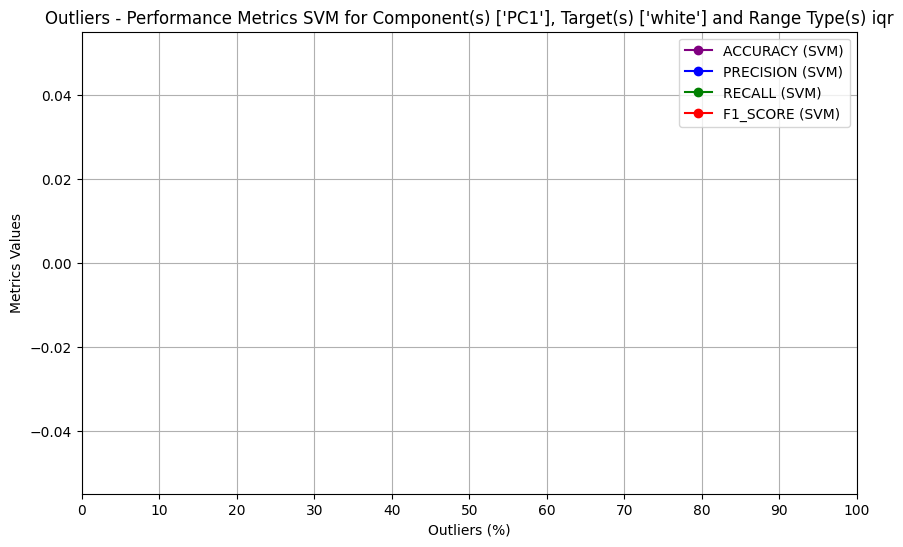

⚠️ Nessun risultato trovato per: features=PC1, wine_types=red, range_type=std


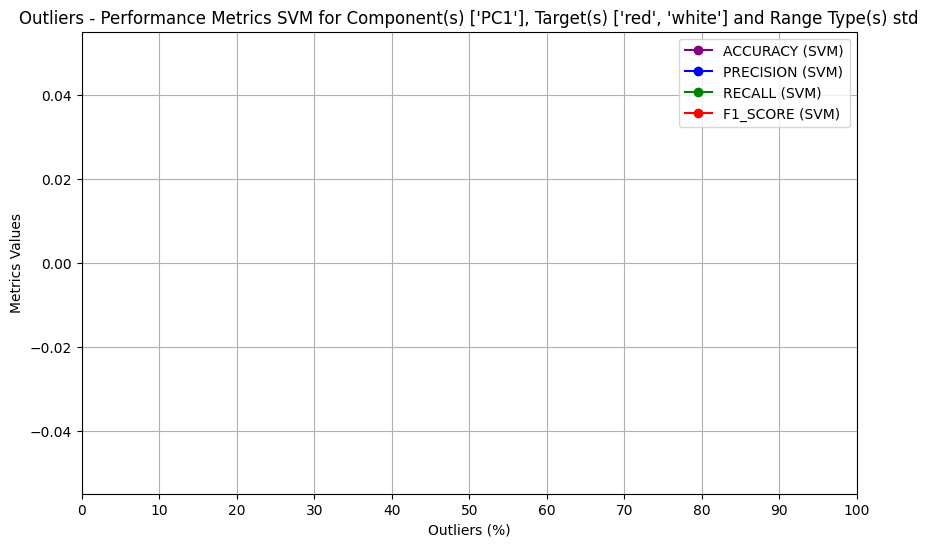

⚠️ Nessun risultato trovato per: features=PC1, wine_types=red, range_type=iqr


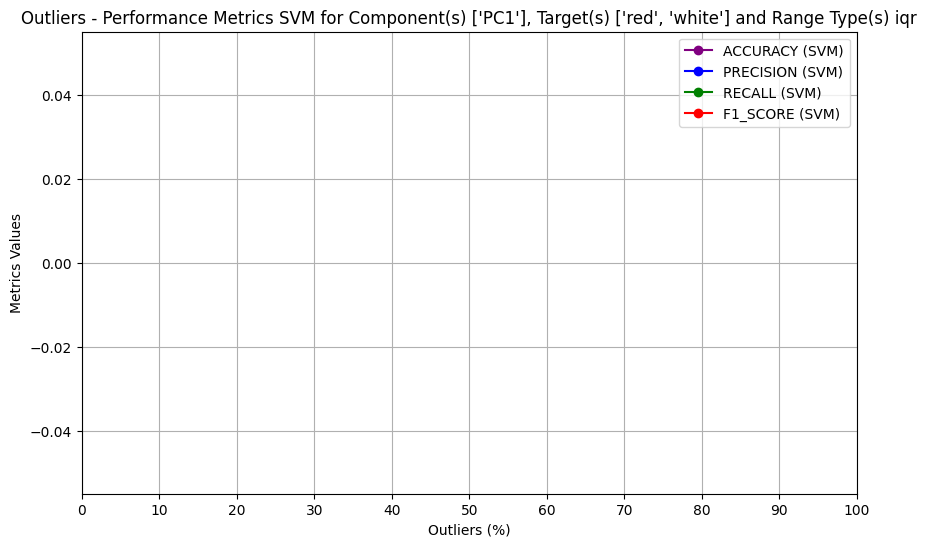

⚠️ Nessun risultato trovato per: features=PC2, wine_types=red, range_type=std


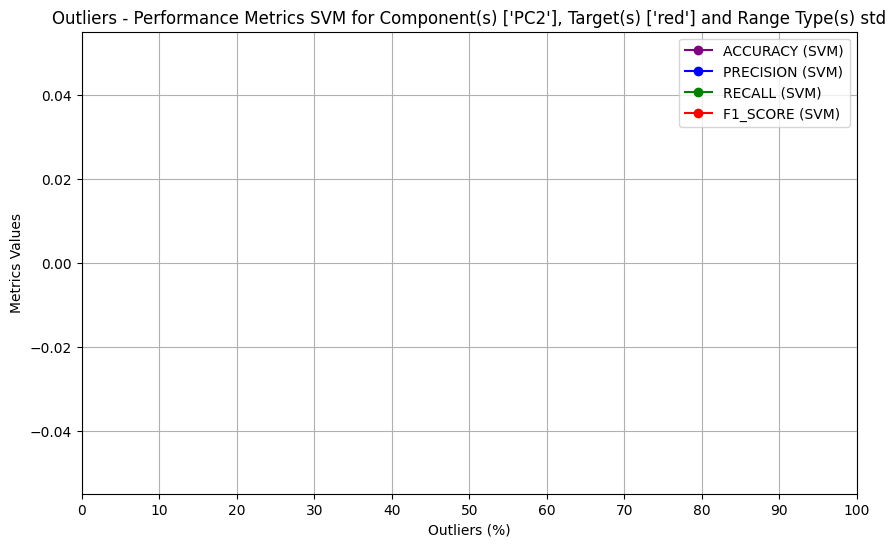

⚠️ Nessun risultato trovato per: features=PC2, wine_types=red, range_type=iqr


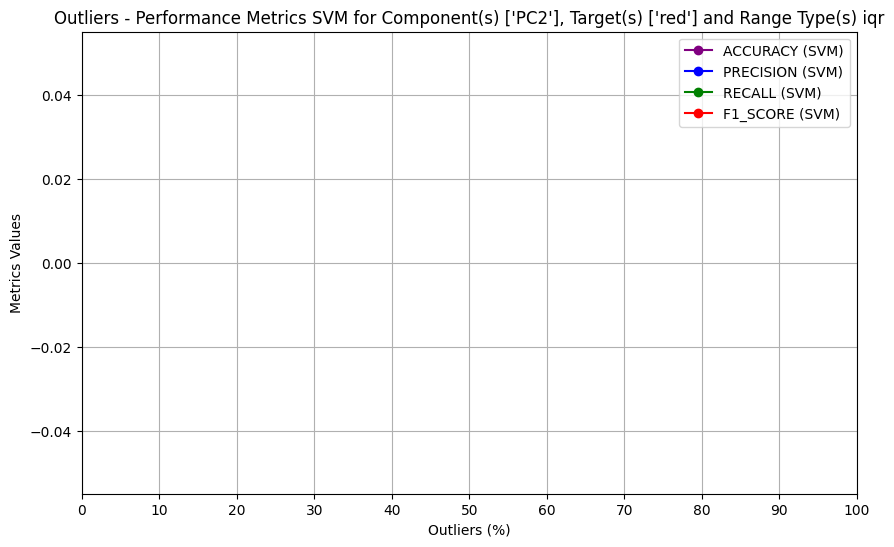

⚠️ Nessun risultato trovato per: features=PC2, wine_types=white, range_type=std


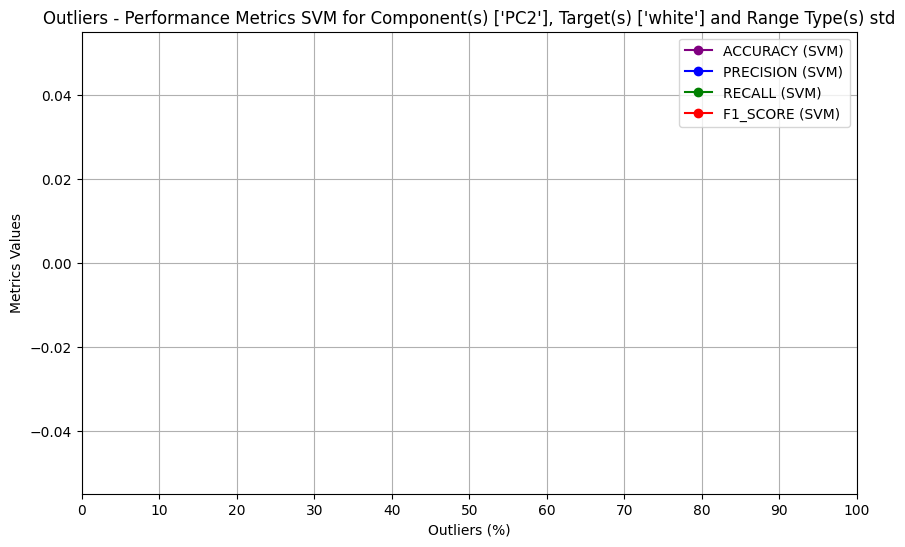

⚠️ Nessun risultato trovato per: features=PC2, wine_types=white, range_type=iqr


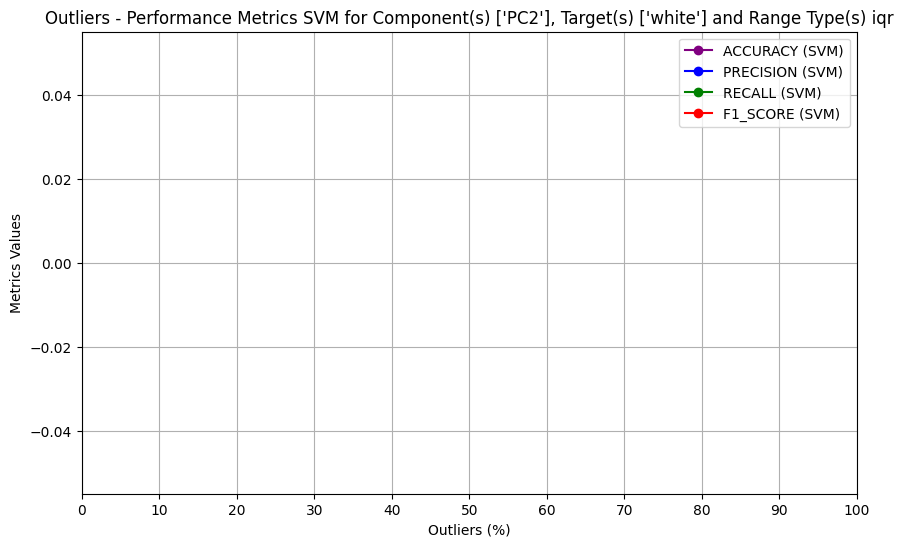

⚠️ Nessun risultato trovato per: features=PC2, wine_types=red, range_type=std


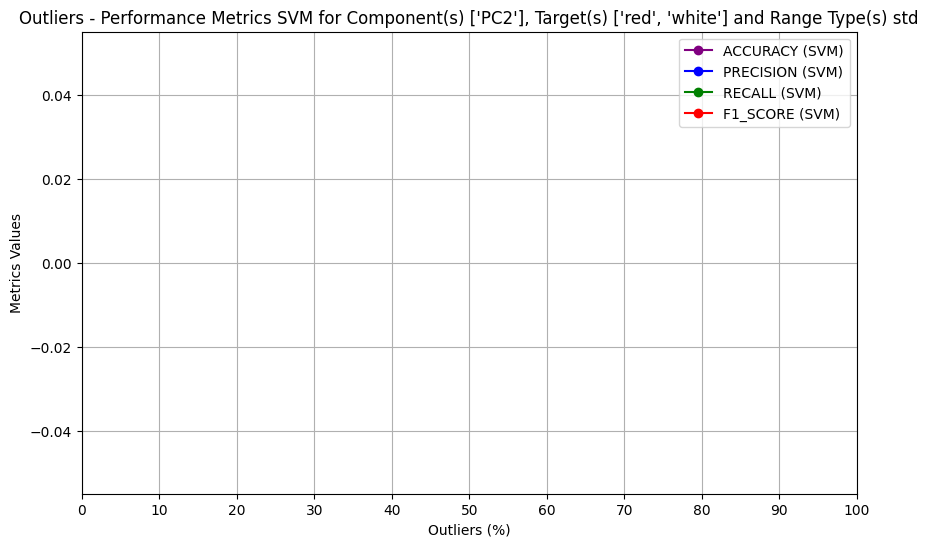

⚠️ Nessun risultato trovato per: features=PC2, wine_types=red, range_type=iqr


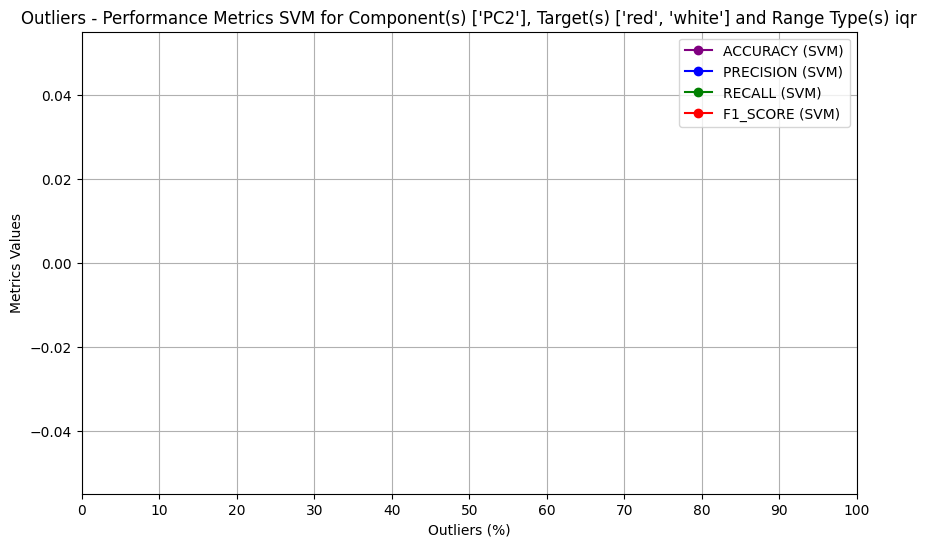

⚠️ Nessun risultato trovato per: features=PC1, wine_types=red, range_type=std


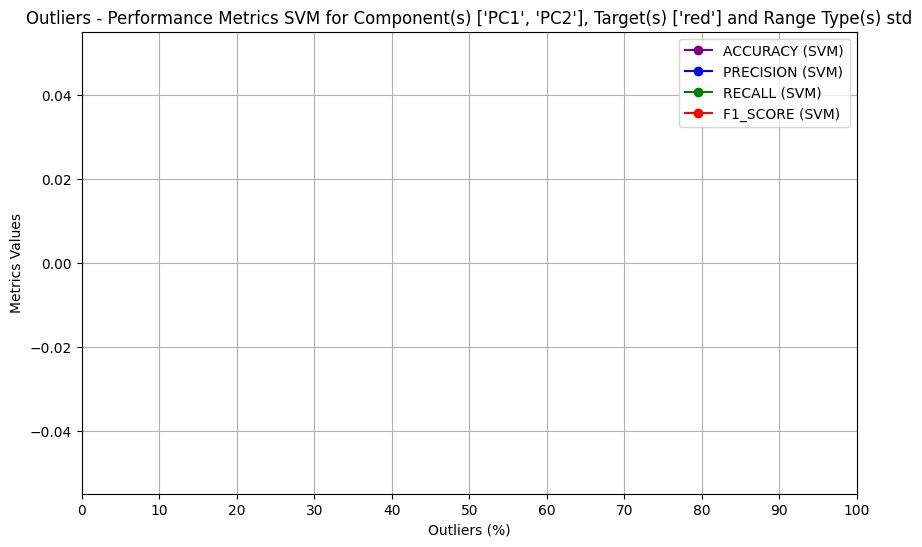

⚠️ Nessun risultato trovato per: features=PC1, wine_types=red, range_type=iqr


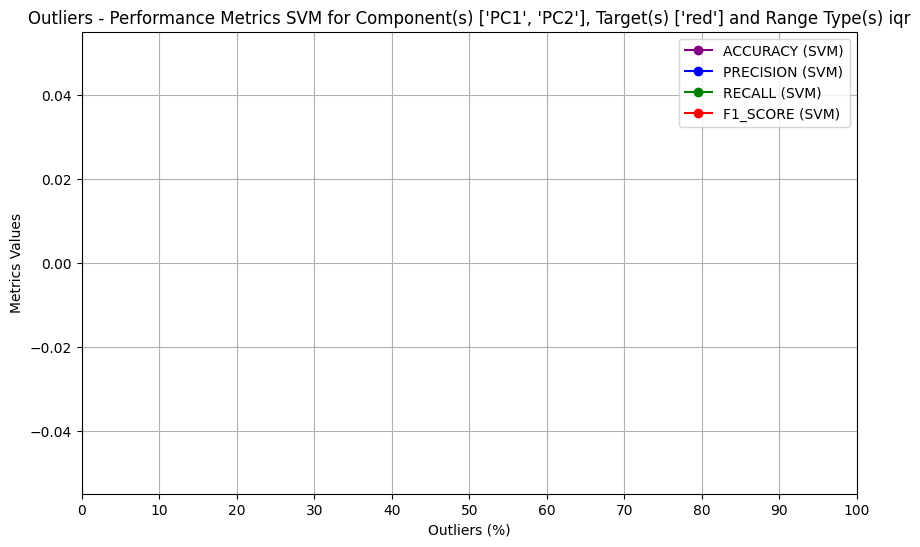

⚠️ Nessun risultato trovato per: features=PC1, wine_types=white, range_type=std


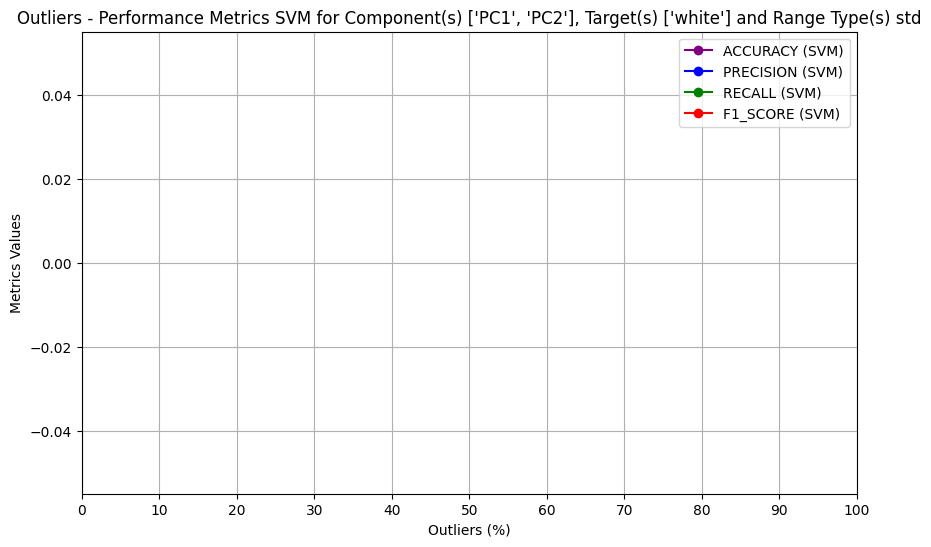

⚠️ Nessun risultato trovato per: features=PC1, wine_types=white, range_type=iqr


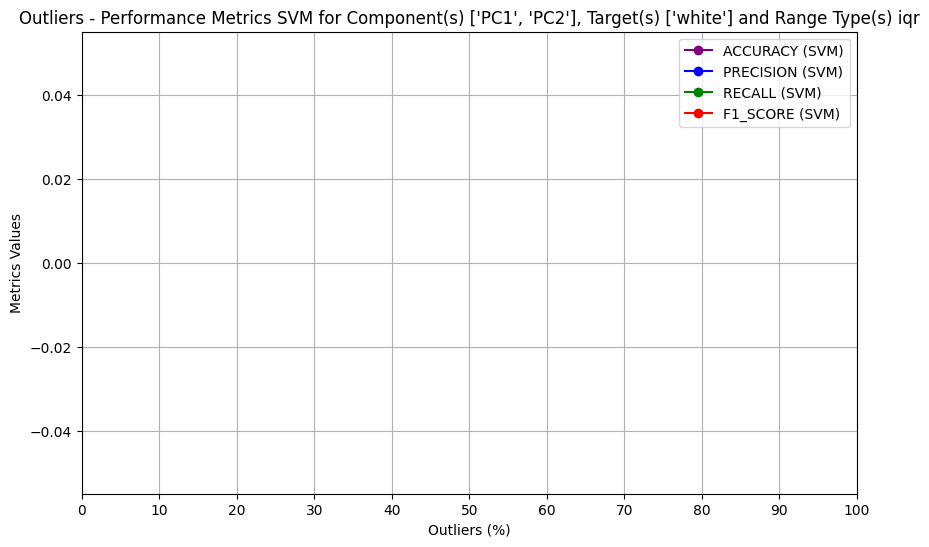

⚠️ Nessun risultato trovato per: features=PC1, wine_types=red, range_type=std


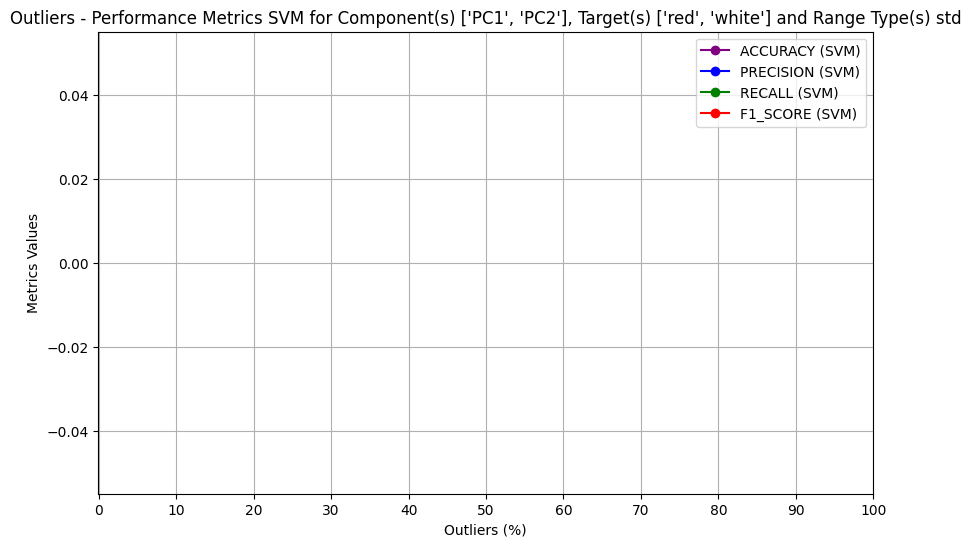

⚠️ Nessun risultato trovato per: features=PC1, wine_types=red, range_type=iqr


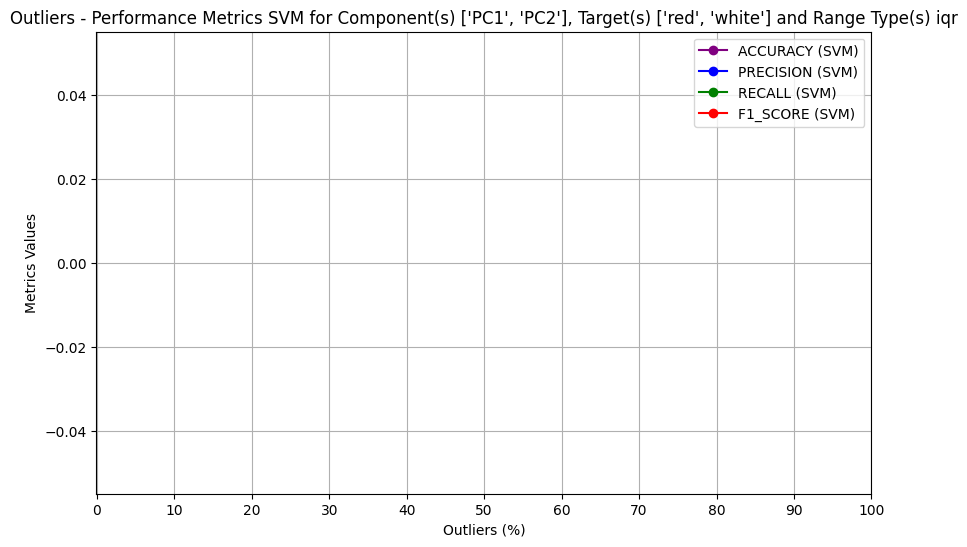

⚠️ Nessun risultato trovato per: features=PC3, wine_types=red, range_type=std


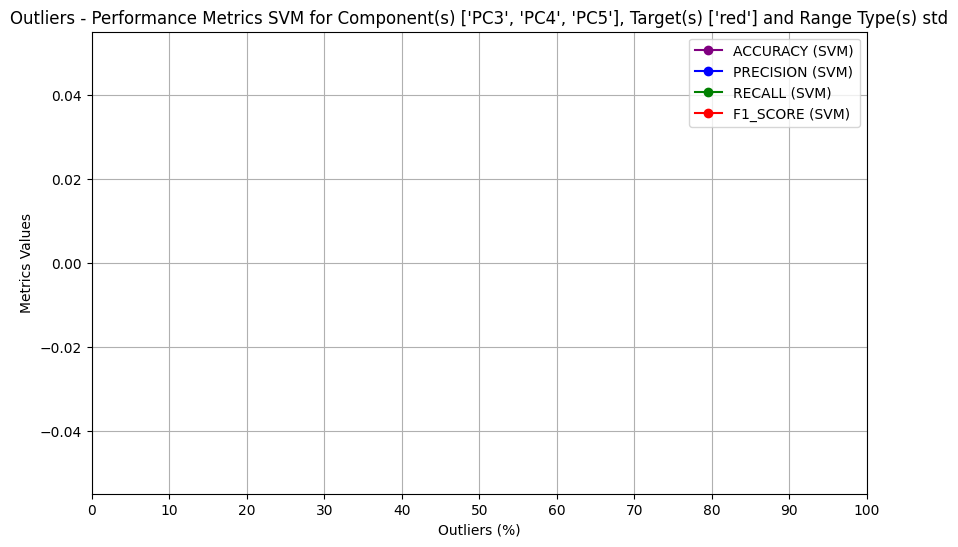

⚠️ Nessun risultato trovato per: features=PC3, wine_types=red, range_type=iqr


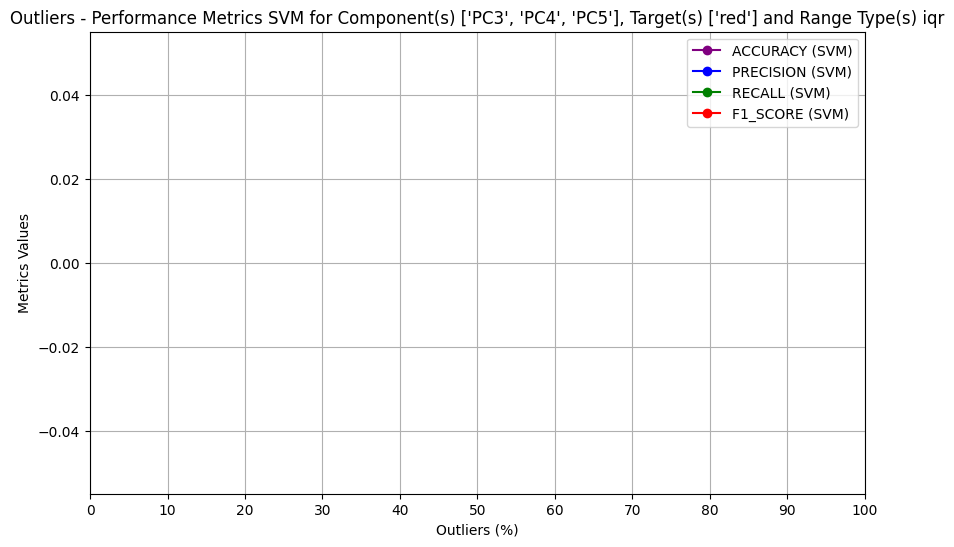

⚠️ Nessun risultato trovato per: features=PC3, wine_types=white, range_type=std


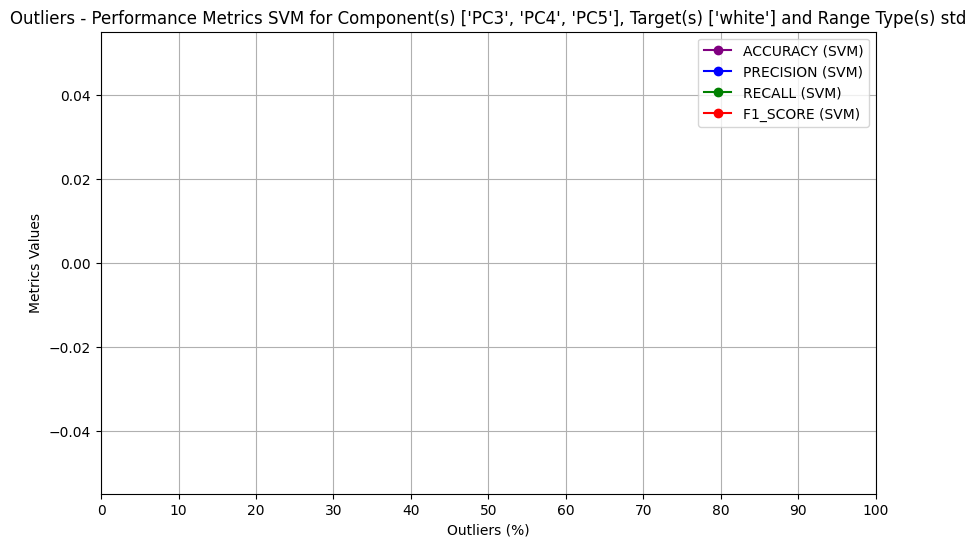

⚠️ Nessun risultato trovato per: features=PC3, wine_types=white, range_type=iqr


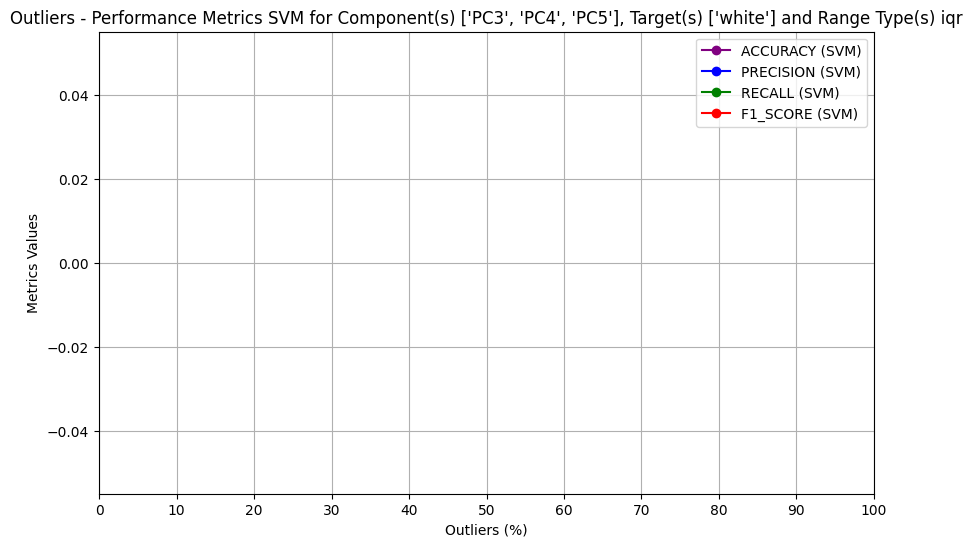

⚠️ Nessun risultato trovato per: features=PC3, wine_types=red, range_type=std


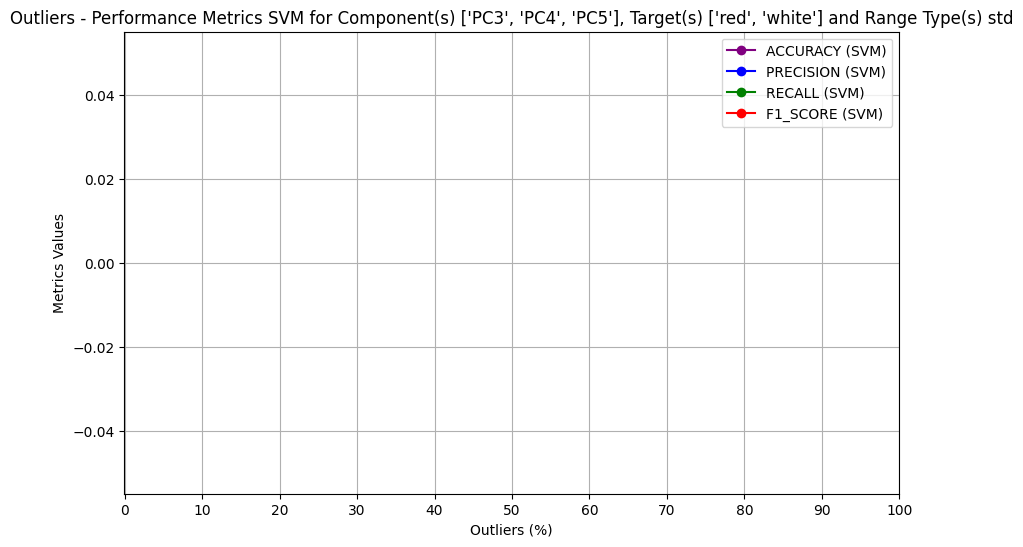

⚠️ Nessun risultato trovato per: features=PC3, wine_types=red, range_type=iqr


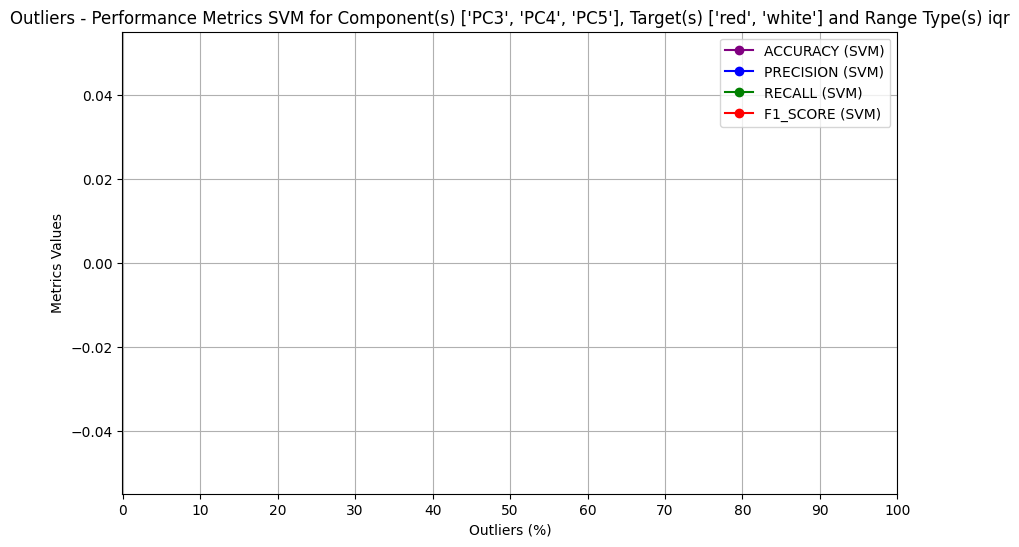

In [98]:
# Plot everything about cambia qua
for feature in features_to_consider_list:
    for wine_types in wine_types_to_consider_list:
        for range_type in range_type_to_consider_list:
            plot_outliers_graph("SVM", feature, wine_types, range_type)

#### Decision Tree

⚠️ Nessun risultato trovato per: features=PC1, wine_types=red, range_type=std


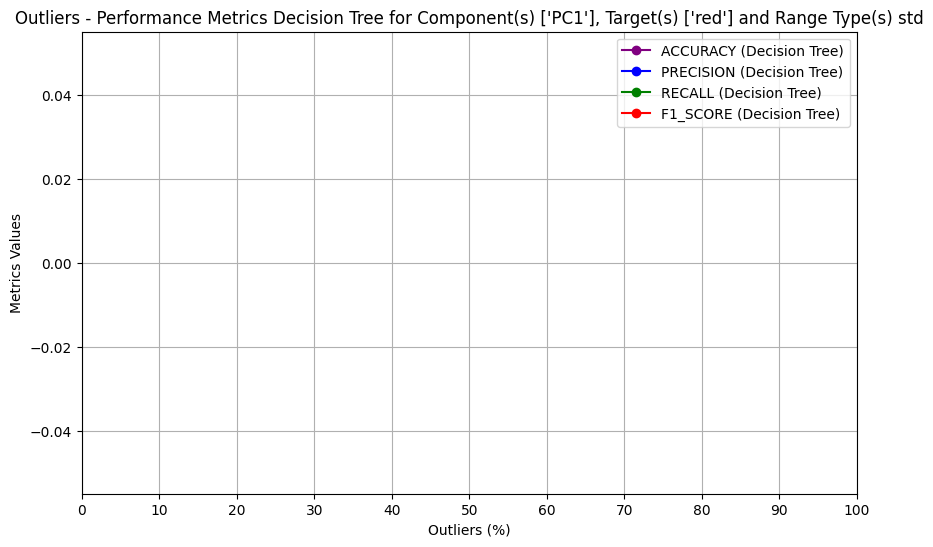

⚠️ Nessun risultato trovato per: features=PC1, wine_types=red, range_type=iqr


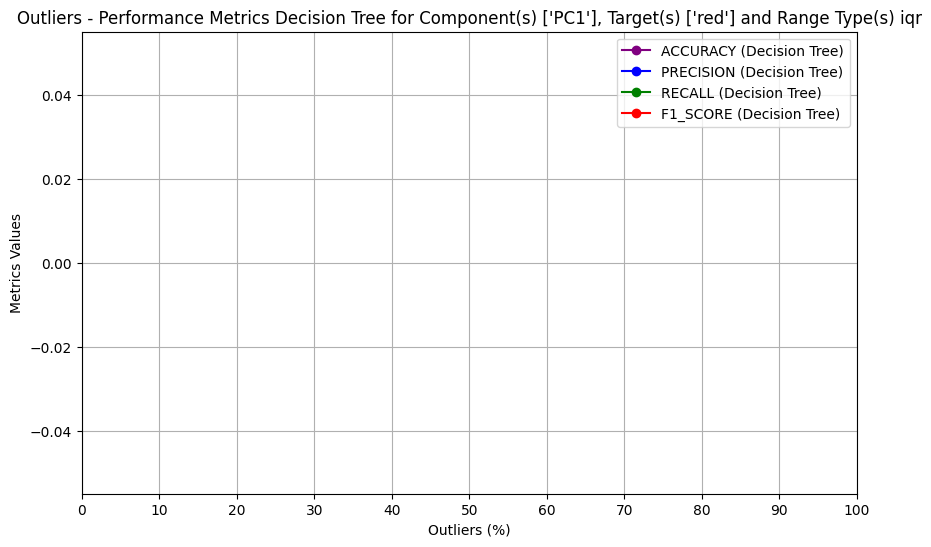

⚠️ Nessun risultato trovato per: features=PC1, wine_types=white, range_type=std


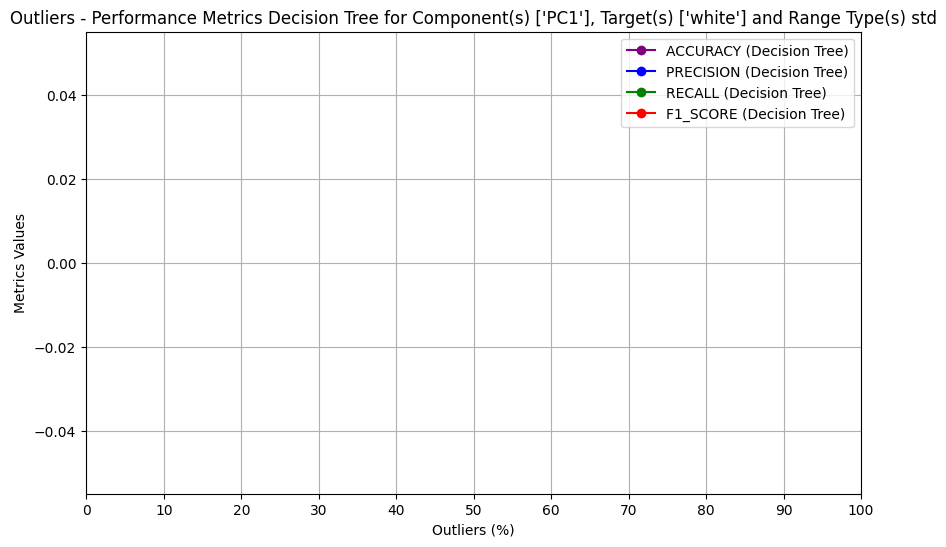

⚠️ Nessun risultato trovato per: features=PC1, wine_types=white, range_type=iqr


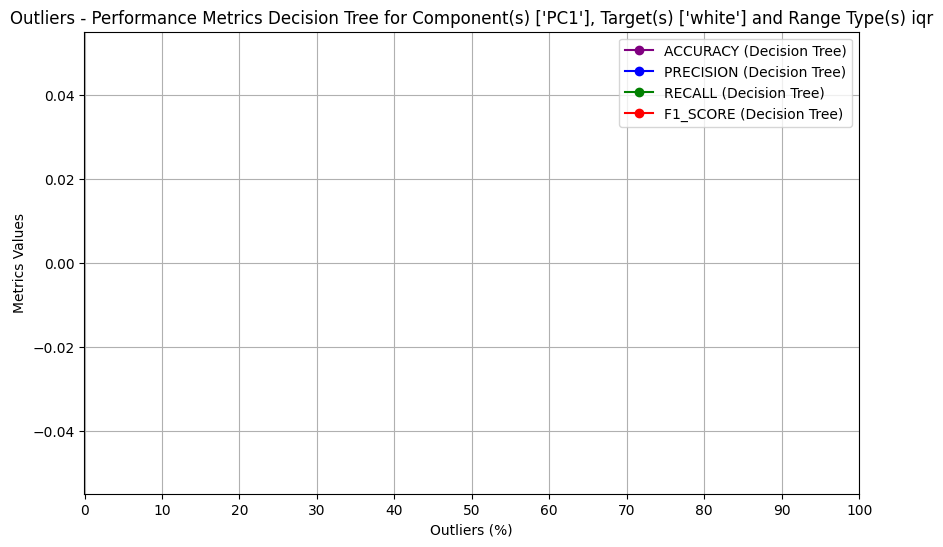

⚠️ Nessun risultato trovato per: features=PC1, wine_types=red, range_type=std


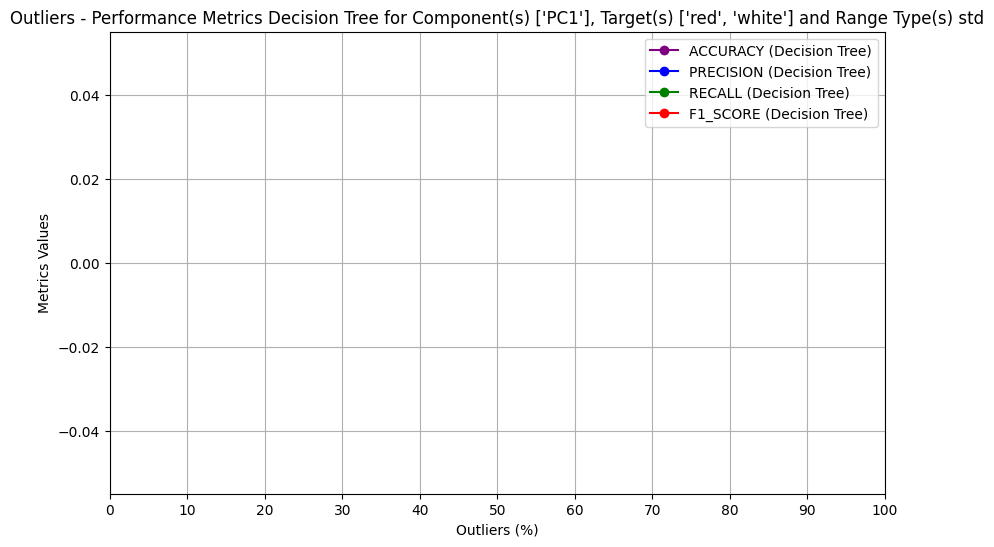

⚠️ Nessun risultato trovato per: features=PC1, wine_types=red, range_type=iqr


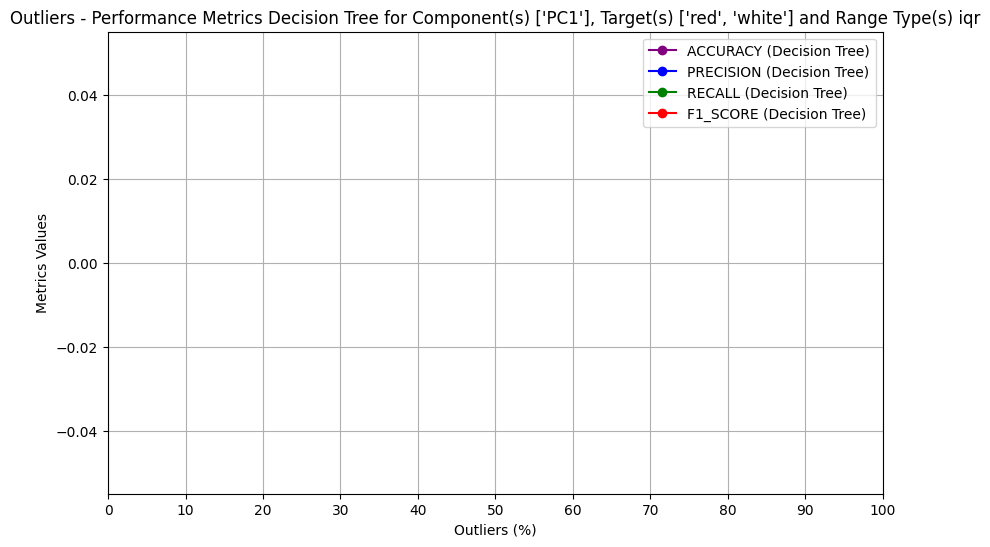

⚠️ Nessun risultato trovato per: features=PC2, wine_types=red, range_type=std


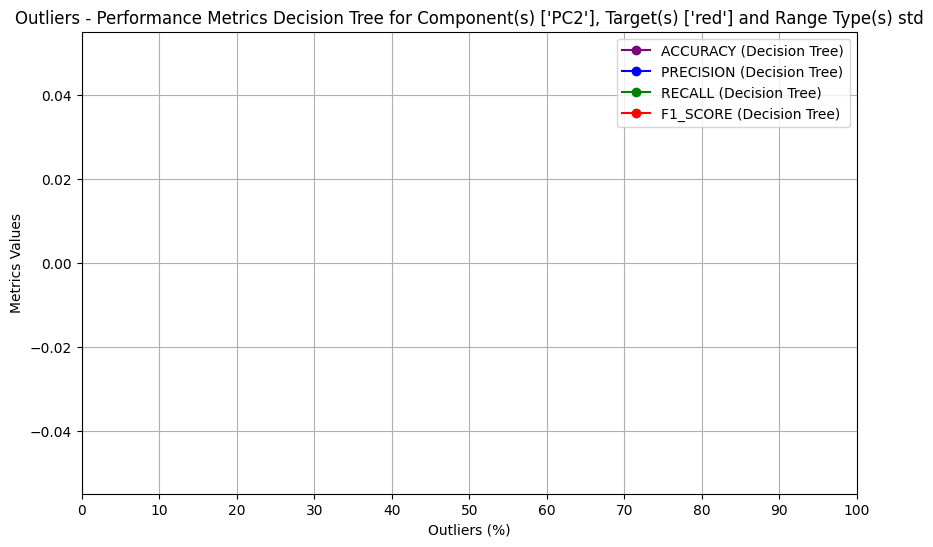

⚠️ Nessun risultato trovato per: features=PC2, wine_types=red, range_type=iqr


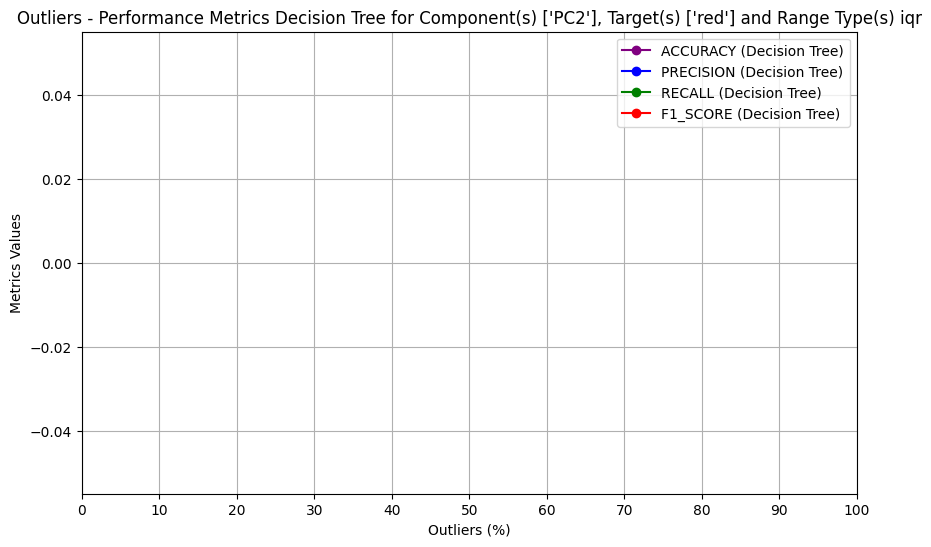

⚠️ Nessun risultato trovato per: features=PC2, wine_types=white, range_type=std


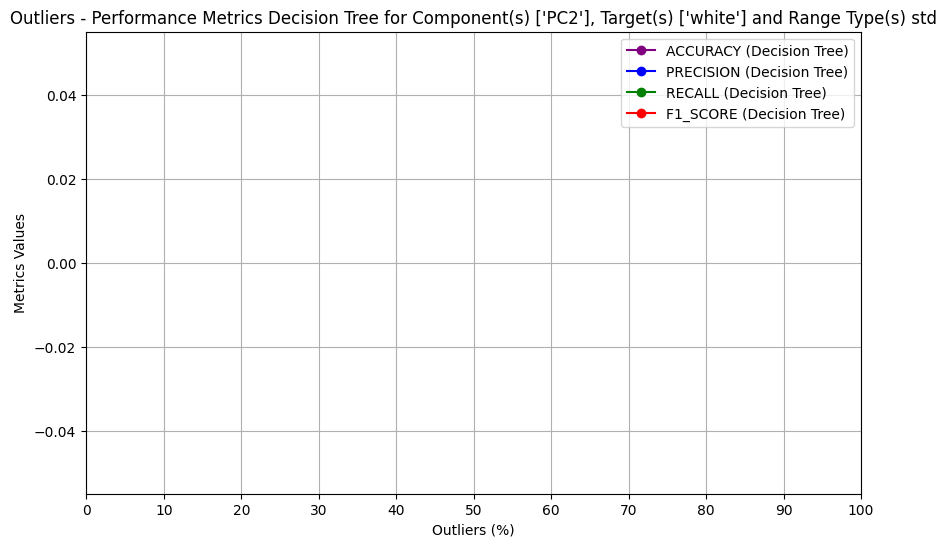

⚠️ Nessun risultato trovato per: features=PC2, wine_types=white, range_type=iqr


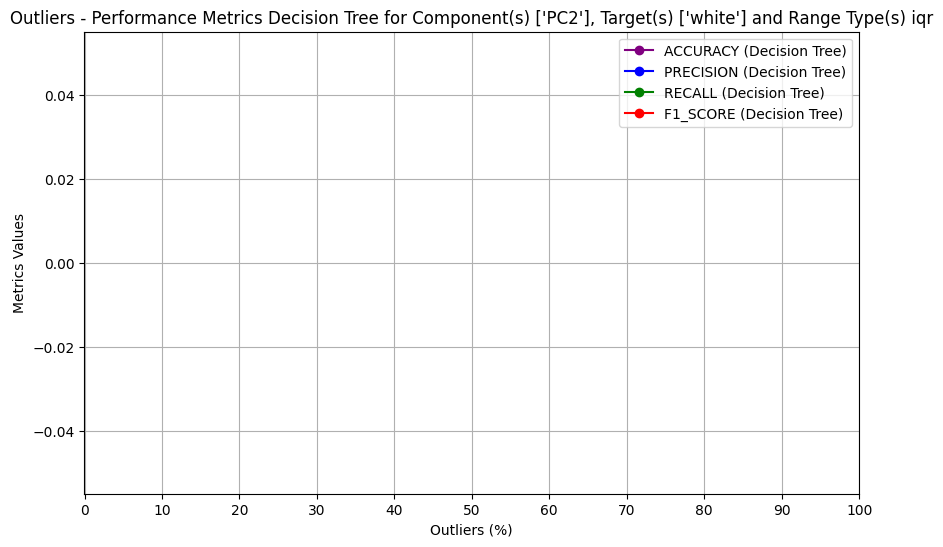

⚠️ Nessun risultato trovato per: features=PC2, wine_types=red, range_type=std


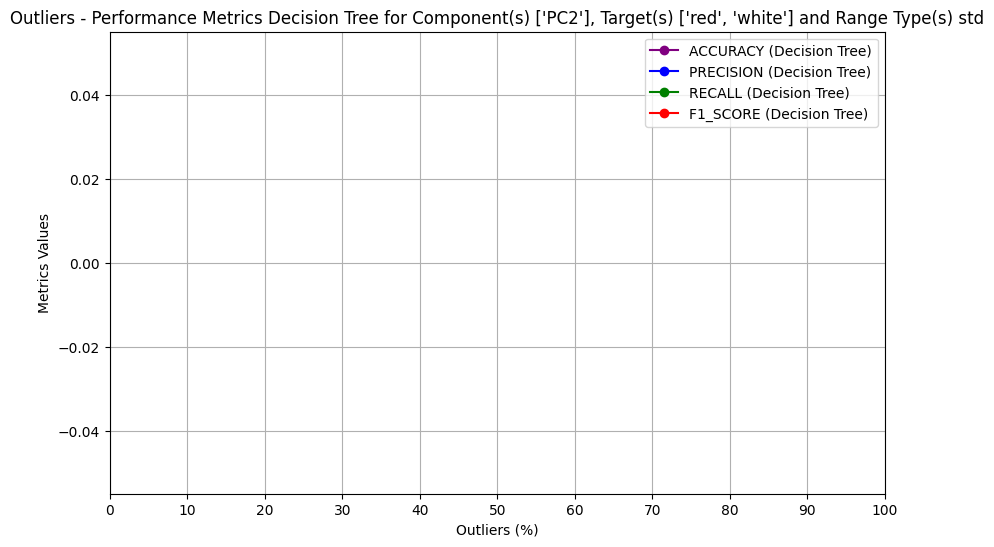

⚠️ Nessun risultato trovato per: features=PC2, wine_types=red, range_type=iqr


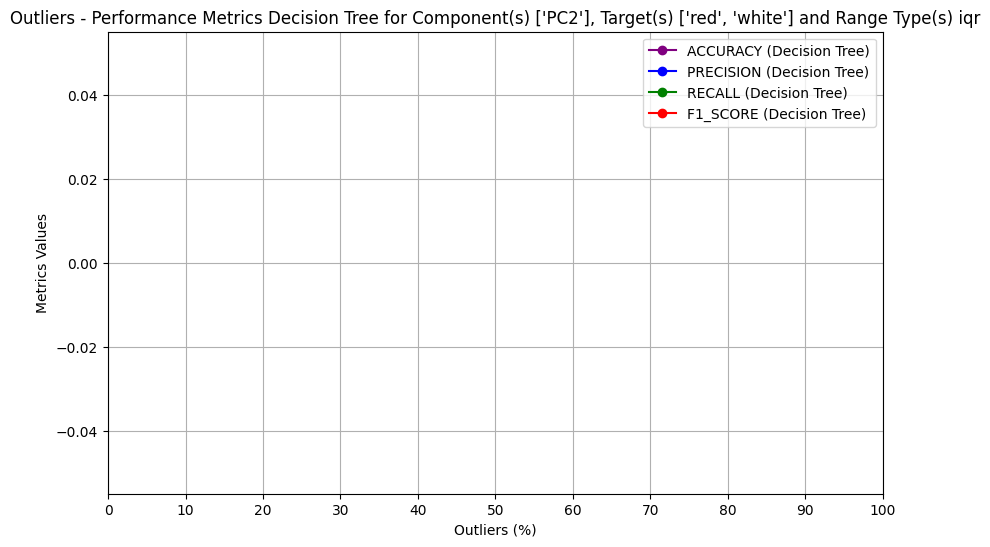

⚠️ Nessun risultato trovato per: features=PC1, wine_types=red, range_type=std


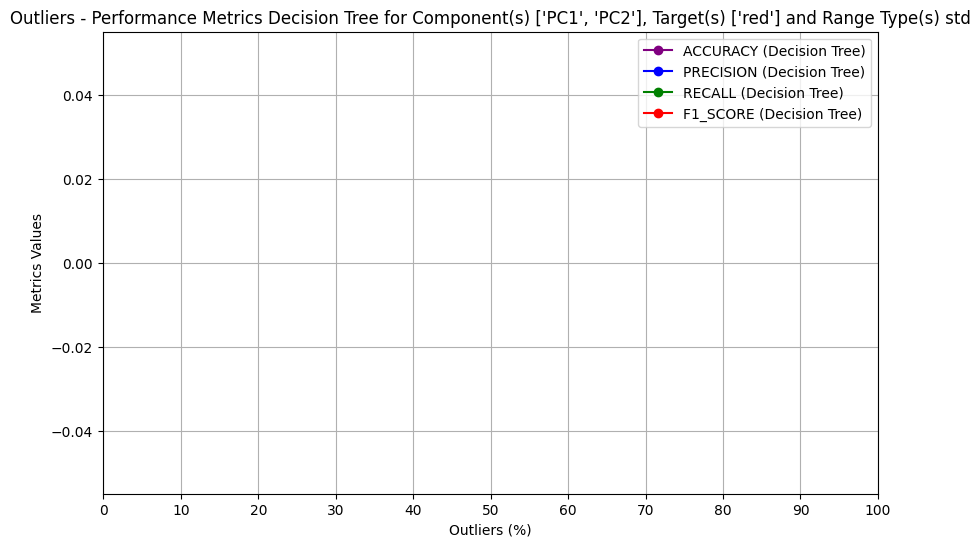

⚠️ Nessun risultato trovato per: features=PC1, wine_types=red, range_type=iqr


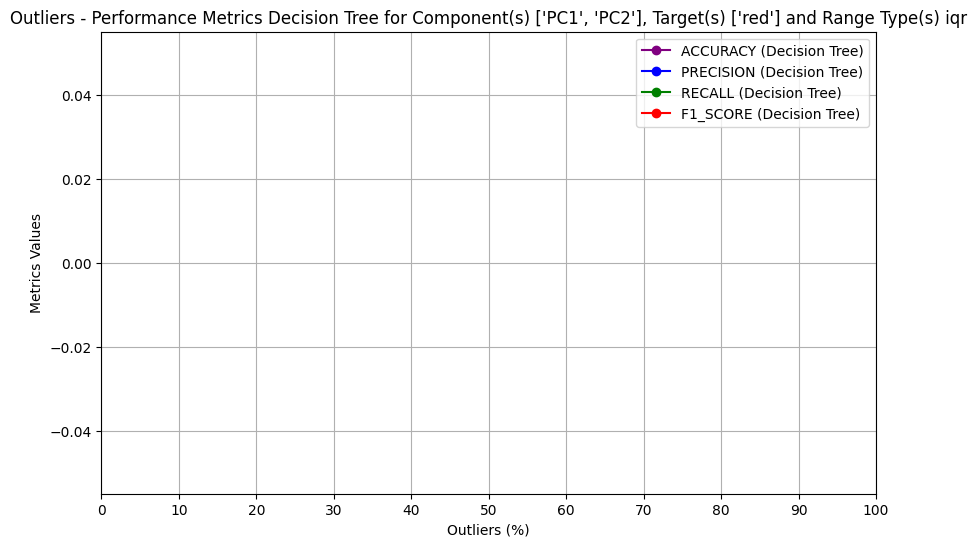

⚠️ Nessun risultato trovato per: features=PC1, wine_types=white, range_type=std


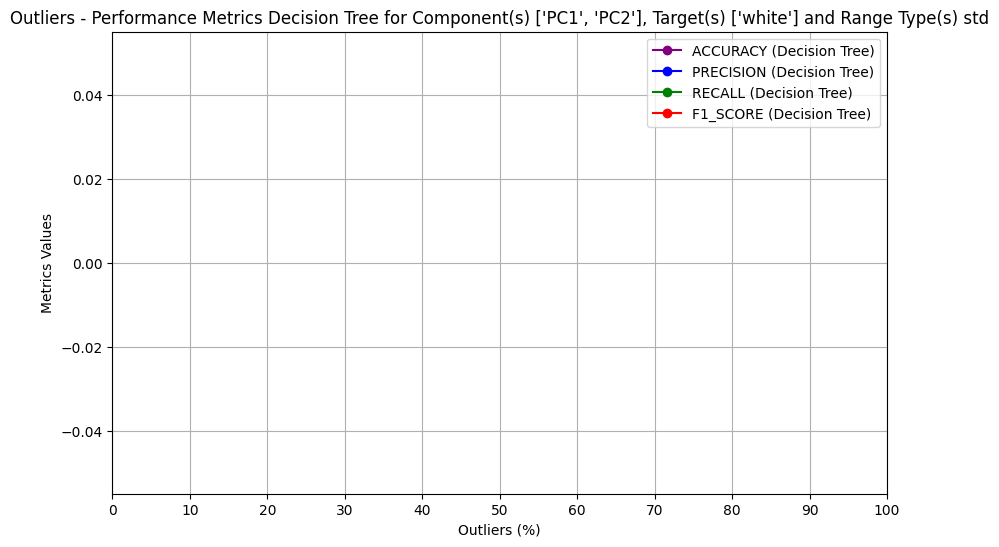

⚠️ Nessun risultato trovato per: features=PC1, wine_types=white, range_type=iqr


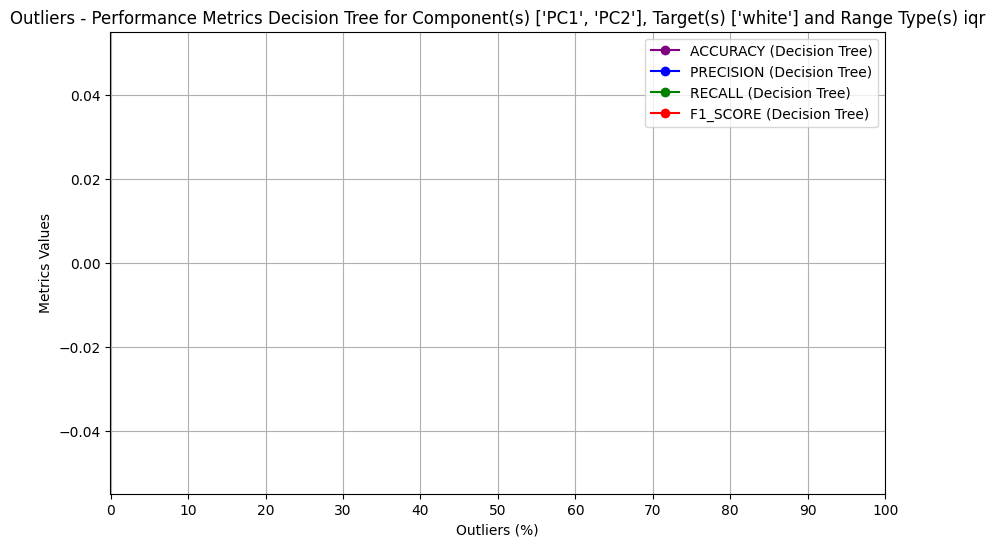

⚠️ Nessun risultato trovato per: features=PC1, wine_types=red, range_type=std


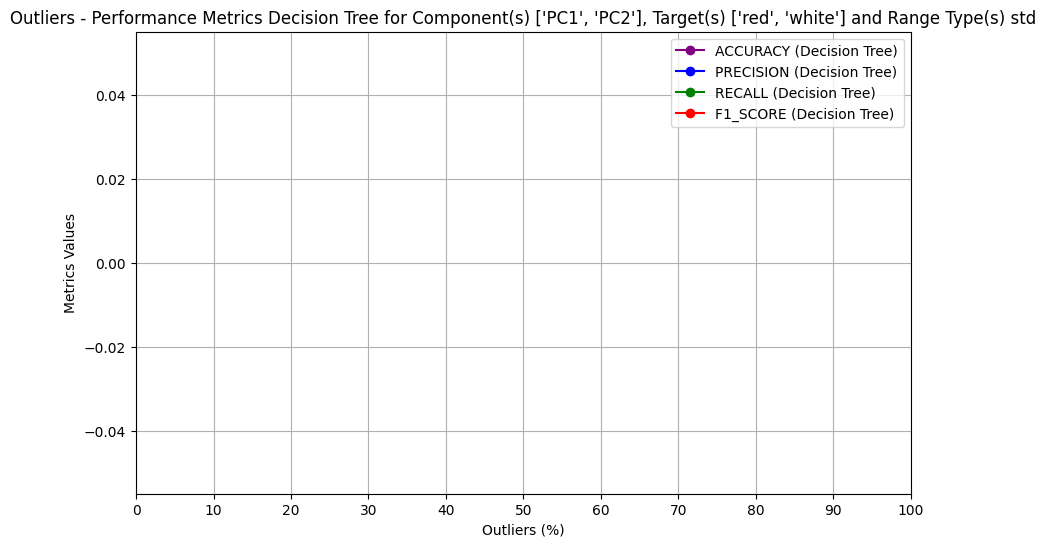

⚠️ Nessun risultato trovato per: features=PC1, wine_types=red, range_type=iqr


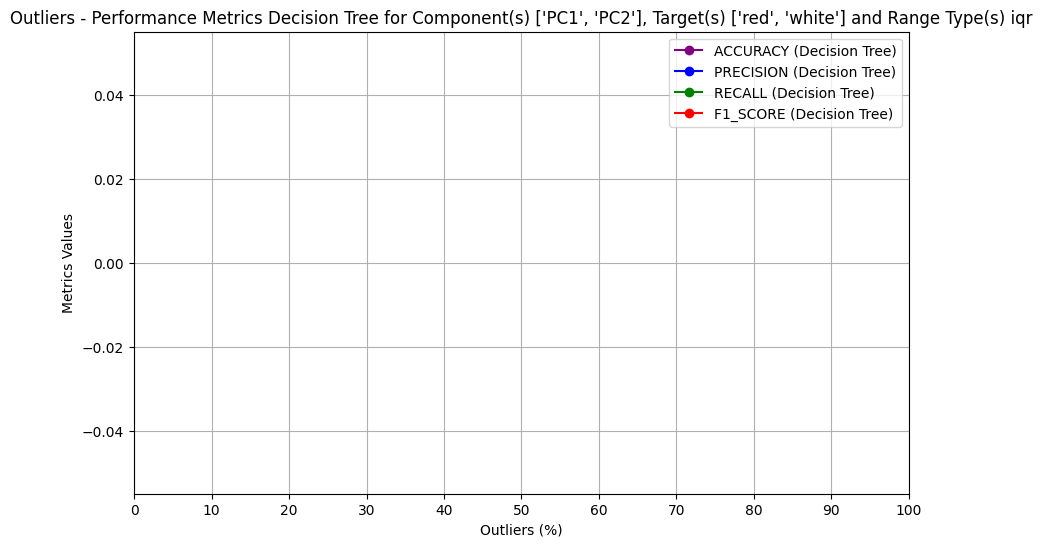

⚠️ Nessun risultato trovato per: features=PC3, wine_types=red, range_type=std


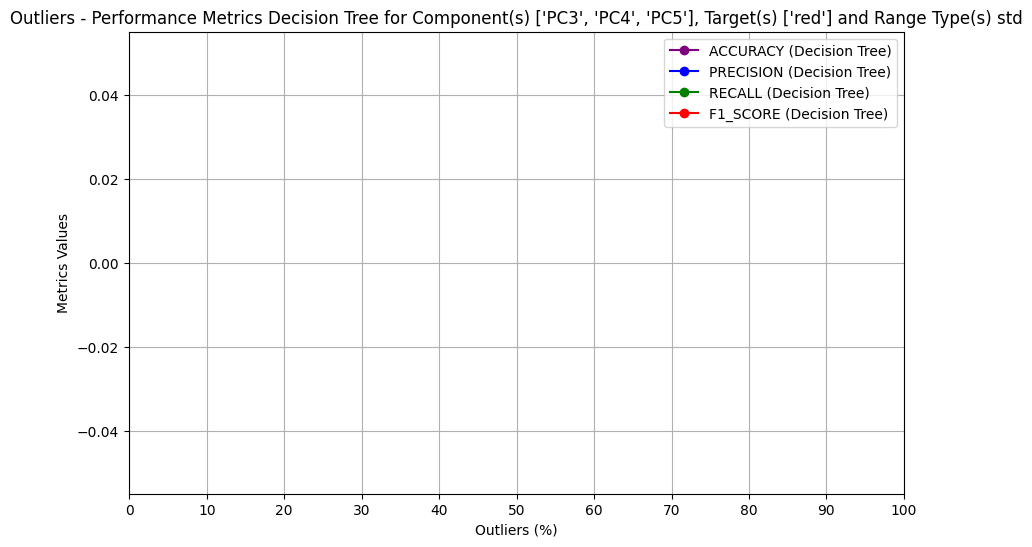

⚠️ Nessun risultato trovato per: features=PC3, wine_types=red, range_type=iqr


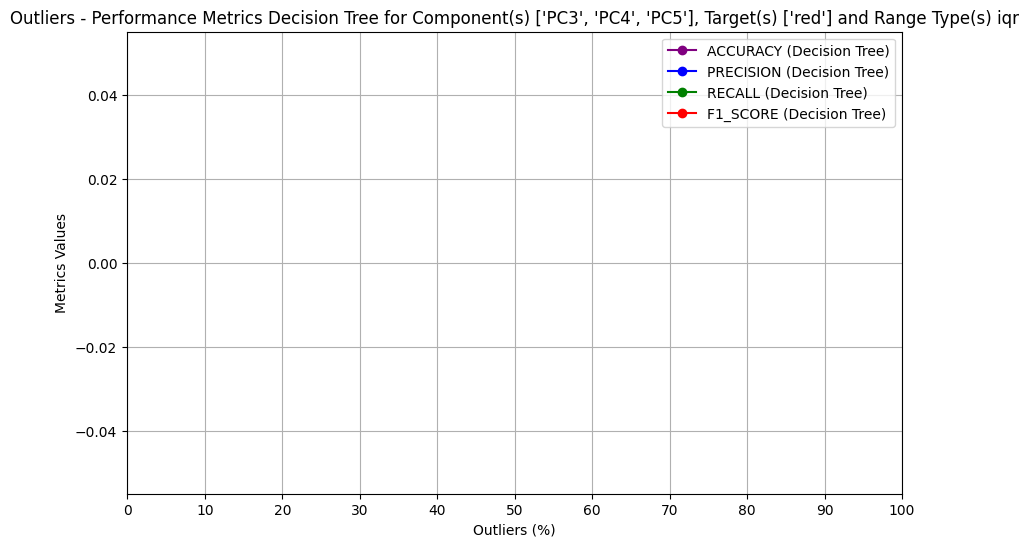

⚠️ Nessun risultato trovato per: features=PC3, wine_types=white, range_type=std


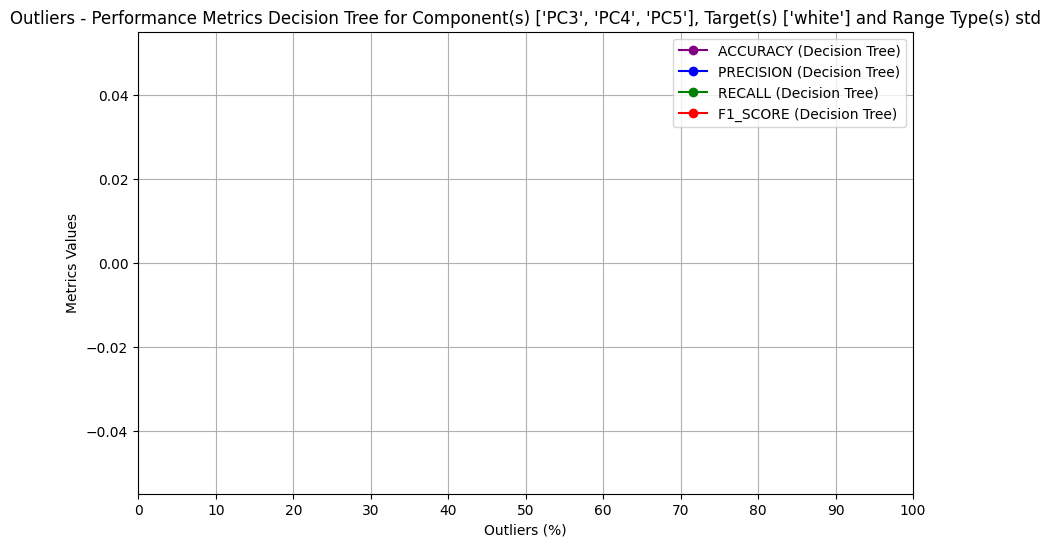

⚠️ Nessun risultato trovato per: features=PC3, wine_types=white, range_type=iqr


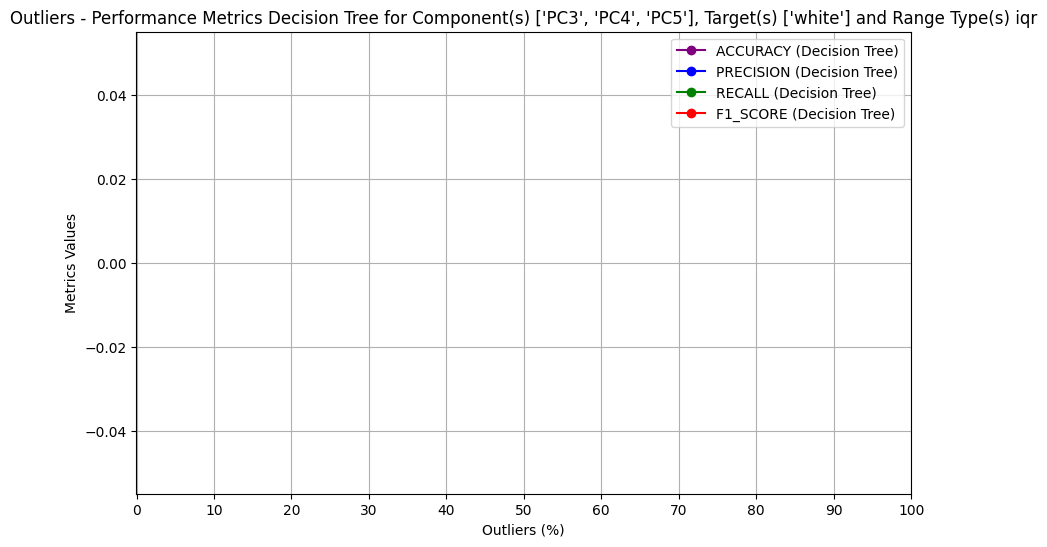

⚠️ Nessun risultato trovato per: features=PC3, wine_types=red, range_type=std


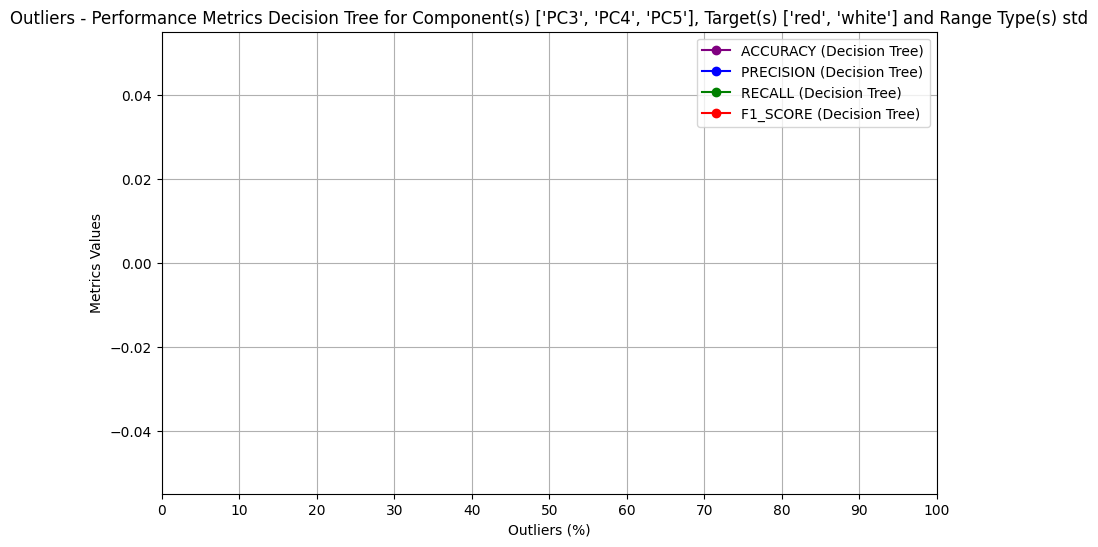

⚠️ Nessun risultato trovato per: features=PC3, wine_types=red, range_type=iqr


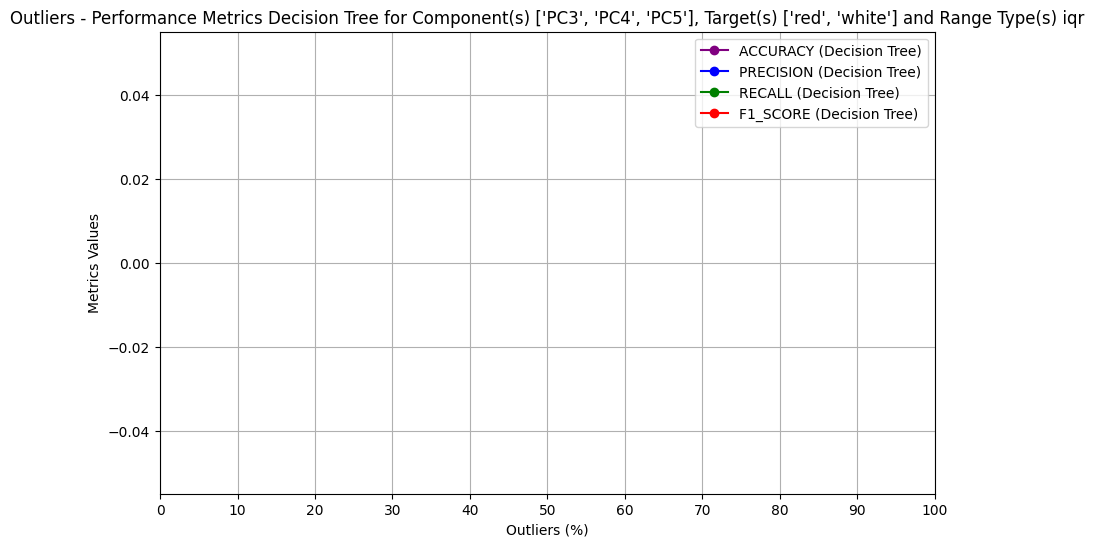

In [99]:
# Plot everything about cambia qua
for feature in features_to_consider_list:
    for wine_types in wine_types_to_consider_list:
        for range_type in range_type_to_consider_list:
            plot_outliers_graph("Decision Tree", feature, wine_types, range_type)

### Out Of Domain Values

In [100]:
# Range for Out of Domain Experiments
start_index = 354
end_index = 473  
out_of_domain = get_experiment_parameters('../experiments_pipeline/experiments_config.json', start_index, end_index)
# Print the data to verify if it's correct
print(json.dumps(out_of_domain, indent=4))

Index 354 is out of range
Index 355 is out of range
Index 356 is out of range
Index 357 is out of range
Index 358 is out of range
Index 359 is out of range
Index 360 is out of range
Index 361 is out of range
Index 362 is out of range
Index 363 is out of range
Index 364 is out of range
Index 365 is out of range
Index 366 is out of range
Index 367 is out of range
Index 368 is out of range
Index 369 is out of range
Index 370 is out of range
Index 371 is out of range
Index 372 is out of range
Index 373 is out of range
Index 374 is out of range
Index 375 is out of range
Index 376 is out of range
Index 377 is out of range
Index 378 is out of range
Index 379 is out of range
Index 380 is out of range
Index 381 is out of range
Index 382 is out of range
Index 383 is out of range
Index 384 is out of range
Index 385 is out of range
Index 386 is out of range
Index 387 is out of range
Index 388 is out of range
Index 389 is out of range
Index 390 is out of range
Index 391 is out of range
Index 392 is

In [104]:
def get_results_oodv(features_to_consider, wine_types_to_consider_out_of_domain_values):
    # Normalizza gli input se sono liste
    features = features_to_consider[0] if isinstance(features_to_consider, list) else features_to_consider
    wine_types = wine_types_to_consider_out_of_domain_values[0] if isinstance(wine_types_to_consider_out_of_domain_values, list) else wine_types_to_consider_out_of_domain_values

    # Filtro
    results = [
        (
            int(experiment["experiment-name"][12:]),
            experiment["oodv-percentage"],
            experiment["wine-types-to-consider-oodv"]
        )
        for experiment in out_of_domain
        if experiment["features-to-dirty-oodv"] == features and
           experiment["wine-types-to-consider-oodv"] == wine_types
    ]

    # Inserisci il "fake experiment" solo se possibile
    if len(results) >= 2:
        results.insert(0, (0, 0.0, results[1][2]))
    elif len(results) == 1:
        results.insert(0, (0, 0.0, results[0][2]))
    else:
        print(f"⚠️ Nessun risultato trovato per: features={features}, wine_types={wine_types}")
        return []

    return results

In [105]:
# Function to plot
def plot_oodv_graph(model_name_to_consider, features_to_consider, wine_types_to_consider_out_of_domain_values):
    # Get the results object
    results = get_results_oodv(features_to_consider, wine_types_to_consider_out_of_domain_values)

    # Make the graph
    plt.figure(figsize=(10, 6))

    for metric, color in metrics.items():
        # Initialize lists to collect x and y values
        x_values = []
        y_values = []

        for experiment_id, percentage, _ in results:
            # Select the correct experiment in the df of metrics
            data = df[(df['experiment_id'] == experiment_id) & (df['model_name'] == model_name_to_consider)]

            if data.empty:
                # Experiment 0
                assert experiment_id == 0, "Something went wrong, expected experiment 0"

                # Get the data properly
                data = df[(df['experiment_id'] == experiment_id) & (df['model_name'] == model_name_to_consider)]

                if data.empty:
                    assert False, "This was unexpected"

            # Get the metrics
            metric_value = data[metric].values[0]
            # Collect the data points
            x_values.append(percentage * 100)
            y_values.append(metric_value)
        
        # Plot all collected points and lines for the current metric
        plt.plot(x_values, y_values, marker='o', linestyle='-', color=color, label=f"{metric.upper()} ({model_name_to_consider})")
        
    plt.xlabel('Out Of Domain (%)')
    plt.ylabel('Metrics Values')
    plt.title(f'Out Of Domain - Performance Metrics {model_name_to_consider} for Component(s) {features_to_consider} and Target(s) {wine_types_to_consider_out_of_domain_values}')
    plt.legend(loc='best')
    plt.grid(True)
    plt.xticks([10 * i for i in range(0, 11)])
    plt.show()

#### SVM

⚠️ Nessun risultato trovato per: features=PC1, wine_types=red


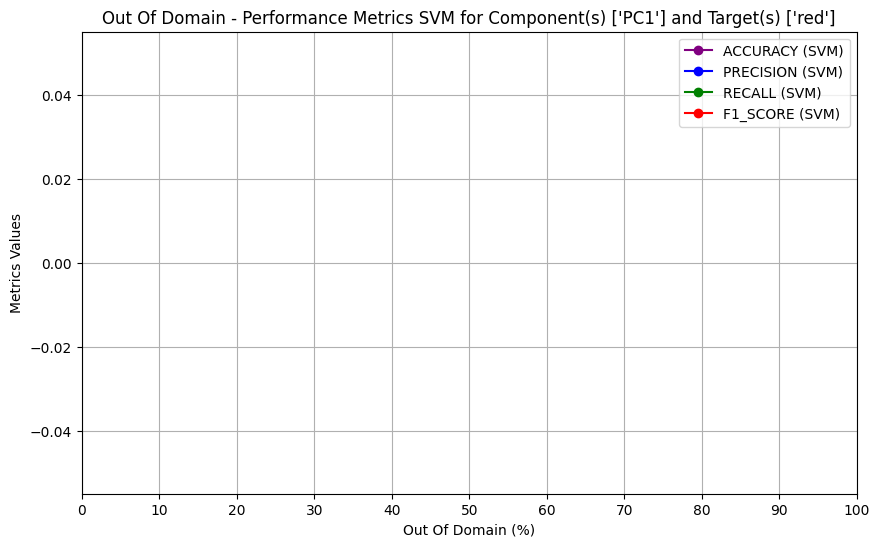

⚠️ Nessun risultato trovato per: features=PC1, wine_types=white


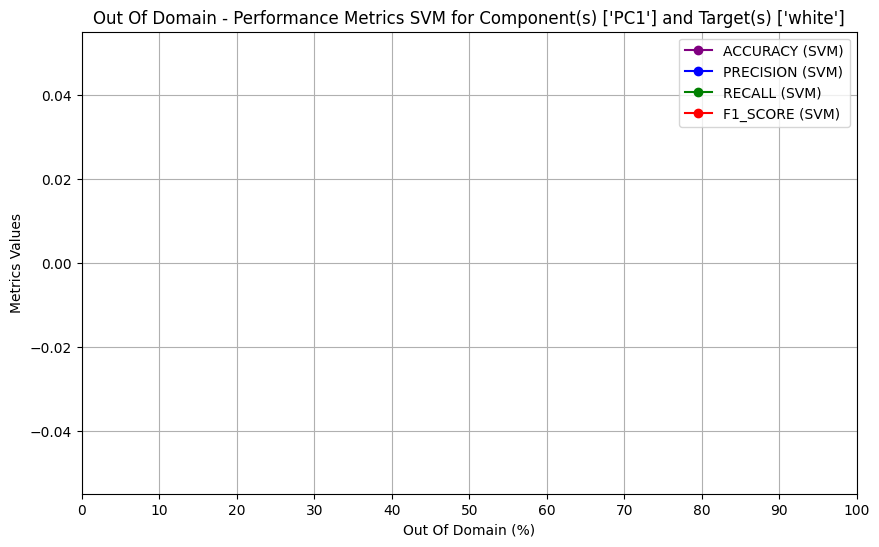

⚠️ Nessun risultato trovato per: features=PC1, wine_types=red


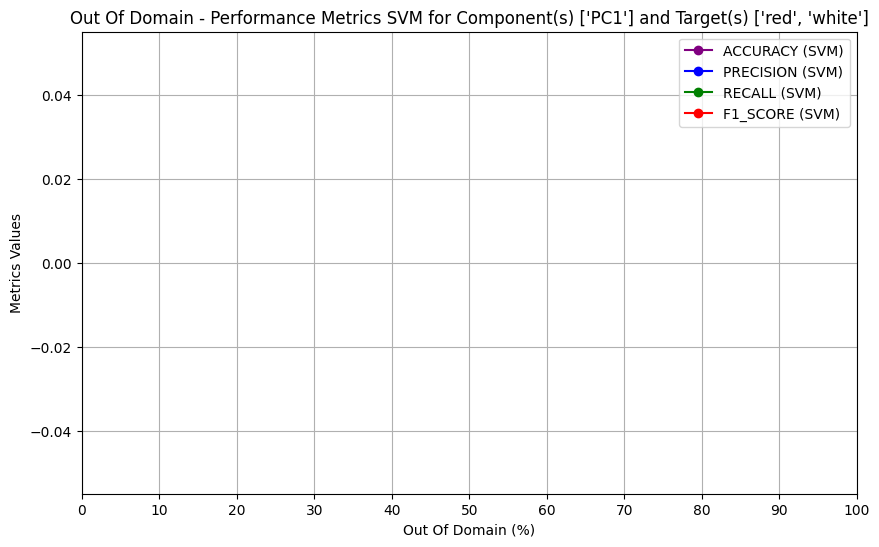

⚠️ Nessun risultato trovato per: features=PC2, wine_types=red


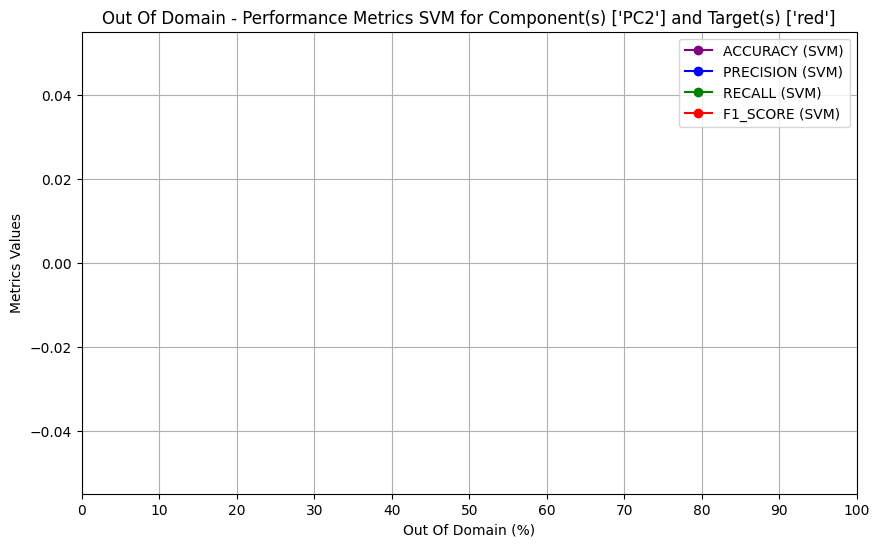

⚠️ Nessun risultato trovato per: features=PC2, wine_types=white


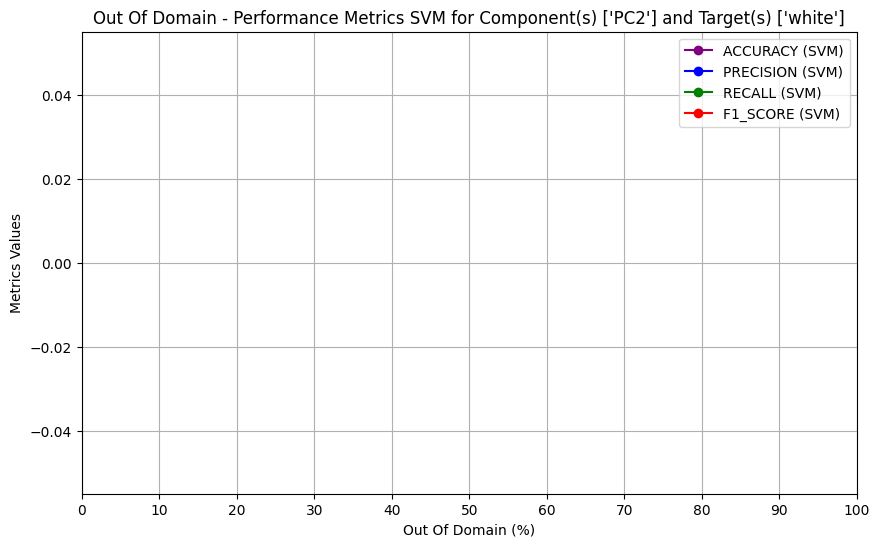

⚠️ Nessun risultato trovato per: features=PC2, wine_types=red


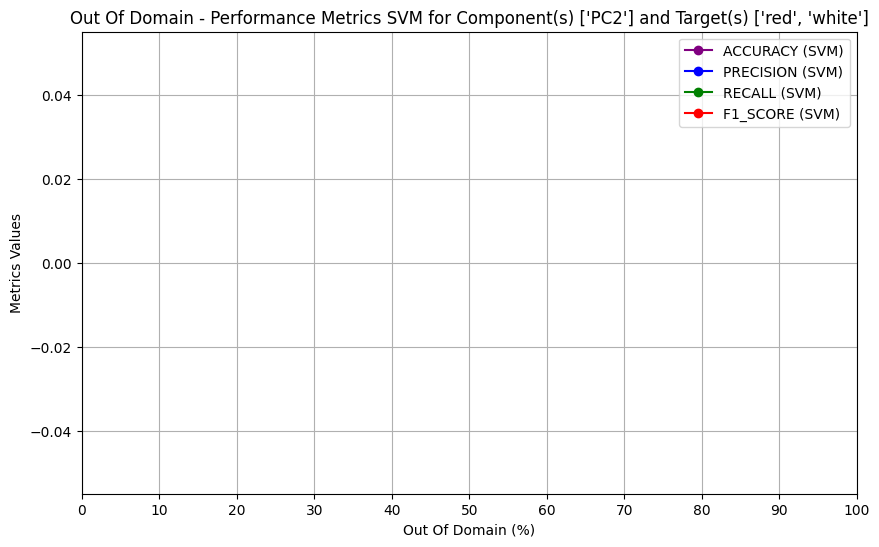

⚠️ Nessun risultato trovato per: features=PC1, wine_types=red


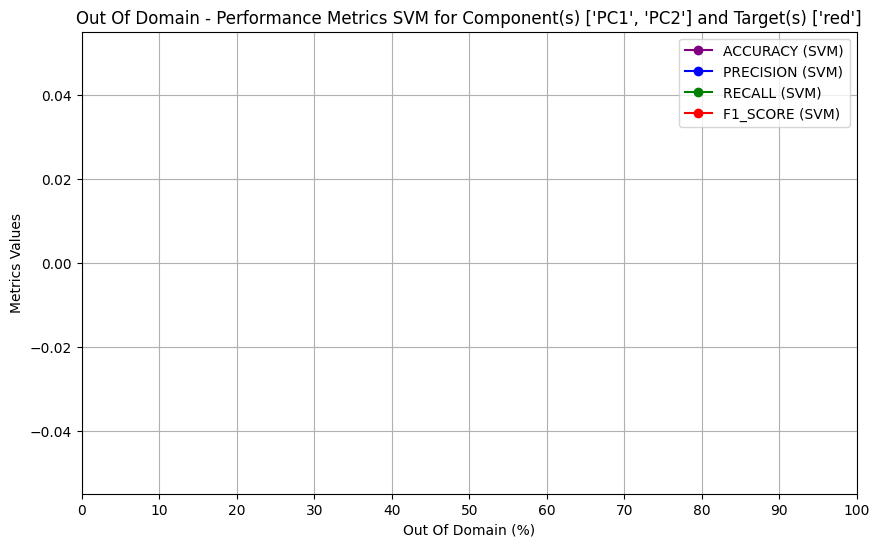

⚠️ Nessun risultato trovato per: features=PC1, wine_types=white


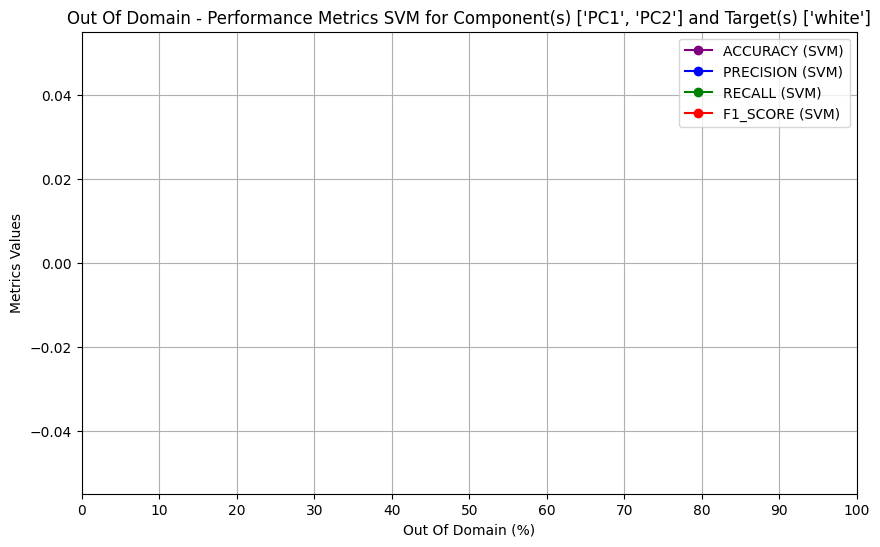

⚠️ Nessun risultato trovato per: features=PC1, wine_types=red


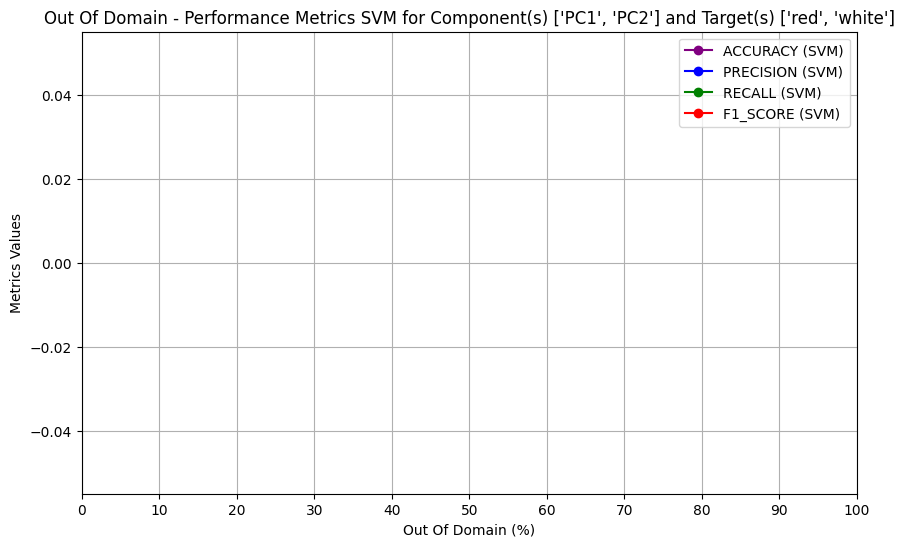

⚠️ Nessun risultato trovato per: features=PC3, wine_types=red


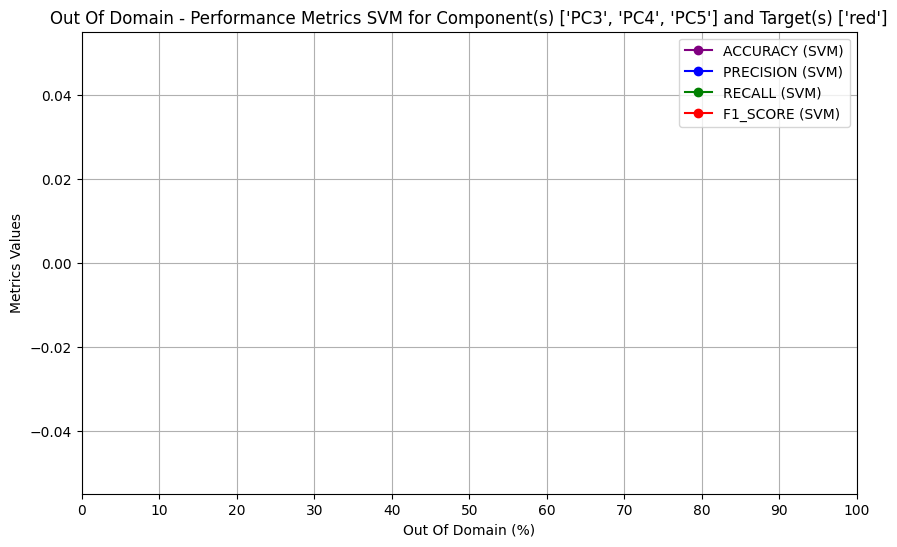

⚠️ Nessun risultato trovato per: features=PC3, wine_types=white


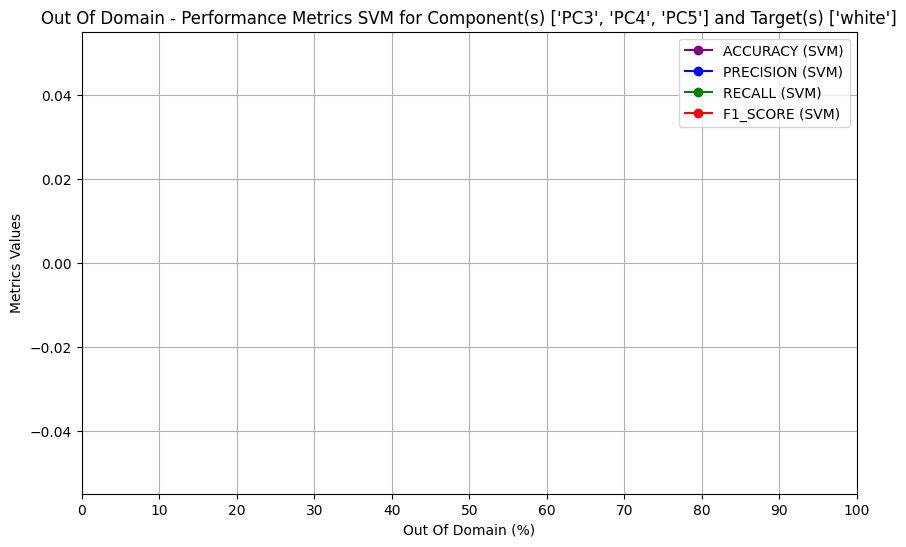

⚠️ Nessun risultato trovato per: features=PC3, wine_types=red


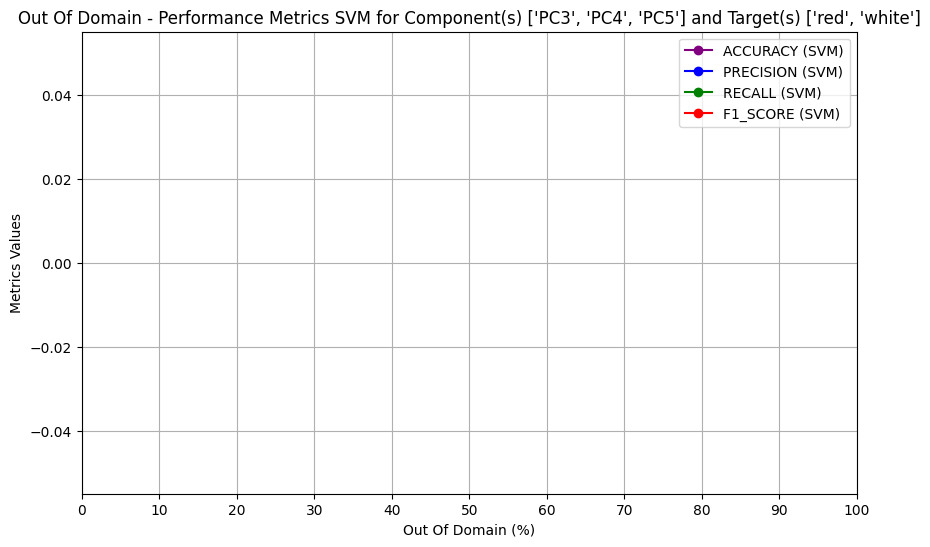

In [106]:
for feature in features_to_consider_list:
    for wine_types in wine_types_to_consider_list:
        plot_oodv_graph("SVM", feature, wine_types)

#### Neural Network

⚠️ Nessun risultato trovato per: features=PC1, wine_types=red


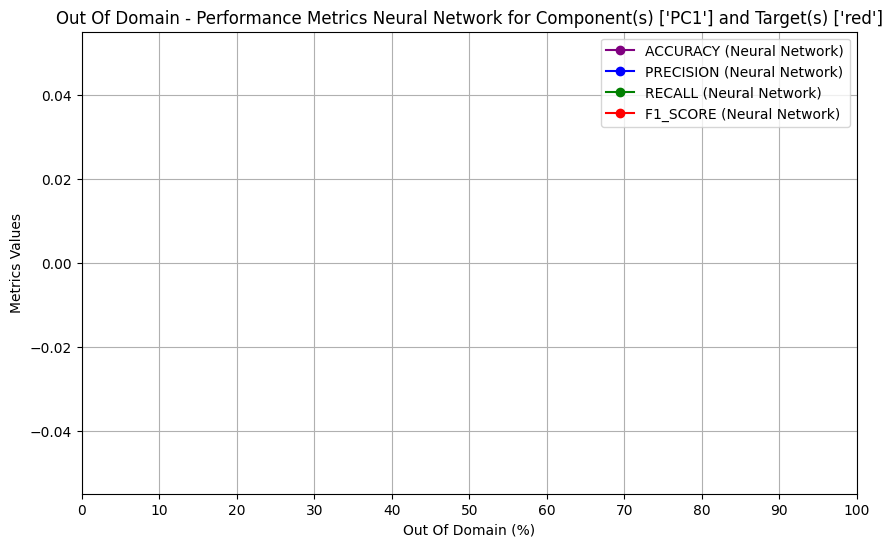

⚠️ Nessun risultato trovato per: features=PC1, wine_types=white


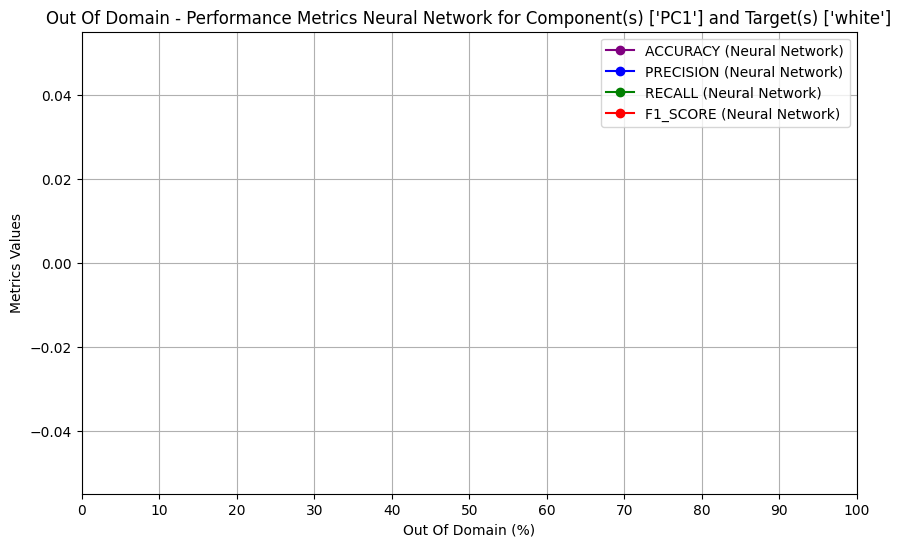

⚠️ Nessun risultato trovato per: features=PC1, wine_types=red


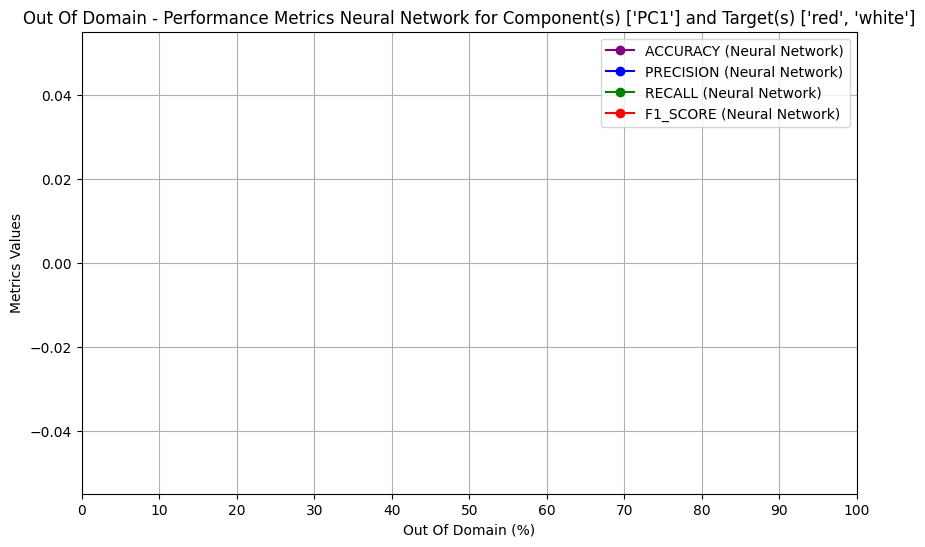

⚠️ Nessun risultato trovato per: features=PC2, wine_types=red


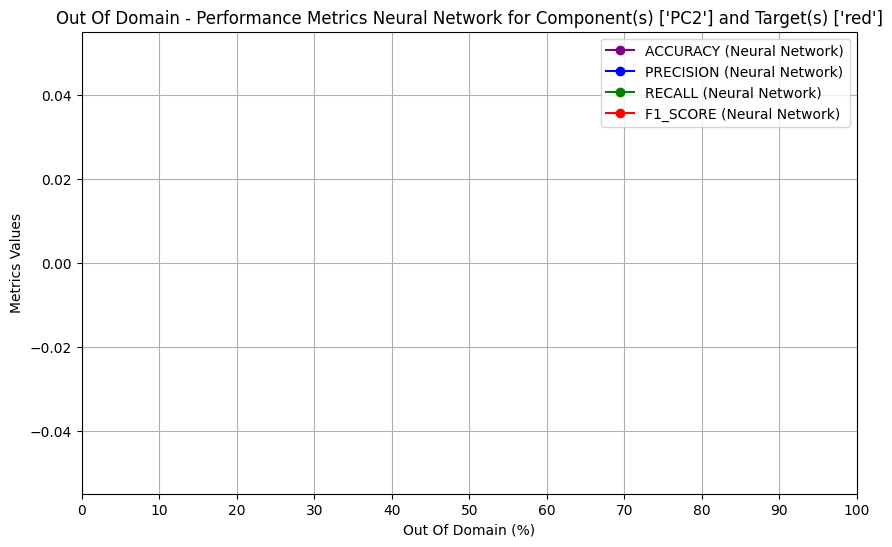

⚠️ Nessun risultato trovato per: features=PC2, wine_types=white


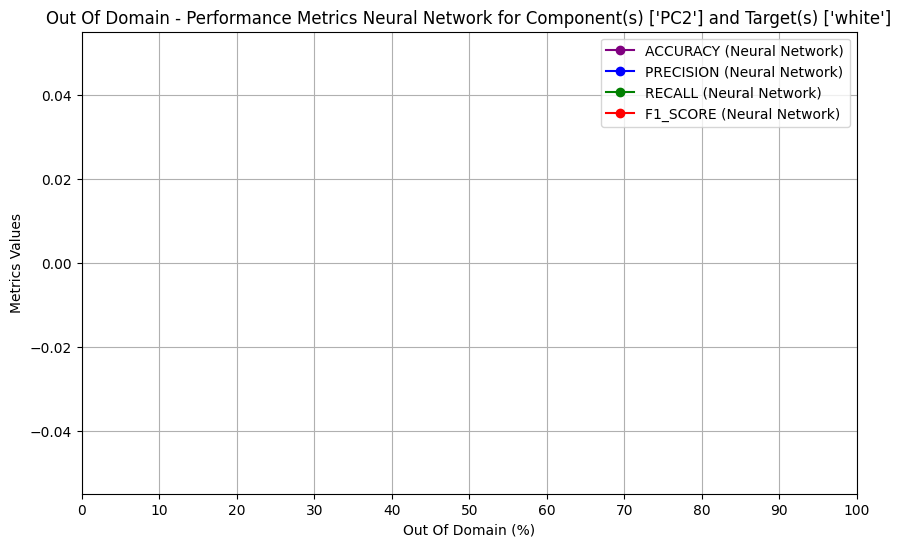

⚠️ Nessun risultato trovato per: features=PC2, wine_types=red


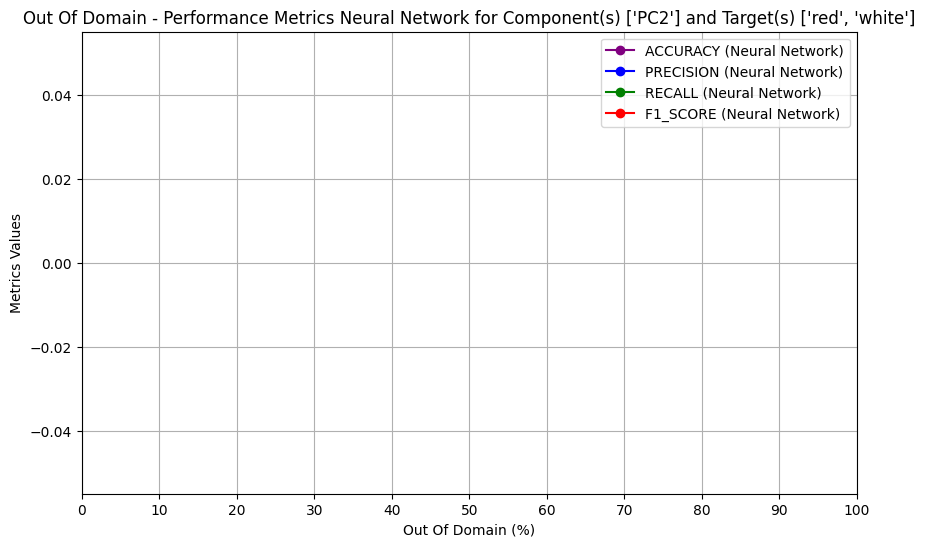

⚠️ Nessun risultato trovato per: features=PC1, wine_types=red


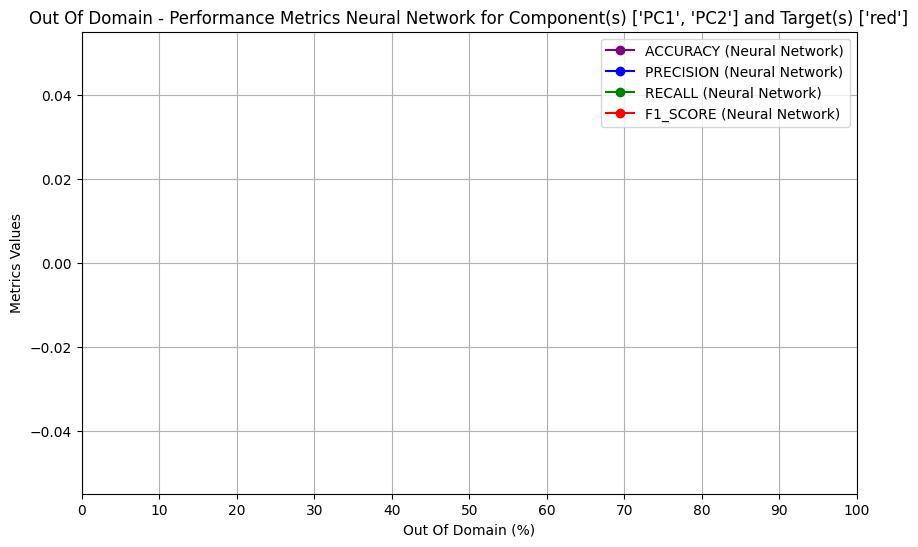

⚠️ Nessun risultato trovato per: features=PC1, wine_types=white


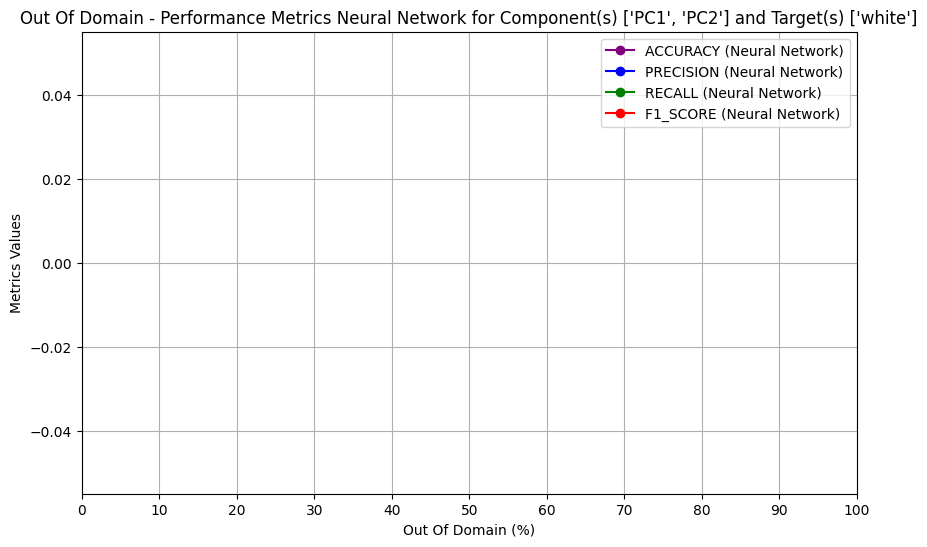

⚠️ Nessun risultato trovato per: features=PC1, wine_types=red


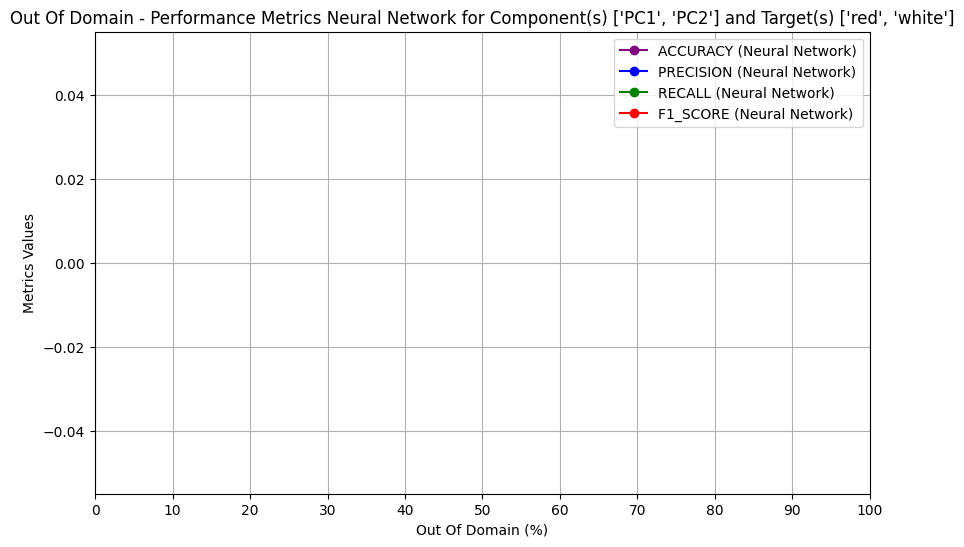

⚠️ Nessun risultato trovato per: features=PC3, wine_types=red


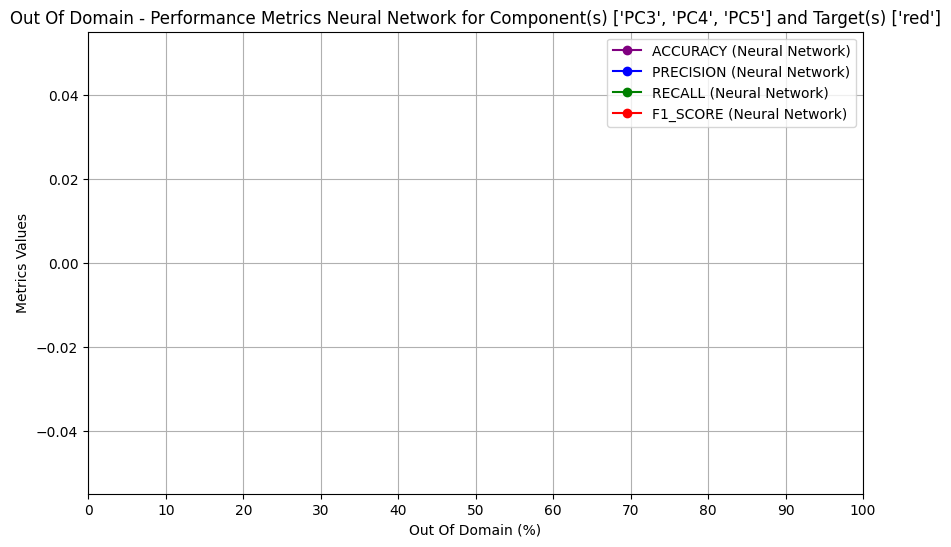

⚠️ Nessun risultato trovato per: features=PC3, wine_types=white


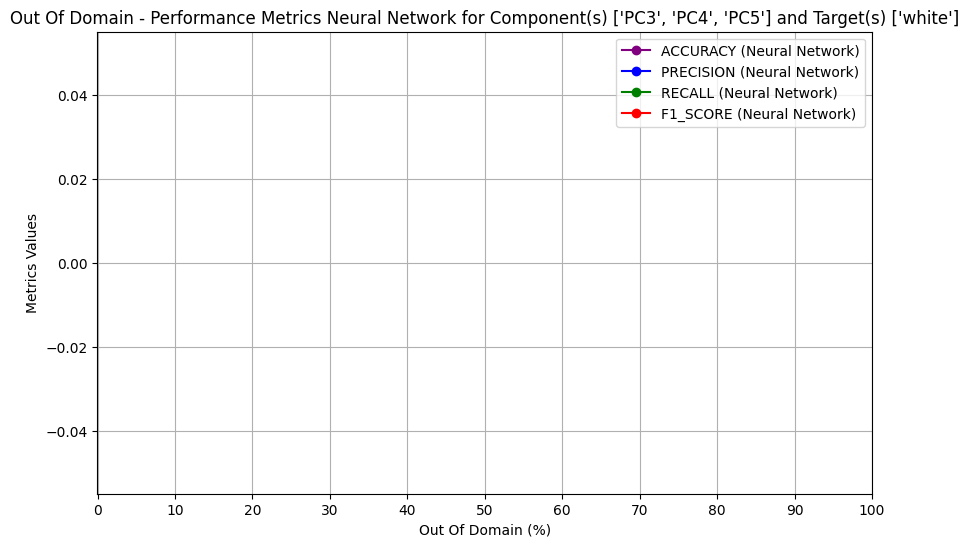

⚠️ Nessun risultato trovato per: features=PC3, wine_types=red


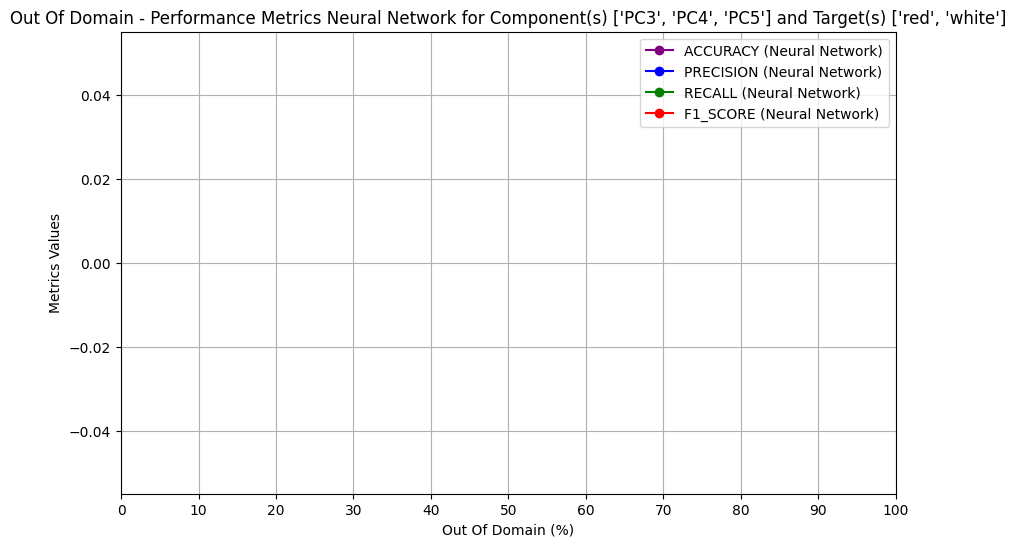

In [107]:
for feature in features_to_consider_list:
    for wine_types in wine_types_to_consider_list:
        plot_oodv_graph("Neural Network", feature, wine_types)

#### Decision Tree

⚠️ Nessun risultato trovato per: features=PC1, wine_types=red


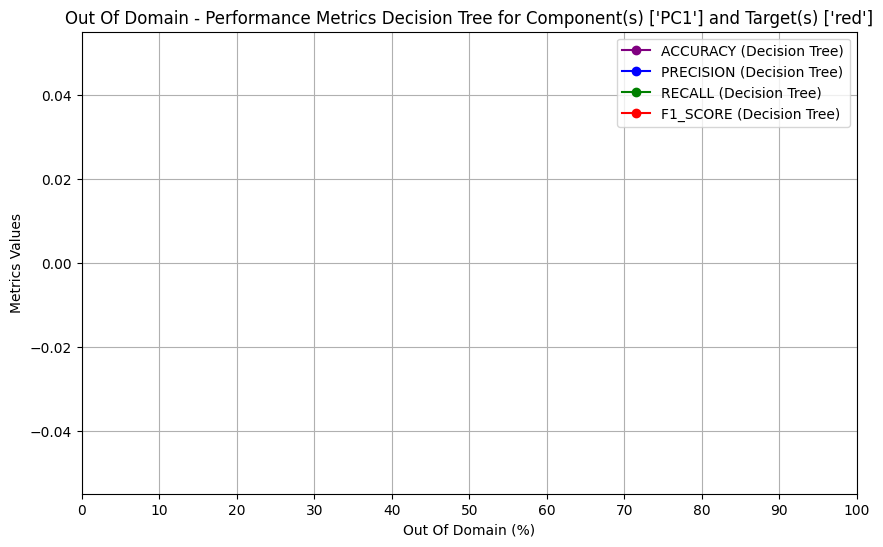

⚠️ Nessun risultato trovato per: features=PC1, wine_types=white


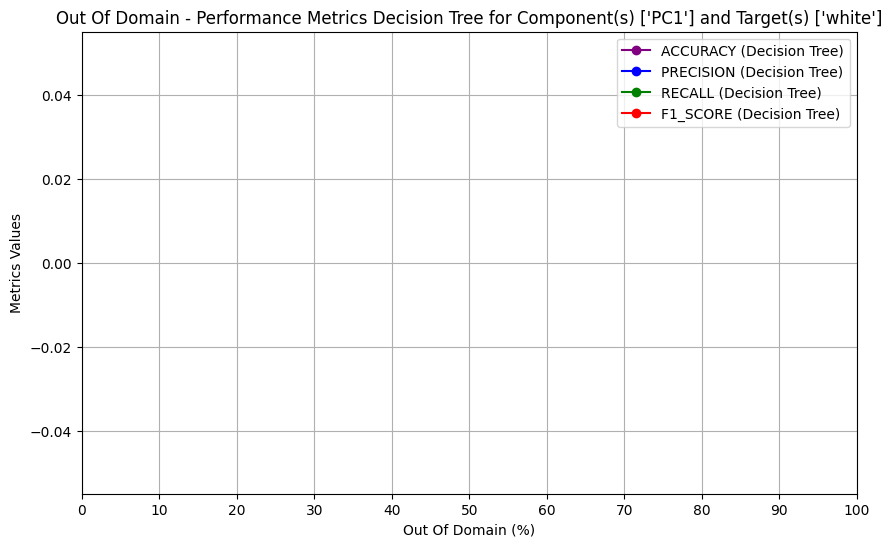

⚠️ Nessun risultato trovato per: features=PC1, wine_types=red


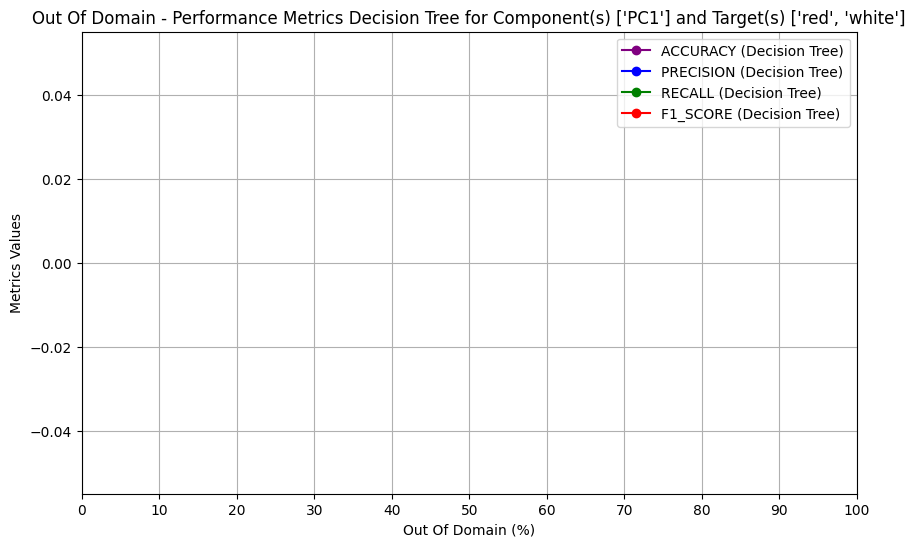

⚠️ Nessun risultato trovato per: features=PC2, wine_types=red


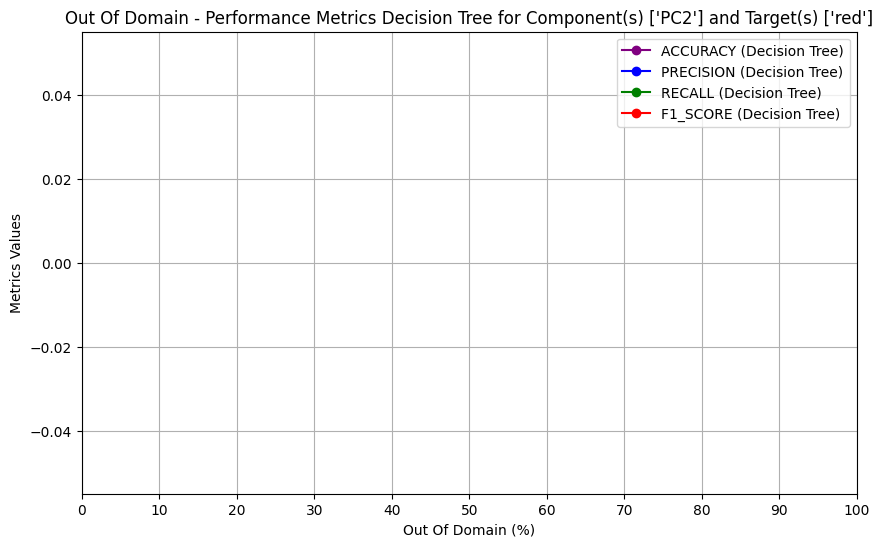

⚠️ Nessun risultato trovato per: features=PC2, wine_types=white


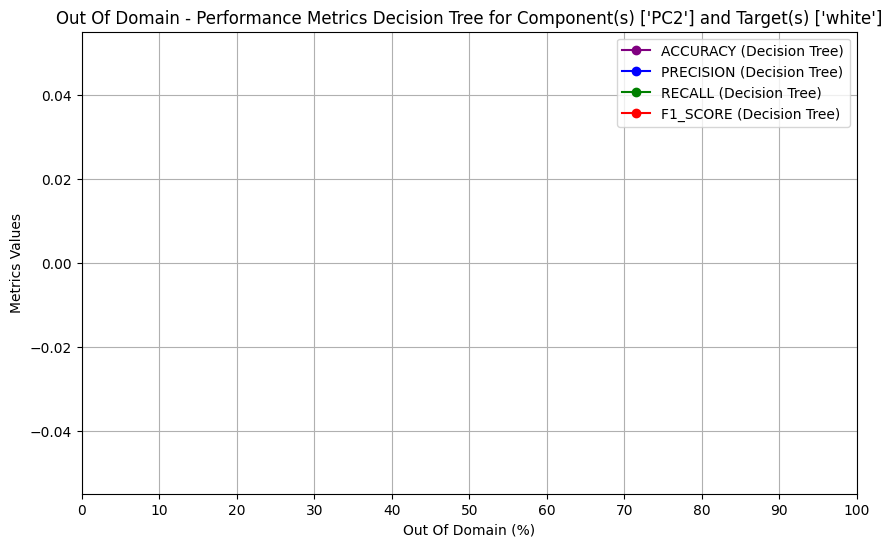

⚠️ Nessun risultato trovato per: features=PC2, wine_types=red


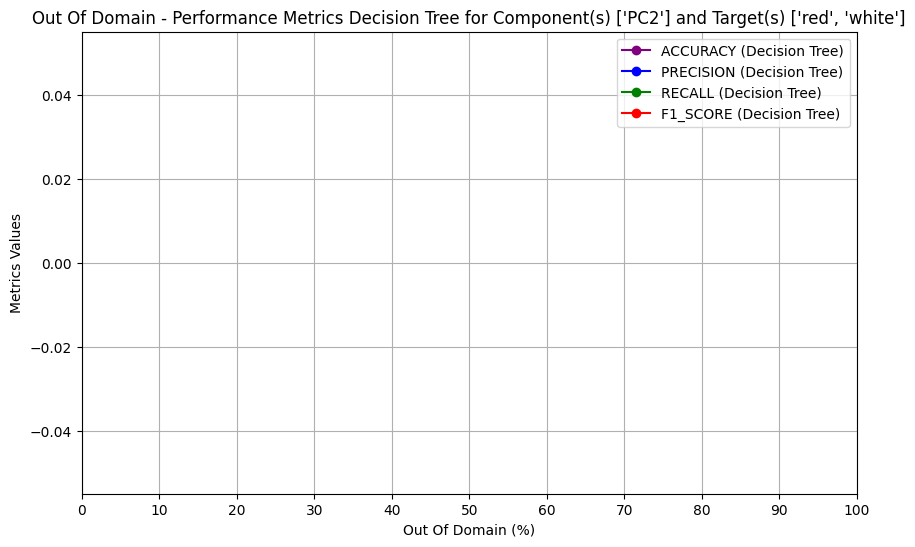

⚠️ Nessun risultato trovato per: features=PC1, wine_types=red


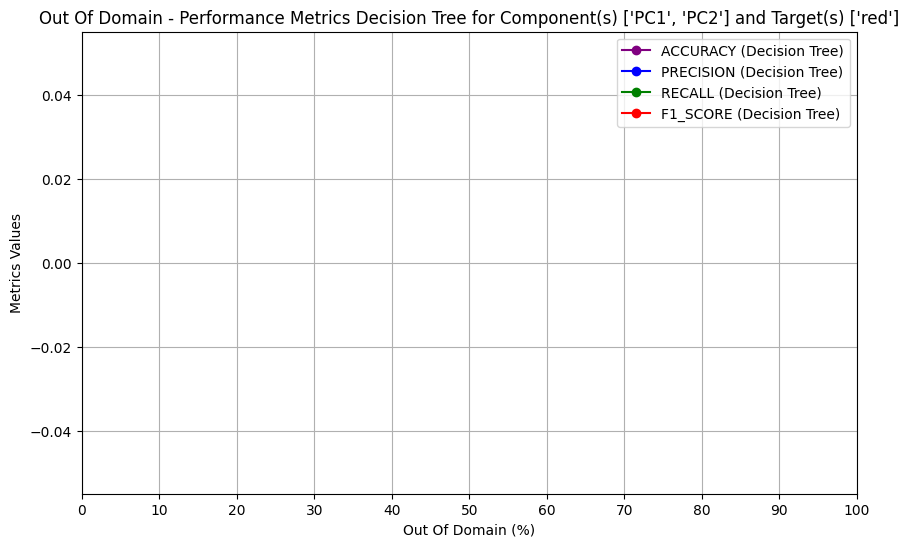

⚠️ Nessun risultato trovato per: features=PC1, wine_types=white


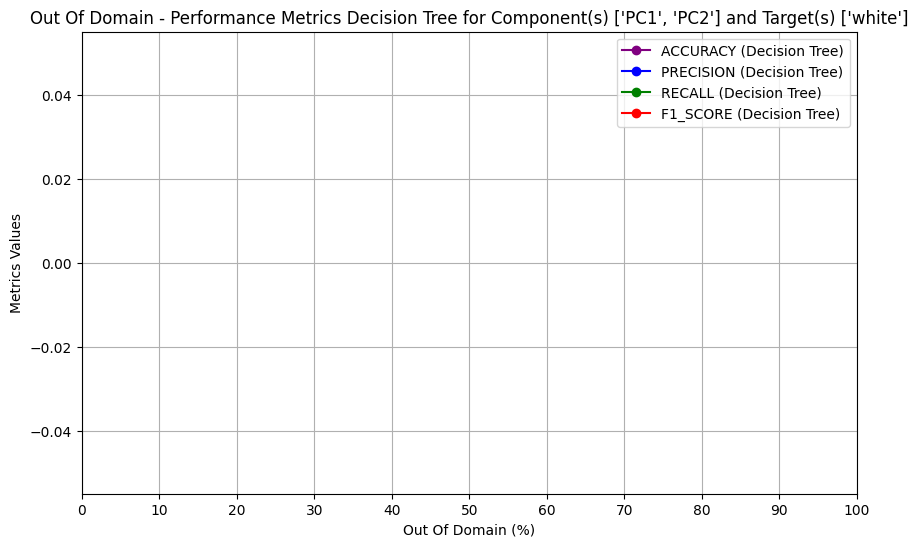

⚠️ Nessun risultato trovato per: features=PC1, wine_types=red


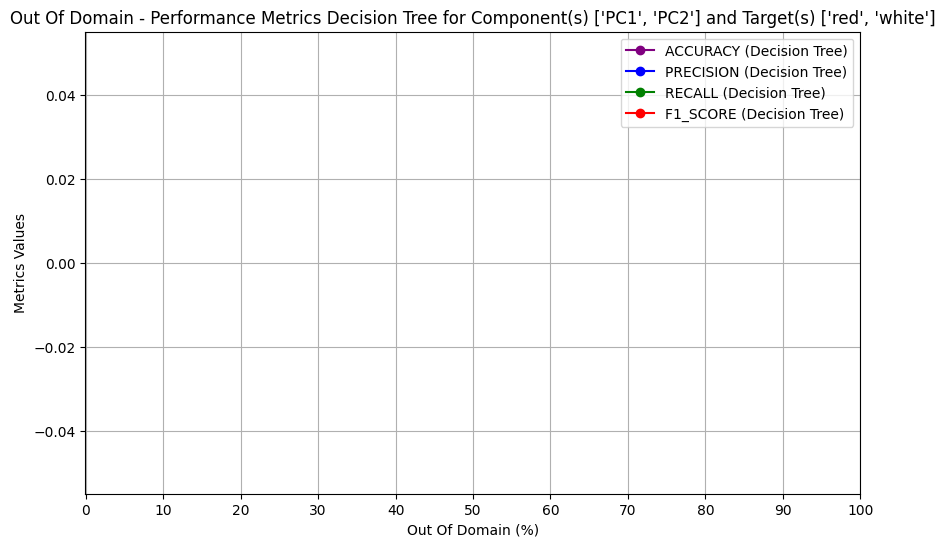

⚠️ Nessun risultato trovato per: features=PC3, wine_types=red


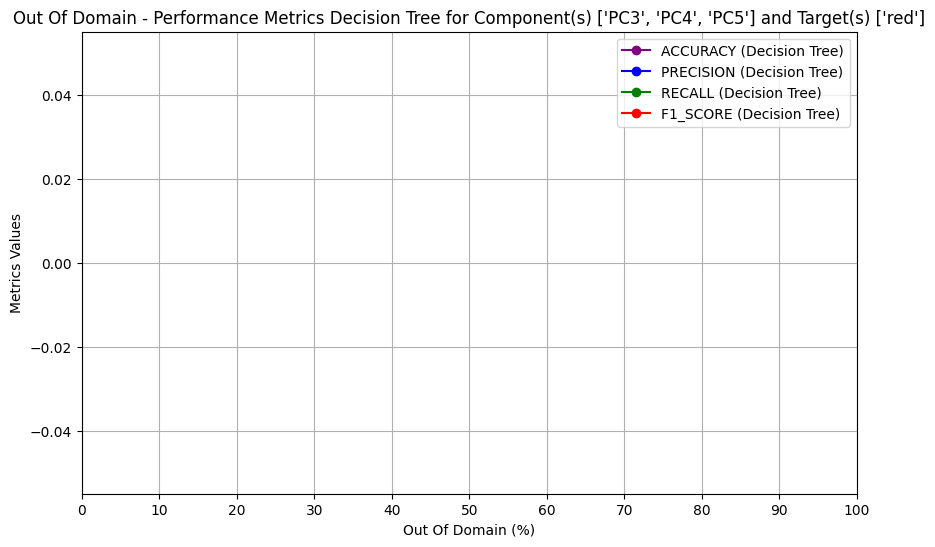

⚠️ Nessun risultato trovato per: features=PC3, wine_types=white


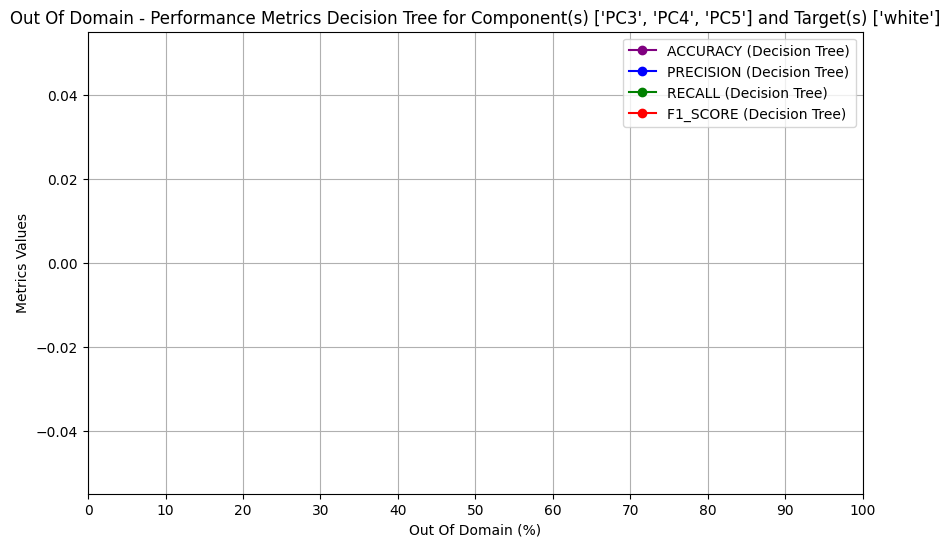

⚠️ Nessun risultato trovato per: features=PC3, wine_types=red


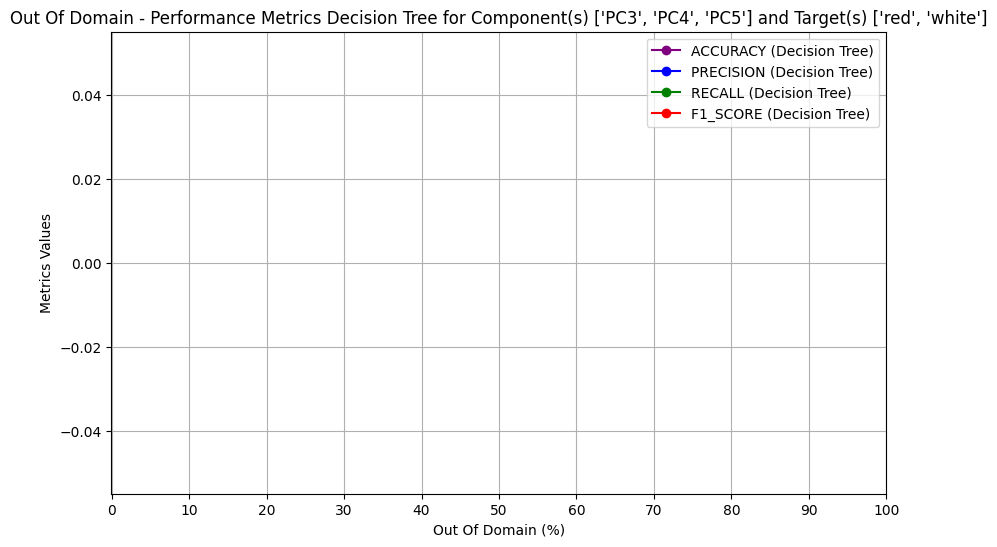

In [108]:
for feature in features_to_consider_list:
    for wine_types in wine_types_to_consider_list:
        plot_oodv_graph("Decision Tree", feature, wine_types)

### Flip Labels

In [109]:
# Range for Flip Labels Experiments
start_index = 474
end_index = 573   
flip_labels = get_experiment_parameters('../experiments_pipeline/experiments_config.json', start_index, end_index)
# Print the data to verify if it's correct
print(json.dumps(flip_labels, indent=4))

Index 474 is out of range
Index 475 is out of range
Index 476 is out of range
Index 477 is out of range
Index 478 is out of range
Index 479 is out of range
Index 480 is out of range
Index 481 is out of range
Index 482 is out of range
Index 483 is out of range
Index 484 is out of range
Index 485 is out of range
Index 486 is out of range
Index 487 is out of range
Index 488 is out of range
Index 489 is out of range
Index 490 is out of range
Index 491 is out of range
Index 492 is out of range
Index 493 is out of range
Index 494 is out of range
Index 495 is out of range
Index 496 is out of range
Index 497 is out of range
Index 498 is out of range
Index 499 is out of range
Index 500 is out of range
Index 501 is out of range
Index 502 is out of range
Index 503 is out of range
Index 504 is out of range
Index 505 is out of range
Index 506 is out of range
Index 507 is out of range
Index 508 is out of range
Index 509 is out of range
Index 510 is out of range
Index 511 is out of range
Index 512 is

In [110]:
def get_results_flip_labels():
    # Get the filtered data, needed for the plots
    results = []
    for experiment in flip_labels: 
        results.append((int(experiment["experiment-name"][12:]), experiment["flip-percentage-red"], experiment["flip-percentage-white"]))
    # Insert in the first position the "fake" experiment, used for the ML pipeline metrics
    results.insert(0, (0, 0.0, 0.0))

    return results

In [111]:
def plot_flip_labels_graph(model_name_to_consider):
    # Get the results object
    results = get_results_flip_labels()

    # Make the graph
    plt.figure(figsize=(100, 60))

    for metric, color in metrics.items():
        # Initialize lists to collect x and y values
        x_values = []
        y_values = []
        x_labels = []

        for experiment_id, percentage_red, percentage_white in results:
            # Select the correct experiment in the df of metrics
            data = df[(df['experiment_id'] == experiment_id) & (df['model_name'] == model_name_to_consider)]

            if data.empty:
                # Experiment 0
                assert experiment_id == 0, "Something went wrong, expected experiment 0"
            
                # Get the data properly
                data = df[(df['experiment_id'] == experiment_id) & (df['model_name'] == model_name_to_consider)]
                if data.empty:
                    assert False, "This was unexpected"

            # Get the metrics
            metric_value = data[metric].values[0]
            # Collect the data points, first type red, then white
            x_labels.append(f"{percentage_red * 100}% / {percentage_white * 100}%")
            y_values.append(metric_value)

        # Plot all collected points and lines for the current metric
        plt.plot(range(len(x_labels)), y_values, marker='o', linestyle='-', color=color, label=f"{metric.upper()} ({model_name_to_consider})")
    
    plt.xlabel('Flipped Labels (%) Red / White')
    plt.ylabel('Metrics Values')
    plt.title(f'Flip Labels - Performance Metrics {model_name_to_consider}')
    plt.legend(loc='best')
    plt.grid(True)
    plt.xticks(range(len(x_labels)), x_labels, rotation=45, ha='right')
    plt.show()

#### SVM

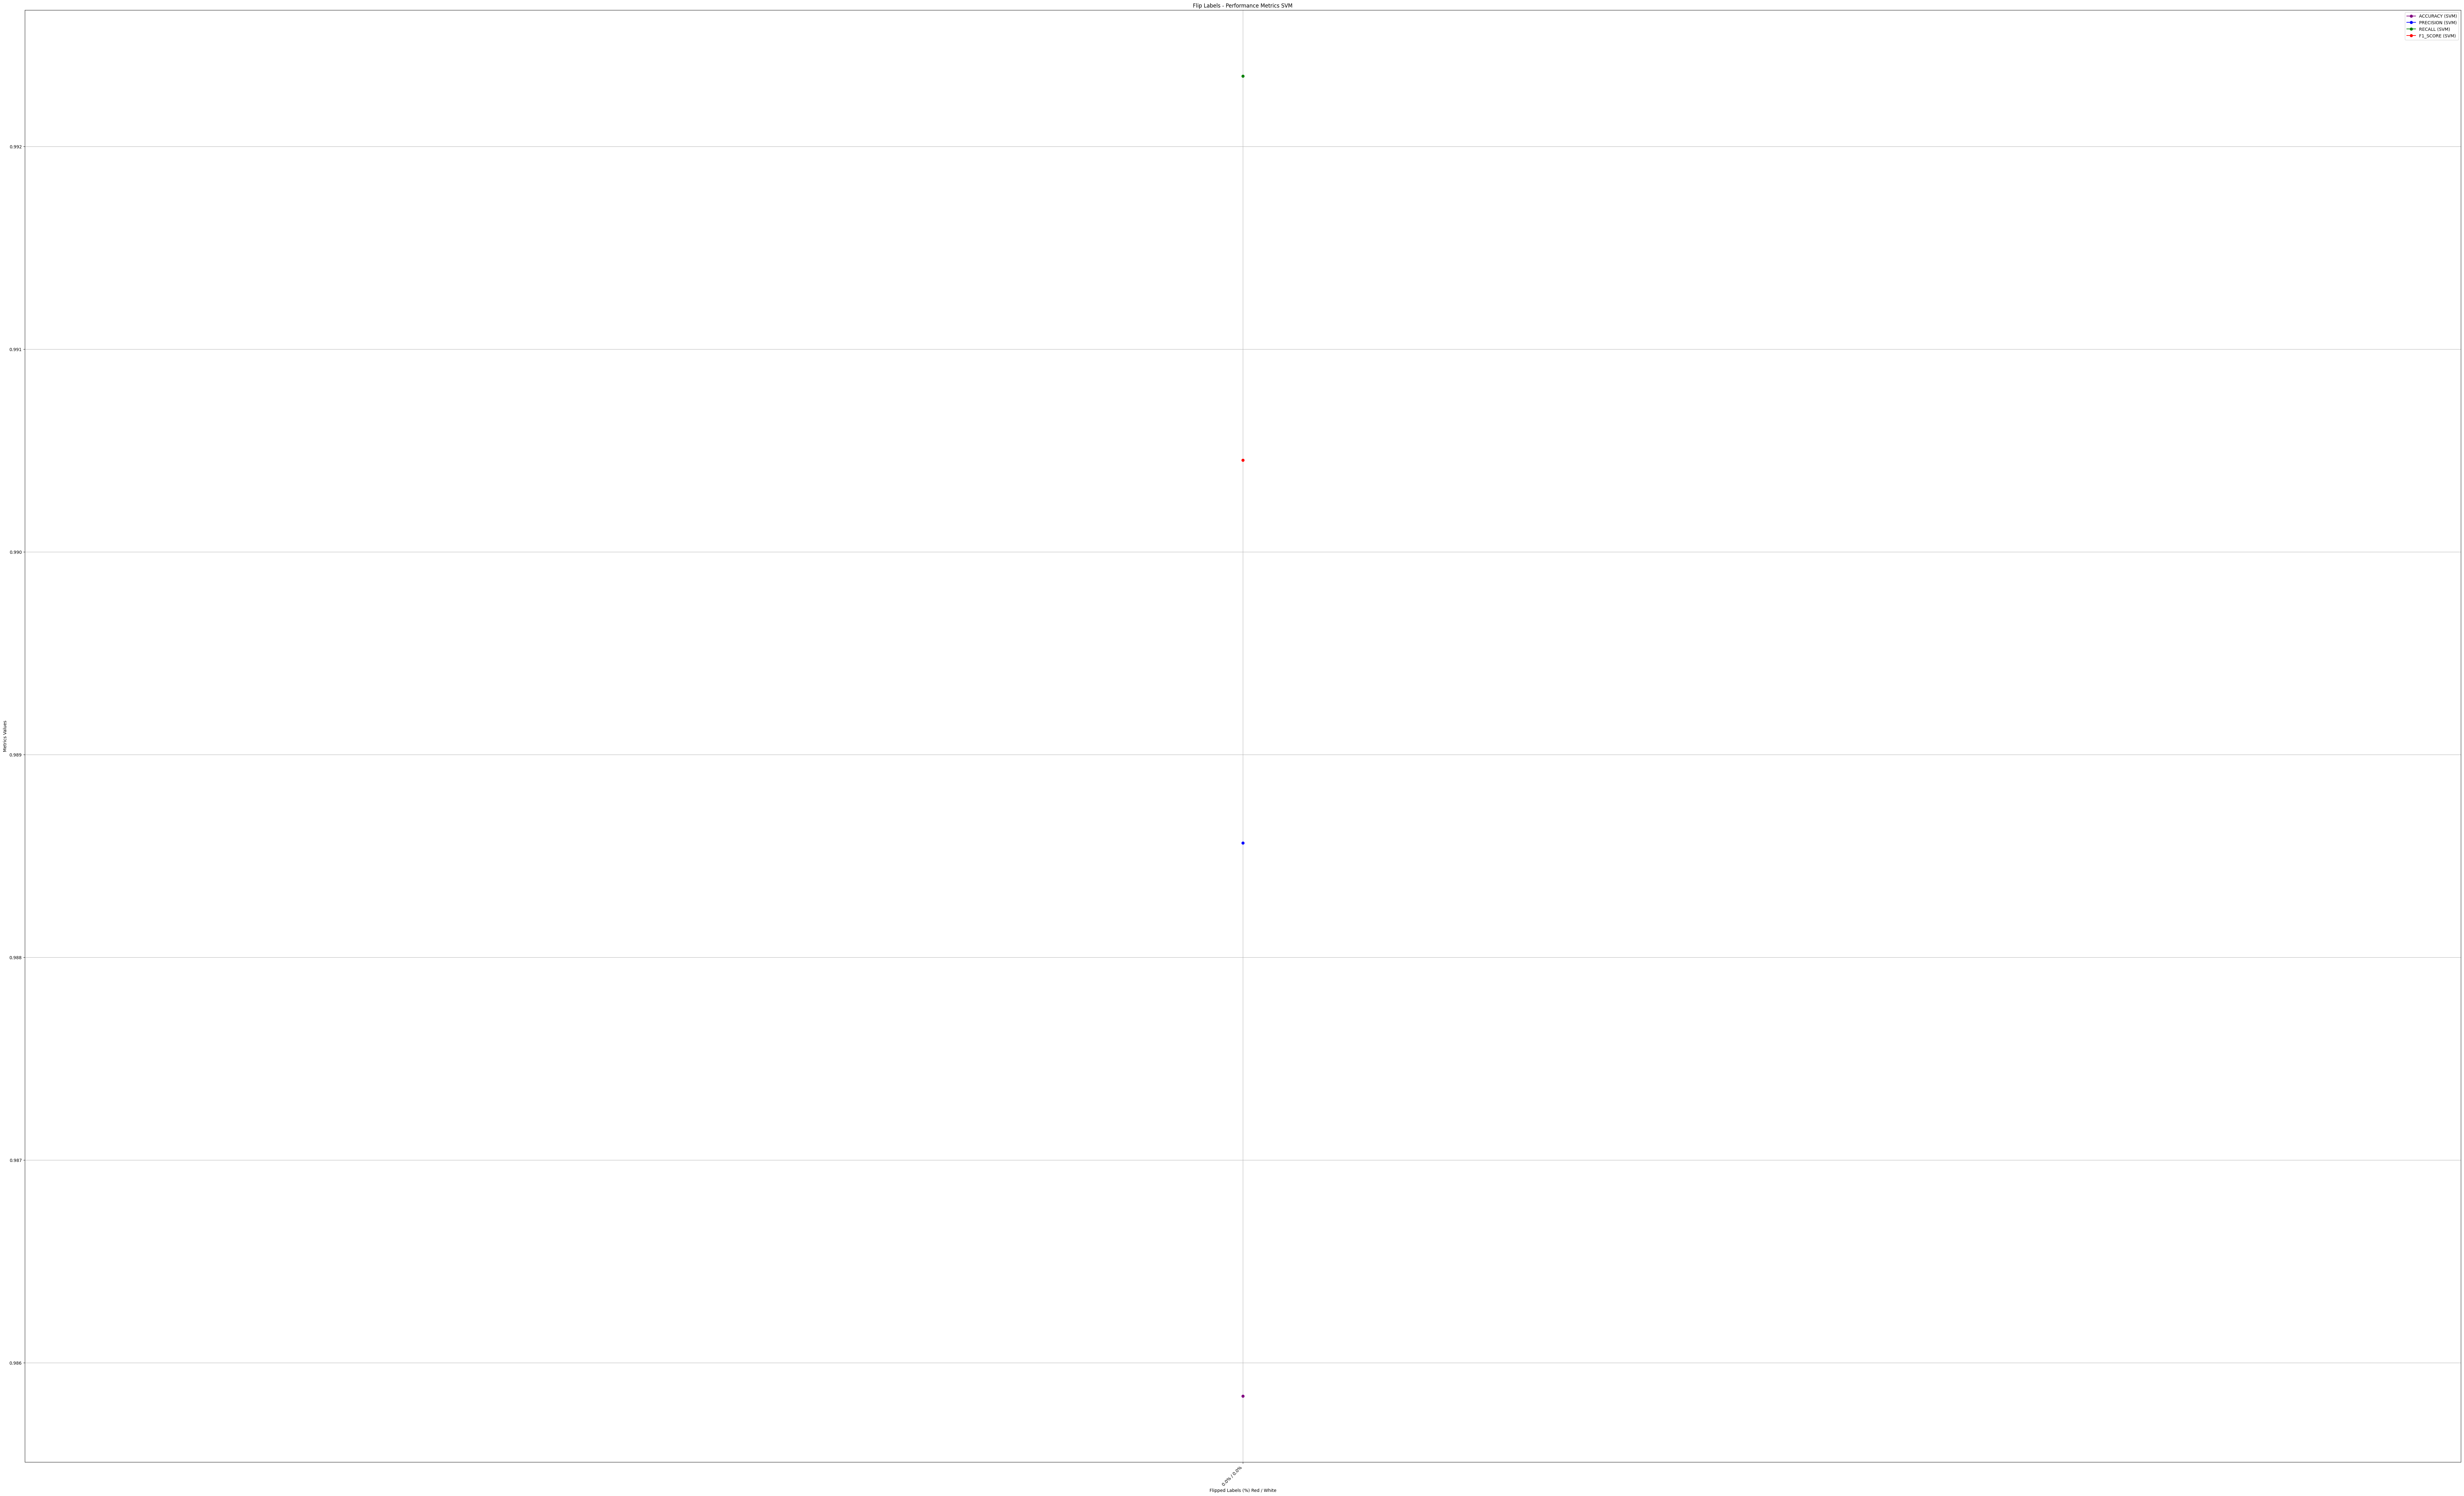

In [112]:
plot_flip_labels_graph("SVM") 

#### Decision Tree

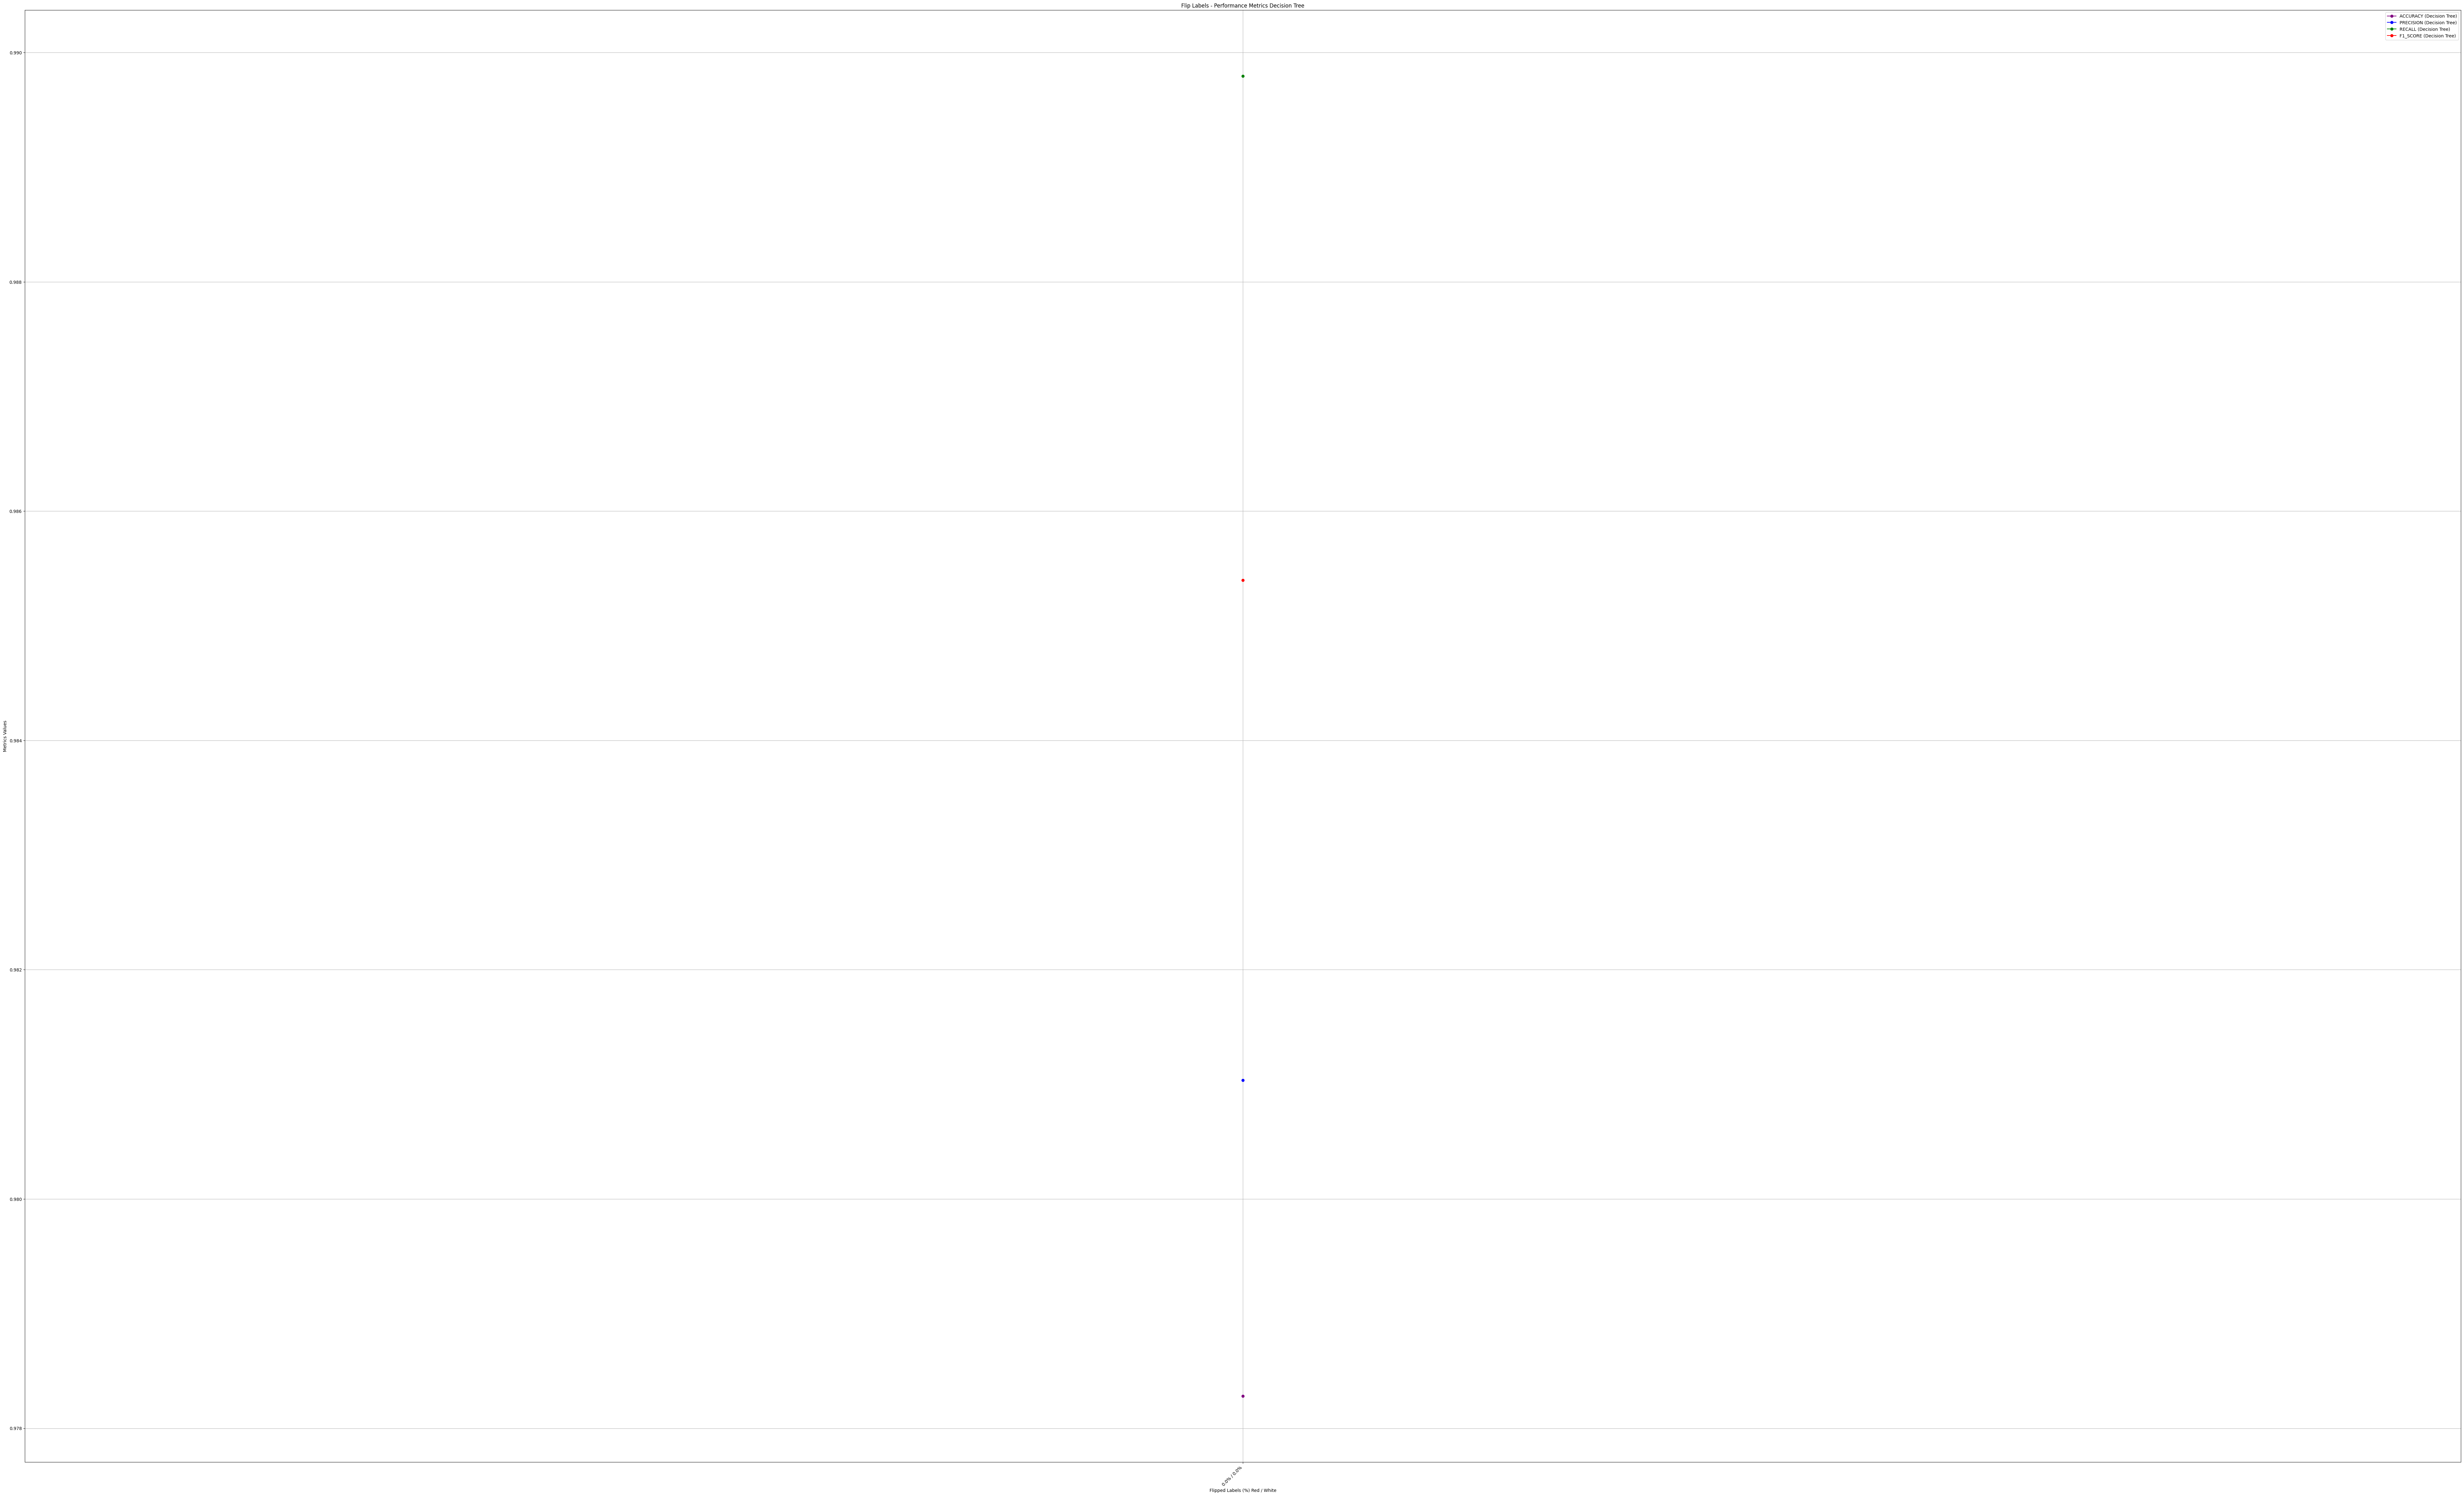

In [113]:
plot_flip_labels_graph("Decision Tree") 

### Duplicate Rows Same & Opposite Label

In [114]:
# Range for Duplicate Rows Same Label Experiments
start_index = 574
end_index = 603
duplicate_rows_same_label = get_experiment_parameters('../experiments_pipeline/experiments_config.json', start_index, end_index)
# Print the data to verify if it's correct
print(json.dumps(duplicate_rows_same_label, indent=4))

# Range for Duplicate Rows Opposite Label Experiments
start_index = 604
end_index = 633
duplicate_rows_opposite_label = get_experiment_parameters('../experiments_pipeline/experiments_config.json', start_index, end_index)
# Print the data to verify if it's correct
print(json.dumps(duplicate_rows_opposite_label, indent=4))

Index 574 is out of range
Index 575 is out of range
Index 576 is out of range
Index 577 is out of range
Index 578 is out of range
Index 579 is out of range
Index 580 is out of range
Index 581 is out of range
Index 582 is out of range
Index 583 is out of range
Index 584 is out of range
Index 585 is out of range
Index 586 is out of range
Index 587 is out of range
Index 588 is out of range
Index 589 is out of range
Index 590 is out of range
Index 591 is out of range
Index 592 is out of range
Index 593 is out of range
Index 594 is out of range
Index 595 is out of range
Index 596 is out of range
Index 597 is out of range
Index 598 is out of range
Index 599 is out of range
Index 600 is out of range
Index 601 is out of range
Index 602 is out of range
Index 603 is out of range
[]
Index 604 is out of range
Index 605 is out of range
Index 606 is out of range
Index 607 is out of range
Index 608 is out of range
Index 609 is out of range
Index 610 is out of range
Index 611 is out of range
Index 612

In [115]:
def get_results_duplicate_rows(wine_types_to_consider, flip='same'):
    # Get the filtered data, needed for the plots
    results = [(int(experiment["experiment-name"][12:]), experiment[f"duplicate-rows-{flip}-label-percentage"], experiment[f'wine-types-to-consider-{flip}-label']) 
    for experiment in (duplicate_rows_same_label if flip=='same' else duplicate_rows_opposite_label) 
    if experiment[f'wine-types-to-consider-{flip}-label'] == wine_types_to_consider]

    # Insert in the first position the "fake" experiment, used for the ML pipeline metrics
    results.insert(0, (0, 0.0, []))

    return results

In [116]:
# Function to plot
def plot_duplicate_rows_graph(model_name_to_consider, wine_types_to_consider, flip='same'):
    # Get the results object
    results = get_results_duplicate_rows(wine_types_to_consider, flip)

    # Make the graph
    plt.figure(figsize=(10, 6))

    for metric, color in metrics.items():
        # Initialize lists to collect x and y values
        x_values = []
        y_values = []

        for experiment_id, missing_values_percentage, _ in results:
            # Select the correct experiment in the df of metrics
            data = df[(df['experiment_id'] == experiment_id) & (df['model_name'] == model_name_to_consider)]

            if data.empty:
                # Experiment 0 
                assert experiment_id == 0, "Something went wrong, expected experiment 0"
                # Get the data properly
                data = df[(df['experiment_id'] == experiment_id) & (df['model_name'] == model_name_to_consider)]

                if data.empty:
                    assert False, "This was unexpected"

            # Get the metrics
            metric_value = data[metric].values[0]
            # Collect the data points
            x_values.append(missing_values_percentage * 100)
            y_values.append(metric_value)
        
        # Plot all collected points and lines for the current metric
        plt.plot(x_values, y_values, marker='o', linestyle='-', color=color, label=f"{metric.upper()} ({model_name_to_consider})")
        
    plt.xlabel(f'Duplicated Rows With {flip.capitalize()} Label (%)')
    plt.ylabel('Metrics Values')
    plt.title(f'Duplicate Rows {flip.capitalize()} Label - Performance Metrics {model_name_to_consider} for Target(s) {wine_types_to_consider}')
    plt.legend(loc='best')
    plt.grid(True)
    plt.xticks([10 * i for i in range(1, 11)])
    plt.show()

#### SVM

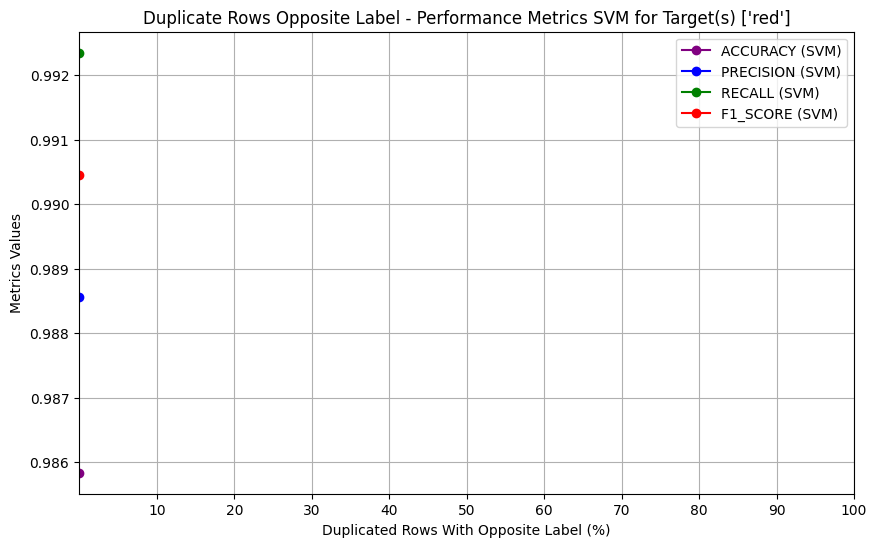

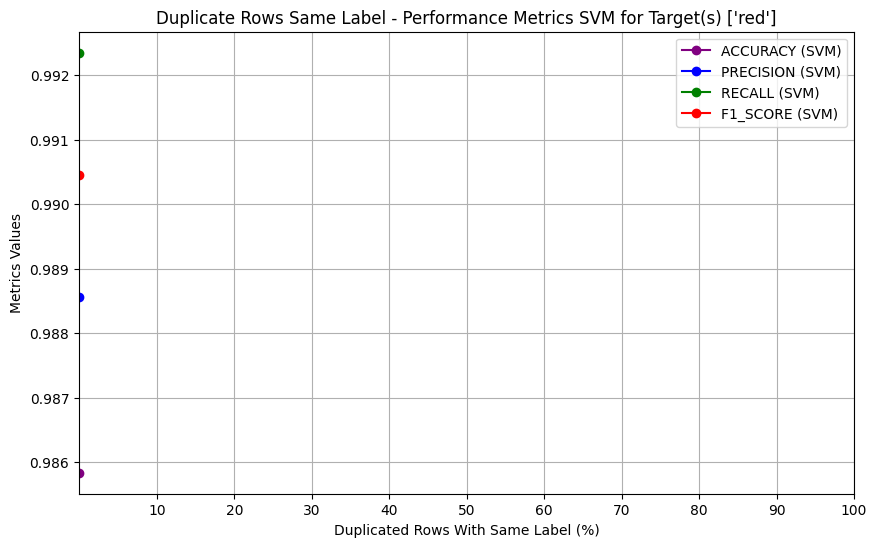

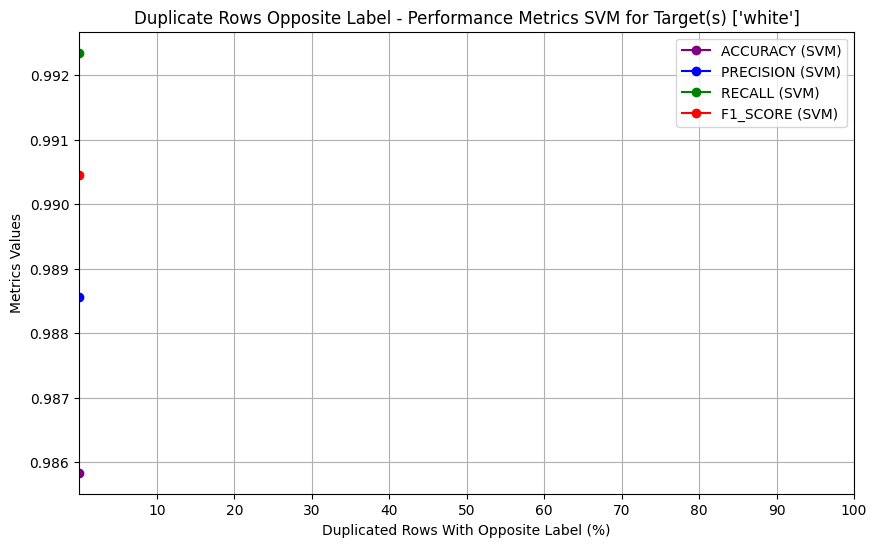

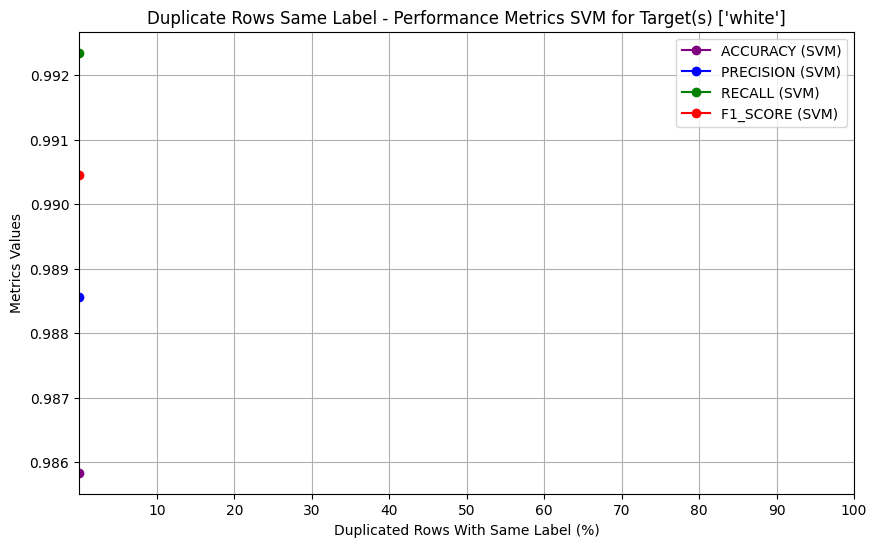

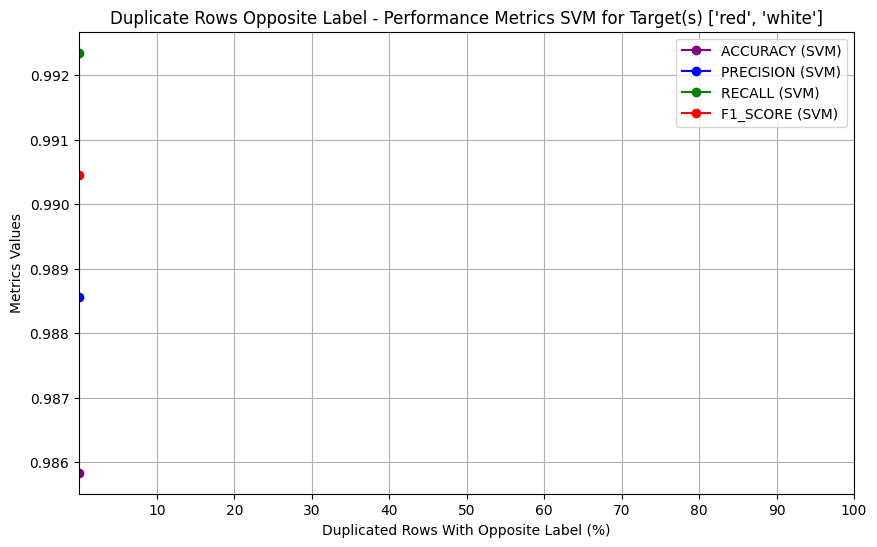

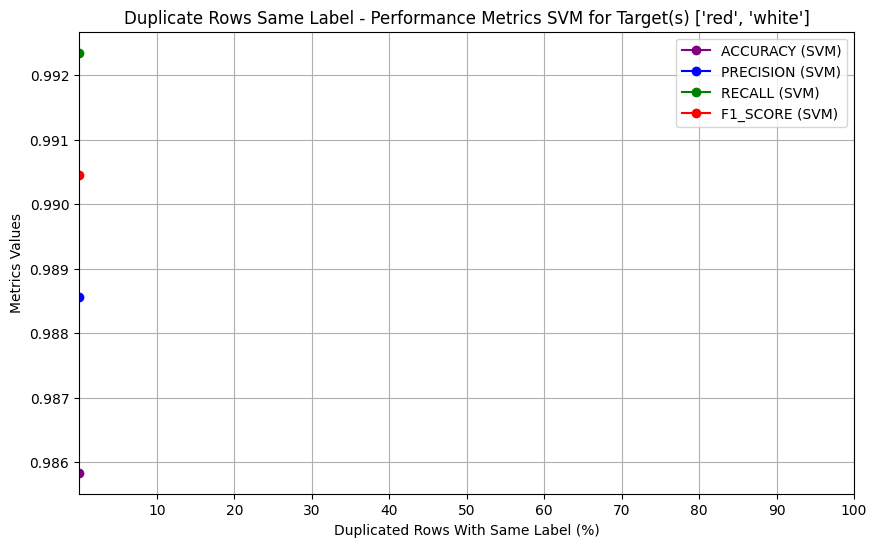

In [117]:
# Plot everything about SVM       
flips = ['opposite', 'same']
for wine_type in wine_types_to_consider_list:
    for flip in flips:
        plot_duplicate_rows_graph('SVM', wine_type, flip)

#### Decision Tree

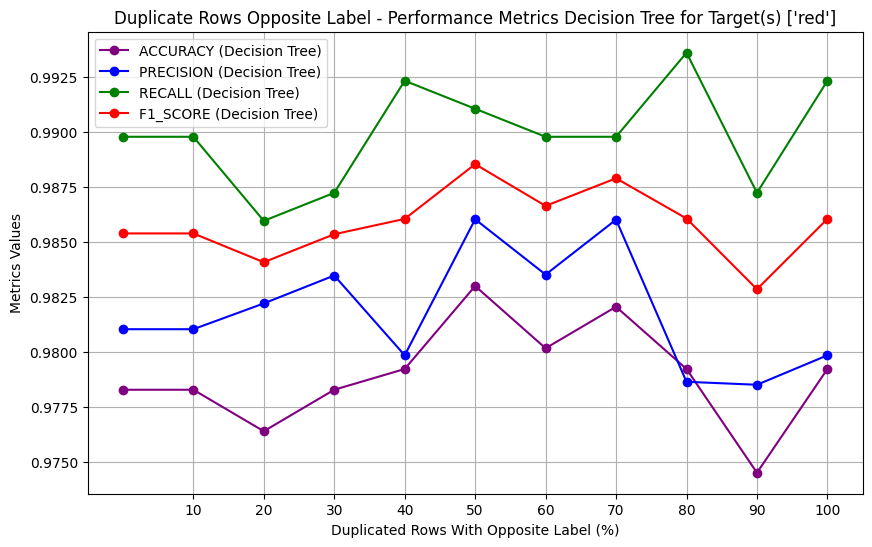

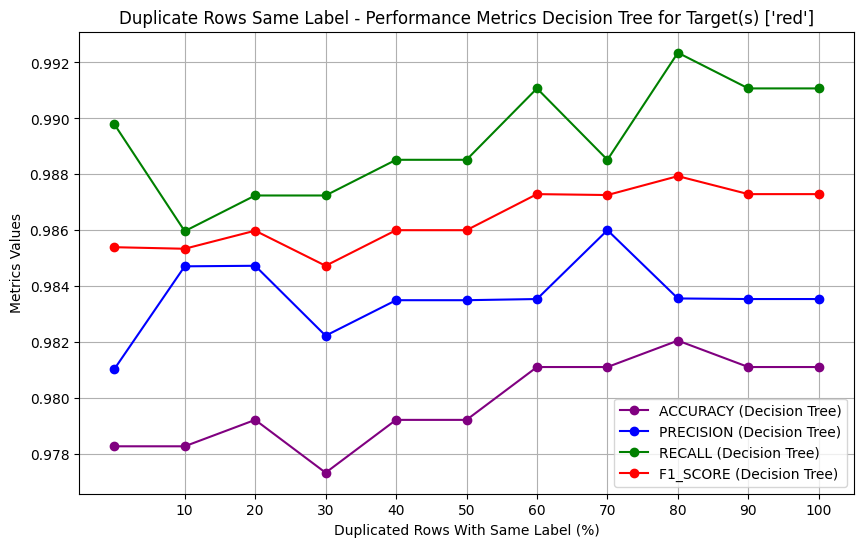

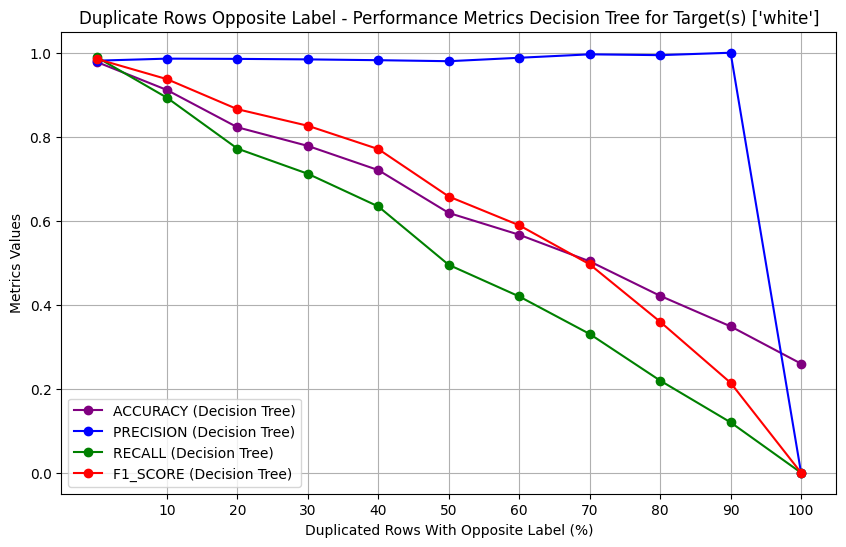

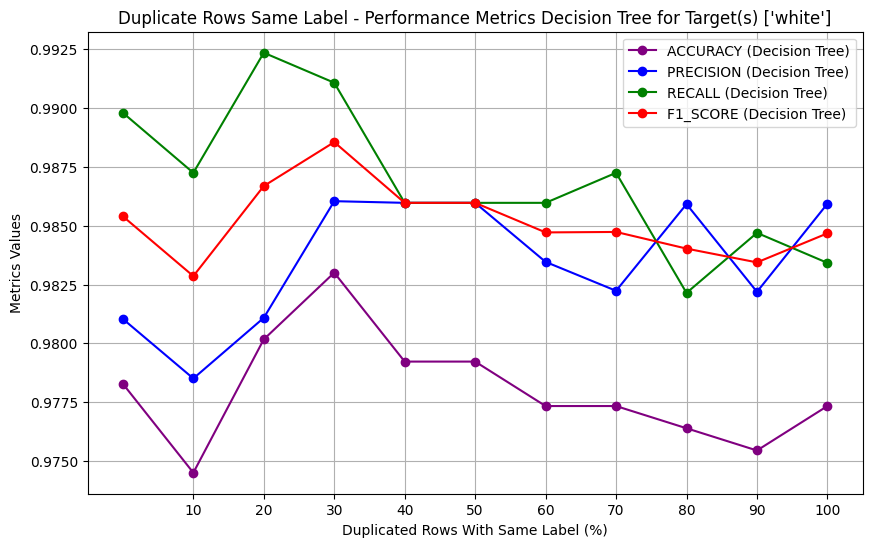

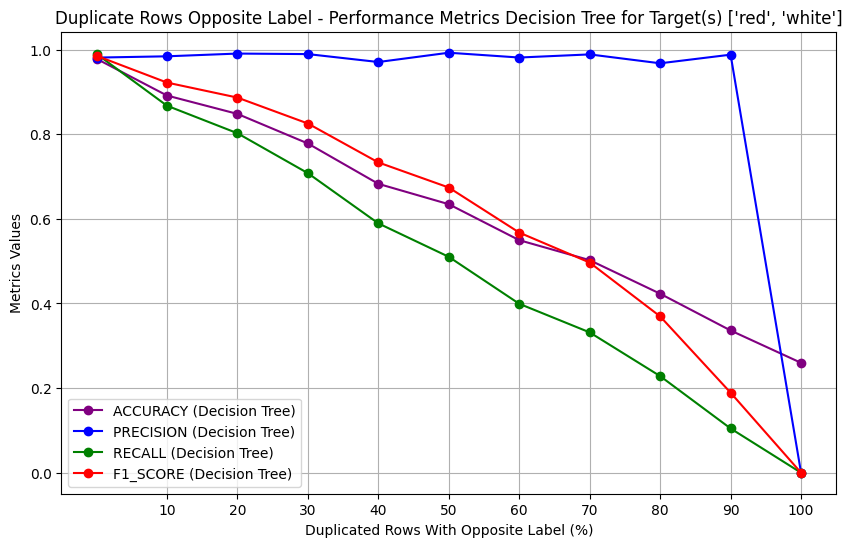

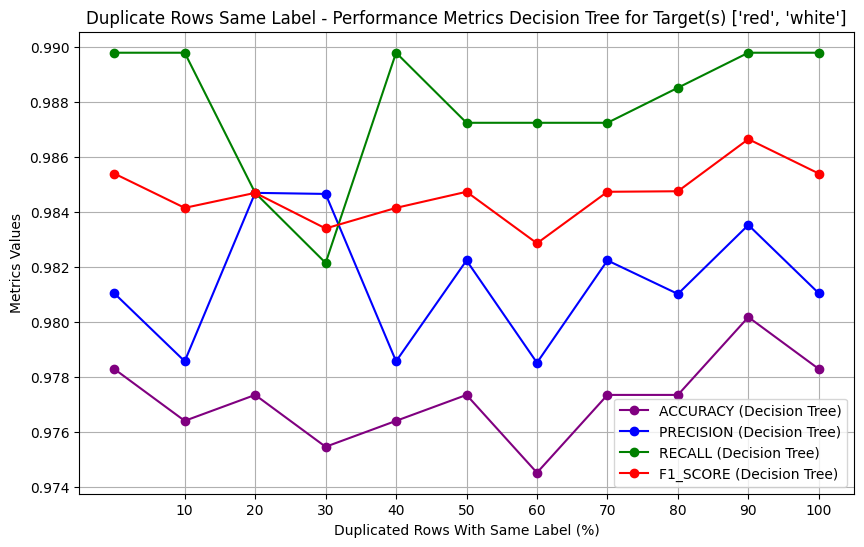

In [376]:
# Plot everything about DTC         
for wine_type in wine_types_to_consider_list:
    for flip in flips:
        plot_duplicate_rows_graph('Decision Tree', wine_type, flip)

### Add Rows Random

In [119]:
# Range for Add Rows Random Experiments
start_index = 634
end_index = 643 
add_rows_random = get_experiment_parameters('../experiments_pipeline/experiments_config.json', start_index, end_index)
# Print the data to verify if it's correct
print(json.dumps(add_rows_random, indent=4))

Index 634 is out of range
Index 635 is out of range
Index 636 is out of range
Index 637 is out of range
Index 638 is out of range
Index 639 is out of range
Index 640 is out of range
Index 641 is out of range
Index 642 is out of range
Index 643 is out of range
[]


In [120]:
def get_results_rows_random():
    # Get the filtered data, needed for the plots
    results = [(int(experiment["experiment-name"][12:]), experiment["add-rows-random-percentage"]) 
    for experiment in add_rows_random]

    # Insert in the first position the "fake" experiment, used for the ML pipeline metrics
    results.insert(0, (0, 0.0))

    return results

In [121]:
# Function to plot
def plot_rows_random_graph(model_name_to_consider):
    # Get the results object
    results = get_results_rows_random()

    # Make the graph
    plt.figure(figsize=(10, 6))

    for metric, color in metrics.items():
        # Initialize lists to collect x and y values
        x_values = []
        y_values = []

        for experiment_id, percentage, in results:
            # Select the correct experiment in the df of metrics
            data = df[(df['experiment_id'] == experiment_id) & (df['model_name'] == model_name_to_consider)]

            if data.empty:
                # Experiment 0
                assert experiment_id == 0, "Something went wrong, expected experiment 0"

                # Get the data properly
                data = df[(df['experiment_id'] == experiment_id) & (df['model_name'] == model_name_to_consider)]

                if data.empty:
                    assert False, "This was unexpected"

            # Get the metrics
            metric_value = data[metric].values[0]
            # Collect the data points
            x_values.append(percentage * 100)
            y_values.append(metric_value)
        
        # Plot all collected points and lines for the current metric
        plt.plot(x_values, y_values, marker='o', linestyle='-', color=color, label=f"{metric.upper()} ({model_name_to_consider})")
        
    plt.xlabel('Added Rows Random (%)')
    plt.ylabel('Metrics Values')
    plt.title(f'Add Rows Random - Performance Metrics {model_name_to_consider}')
    plt.legend(loc='best')
    plt.grid(True)
    plt.xticks([10 * i for i in range(0, 11)])
    plt.show()

#### SVM

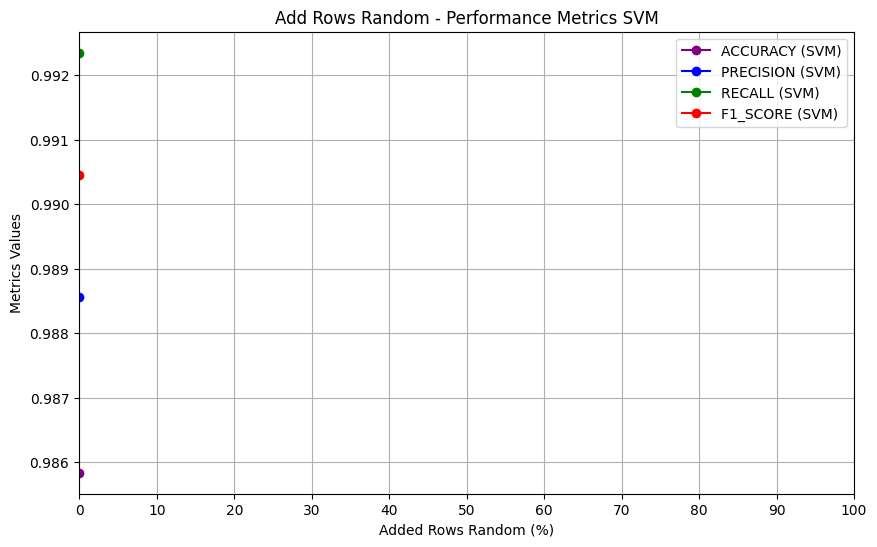

In [122]:
plot_rows_random_graph("SVM")

#### Decision Tree

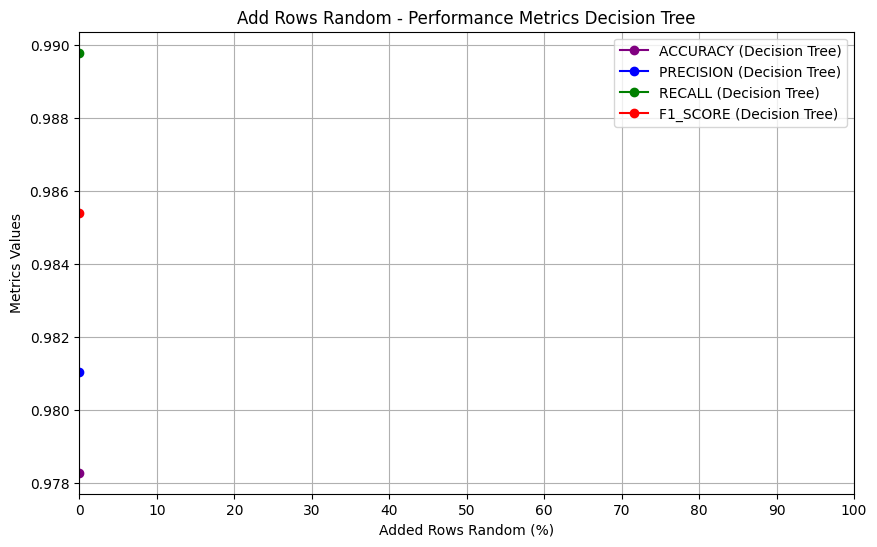

In [123]:
plot_rows_random_graph("Decision Tree")

### Add Rows Domain

In [124]:
# Range for Add Rows Domain Experiments
start_index = 644
end_index = 653   
add_rows_domain = get_experiment_parameters('../experiments_pipeline/experiments_config.json', start_index, end_index)
# Print the data to verify if it's correct
print(json.dumps(add_rows_domain, indent=4))

Index 644 is out of range
Index 645 is out of range
Index 646 is out of range
Index 647 is out of range
Index 648 is out of range
Index 649 is out of range
Index 650 is out of range
Index 651 is out of range
Index 652 is out of range
Index 653 is out of range
[]


In [125]:
def get_results_add_rows_domain():
     # Get the filtered data, needed for the plots
    results = []
    for experiment in add_rows_domain: 
        results.append((int(experiment["experiment-name"][12:]), experiment["add-rows-domain-percentage"]))
    # Insert in the first position the "fake" experiment, used for the ML pipeline metrics
    results.insert(0, (0, 0.0))

    return results

In [126]:
# Function to plot
def plot_add_rows_domain_graph(model_name_to_consider):
    # Get the results object
    results = get_results_add_rows_domain()

    # Make the graph
    plt.figure(figsize=(10, 6))

    for metric, color in metrics.items():
        # Initialize lists to collect x and y values
        x_values = []
        y_values = []

        for experiment_id, percentage in results:
            # Select the correct experiment in the df of metrics
            data = df[(df['experiment_id'] == experiment_id) & (df['model_name'] == model_name_to_consider)]

            if data.empty:
                # Experiment 0
                assert experiment_id == 0, "Something went wrong, expected experiment 0"
            
                # Get the data properly
                data = df[(df['experiment_id'] == experiment_id) & (df['model_name'] == model_name_to_consider)]
                if data.empty:
                    assert False, "This was unexpected"

            # Get the metrics
            metric_value = data[metric].values[0]
            # Collect the data points
            x_values.append(percentage * 100)
            y_values.append(metric_value)
        # Plot all collected points and lines for the current metric
        plt.plot(x_values, y_values, marker='o', linestyle='-', color=color, label=f"{metric.upper()} ({model_name_to_consider})")
    
    plt.xlabel('Added Rows Domain (%)')
    plt.ylabel('Metrics Values')
    plt.title(f'Add Rows Domain - Performance Metrics {model_name_to_consider}')
    plt.legend(loc='best')
    plt.grid(True)
    plt.xticks([10 * i for i in range(0, 11)])
    plt.show()

#### SVM

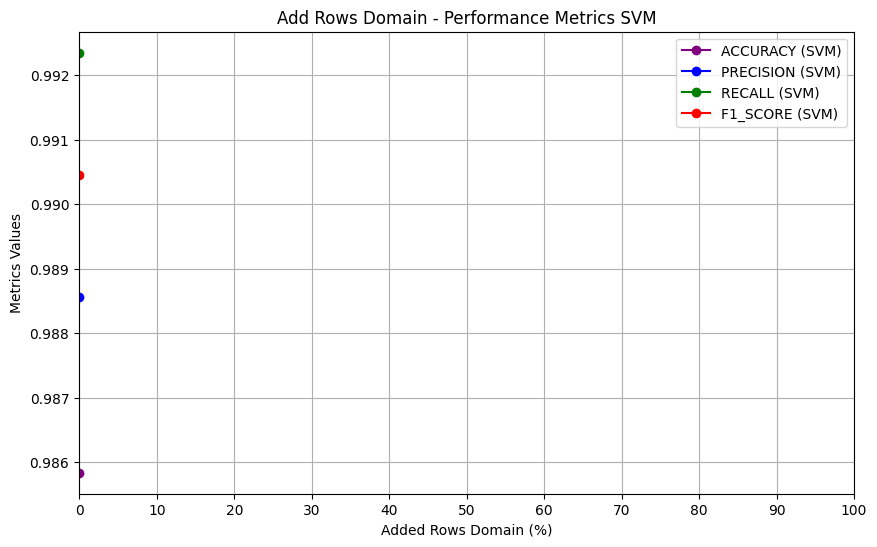

In [127]:
plot_add_rows_domain_graph("SVM")

#### Decision Tree

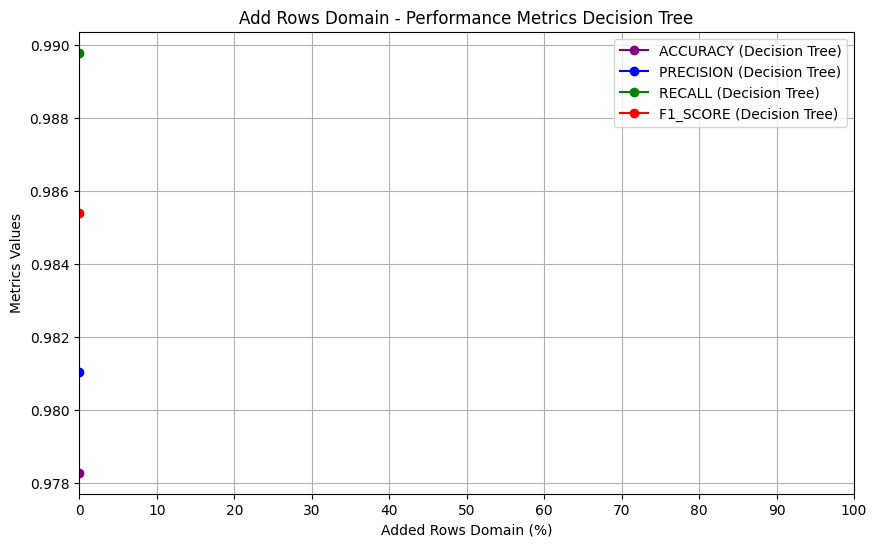

In [128]:
plot_add_rows_domain_graph("Decision Tree")

## Correlations

In [131]:
# Reason why we can't compare Decision Tree
df_original['model_name'].value_counts()

Decision Tree    659
SVM              547
SVM (mean)       112
SVM (EM)         112
Name: model_name, dtype: int64

### Correlations SVM (mean) vs SVM (EM)

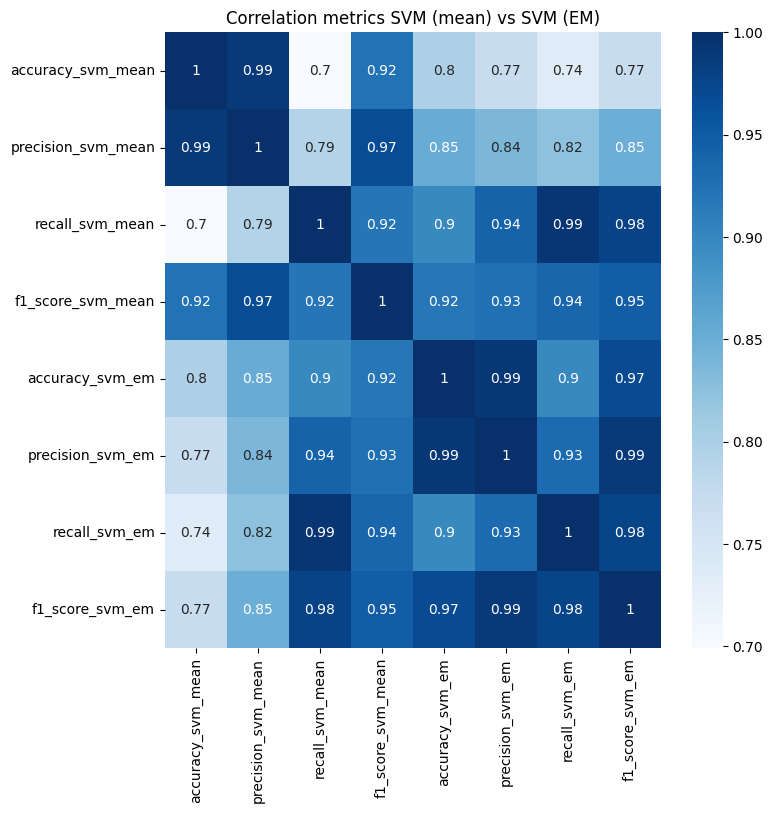

In [132]:
# Create dictionary containing the data
metrics_svm_svm = {}

for model in ['SVM (mean)', 'SVM (EM)']:
    model_name_short = 'svm_mean' if model == 'SVM (mean)' else 'svm_em'
    for metric in ['accuracy', 'precision', 'recall', 'f1_score']:
        metrics_svm_svm[f"{metric}_{model_name_short}"] = sub_df_dict[model][metric].reset_index(drop=True)

# Convert to DataFrame
metrics_svm_svm = pd.DataFrame(metrics_svm_svm)

# Plot the correlations
plt.figure(figsize=(8,8))
plt.title("Correlation metrics SVM (mean) vs SVM (EM)")
sns.heatmap(metrics_svm_svm.corr(), annot = True, cmap = 'Blues');